In [3]:
# imports 
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from dotenv import load_dotenv
from sklearn.metrics import confusion_matrix
from datetime import datetime, timedelta
from sklearn.datasets import make_blobs
from collections import defaultdict
from sklearn.utils import resample
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from numpy import average
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
import threading
import math
import os


Next Steps: (Hypertension thresholds)
https://www.hindawi.com/journals/jp/2012/105918/

In [4]:
# set working directory 
load_dotenv()
os.chdir(os.getenv('DEFAULT_PATH'))

print('In Predictive Model Folder:', os.getcwd())

In Predictive Model Folder: C:\Users\ashly\OneDrive\Documents\Education Material\ResearchProject\MaternalHealthResearch\predictive-model


## Create the Sleep Threshold visualization to depict the level of analysis

In [11]:
def sleepThreshold():
    # <= 6 alert > 7  <= 9 good, execessive (can be too much)
    df = pd.read_csv('data_interim/daily_sleep_activity.csv')
    grouped = df.groupby('id') # view all 30 days 
    # df['day'] = pd.to_datetime(df['date']).dt.day
    
    for id_, group in grouped:
        data_length = len(group)
        initial_val = (data_length // 4 ) - 1
        val = (data_length // 4 ) - 1
        
        # View the distribution between sleep and activity
        
        for i in range(4):
            min_sleep = [s/60 for s in group['total_minutes_asleep']]
            miles_distance = group['total_distance_miles']
            plt.figure(figsize=(10, 8))
            plt.rcParams.update({'font.size': 18})
            plt.plot(group['date'].iloc[i * initial_val: val], min_sleep[i * initial_val: val], '--^',color='deeppink', label='Total Hours Asleep')
            plt.ylabel('Hours of Sleep')
            plt.legend(loc='upper right')
            plt.xticks(rotation=45)
            # plt.twinx()
            plt.plot(group['date'].iloc[i * initial_val: val], miles_distance[i * initial_val: val], '--o', color='darkviolet',label='Total Distance Miles')
            plt.title(f'Weekly Sleep & Physical Activity Distribution')
            plt.ylabel('Hours/Distance Miles')
            plt.xlabel('Day')
            plt.tight_layout()
            plt.legend(loc='upper left')
            plt.show()
            val += val
              
        
        # Create a violinplot to view daily sleep amounts
        # sleep_hours = [s/60 for s in group['total_minutes_asleep']]
        # sleep_level = []
        # for amt in group['total_minutes_asleep']:
        #     amt = amt / 60
        #     if amt <= 6: # Low
        #         sleep_level.append('Low')
        #     elif amt > 6 and amt <= 9:
        #         sleep_level.append('Medium')
        #     else:
        #         sleep_level.append('High')        
                        
        # df_plot = pd.DataFrame()
        # df_plot['sleep_hours'] = sleep_hours
        # df_plot['sleep_level'] = sleep_level
        
        # plt.figure(figsize=(10, 6))
        # sns.violinplot(data=df_plot, x='sleep_level', y='sleep_hours', color='hotpink')
        # plt.title('Sleep Hours Distribution')
        # plt.xlabel('Risk Level', fontsize=18)
        # plt.ylabel('Sleep Amount', fontsize=18)
        # plt.rcParams.update({'font.size': 18})
        # plt.rcParams['font.family'] = 'Times New Roman'
        # plt.tight_layout()
        # plt.show()
        # return
        
      
        

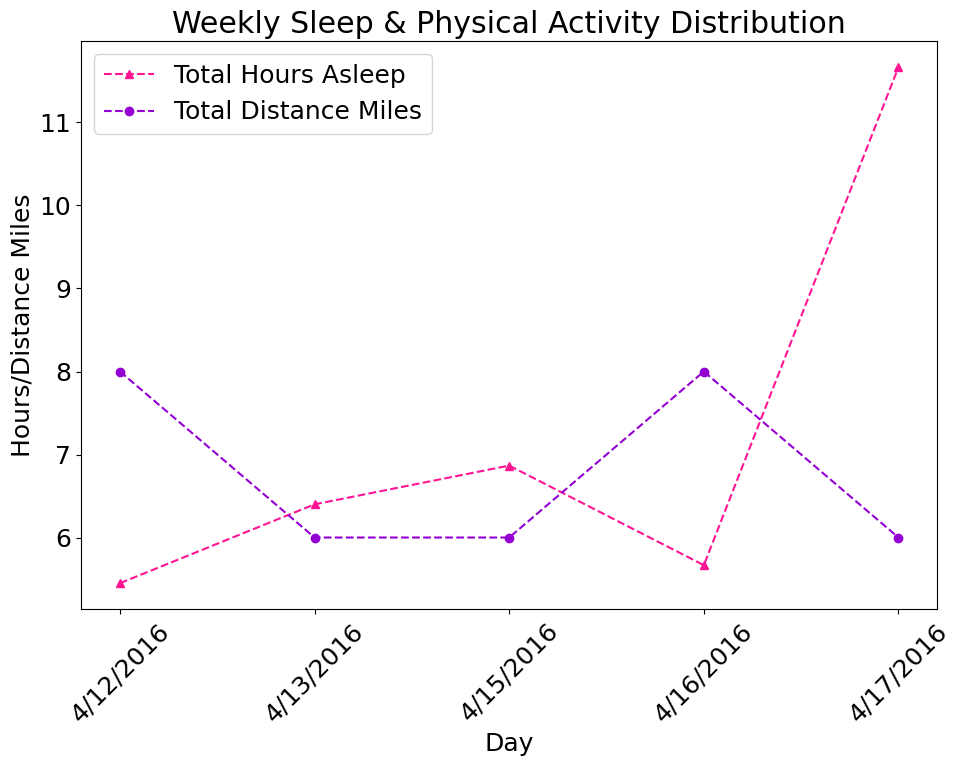

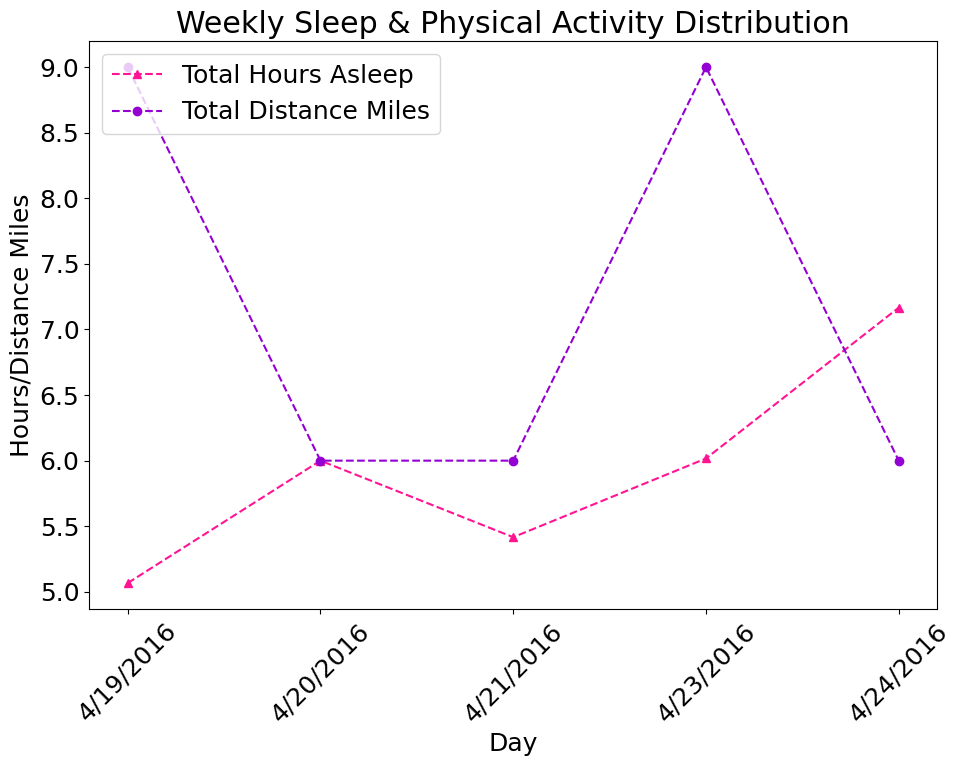

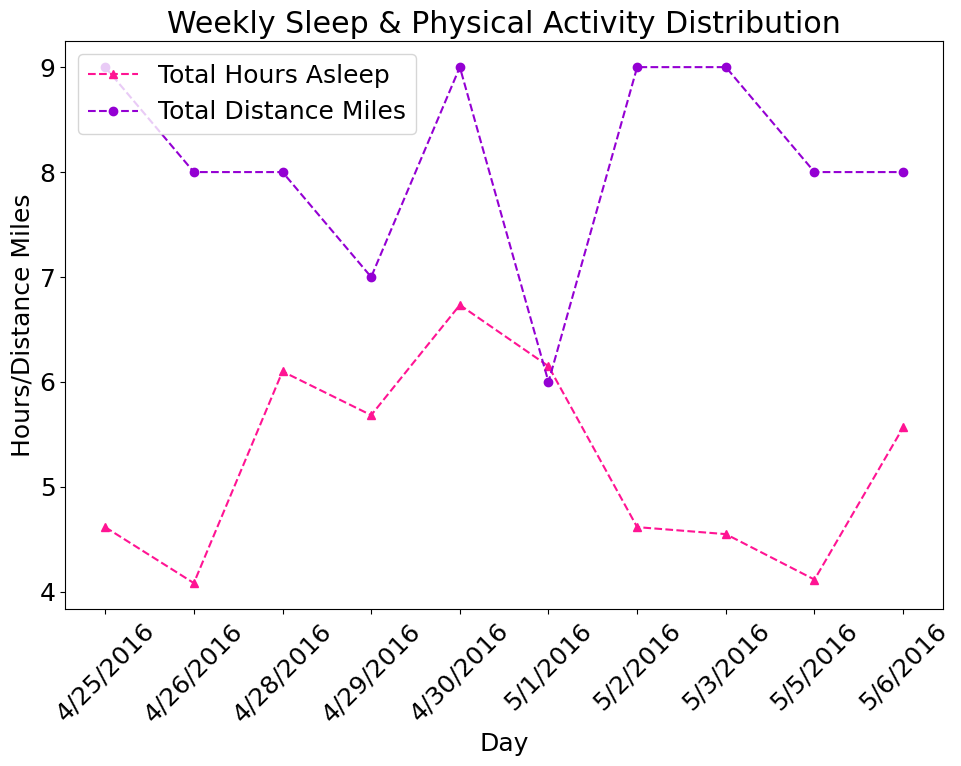

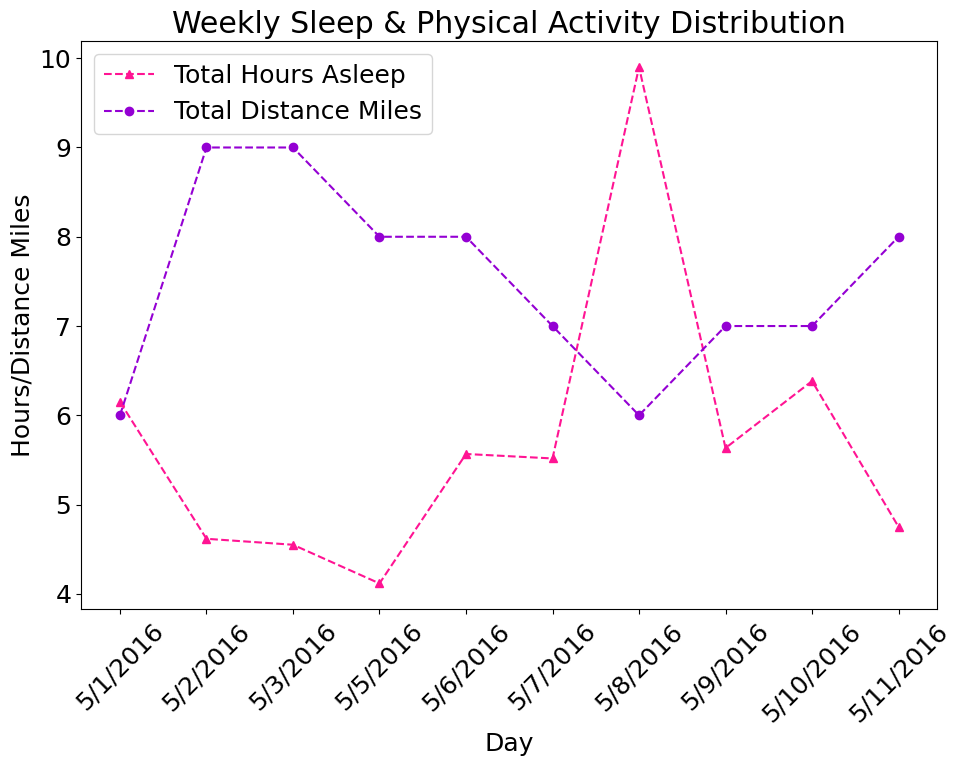

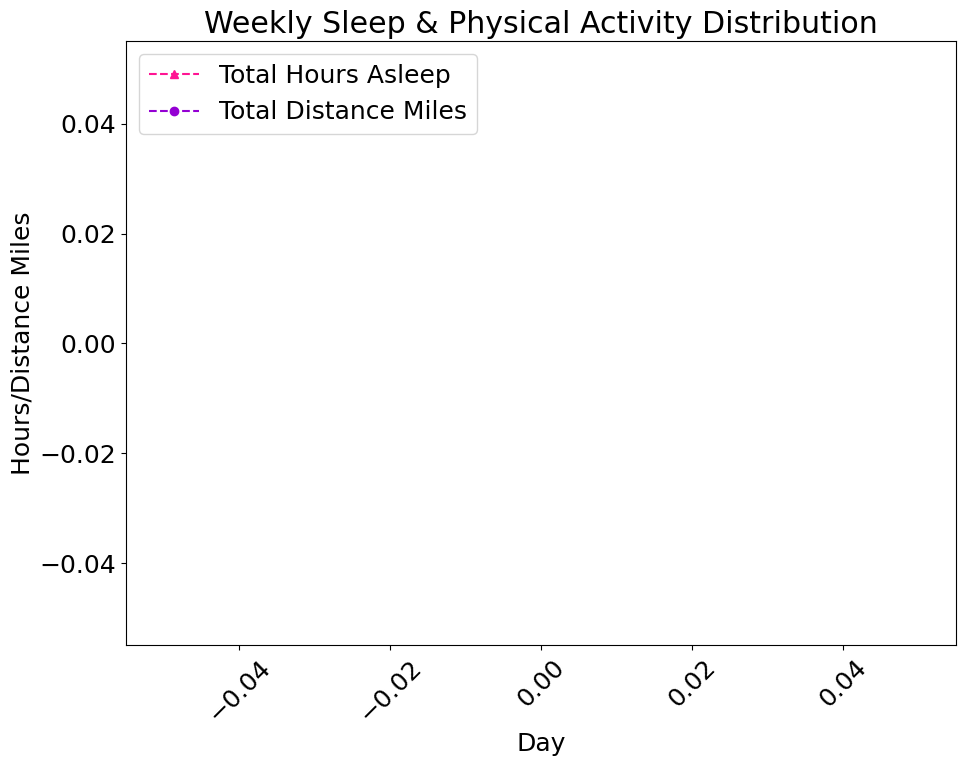

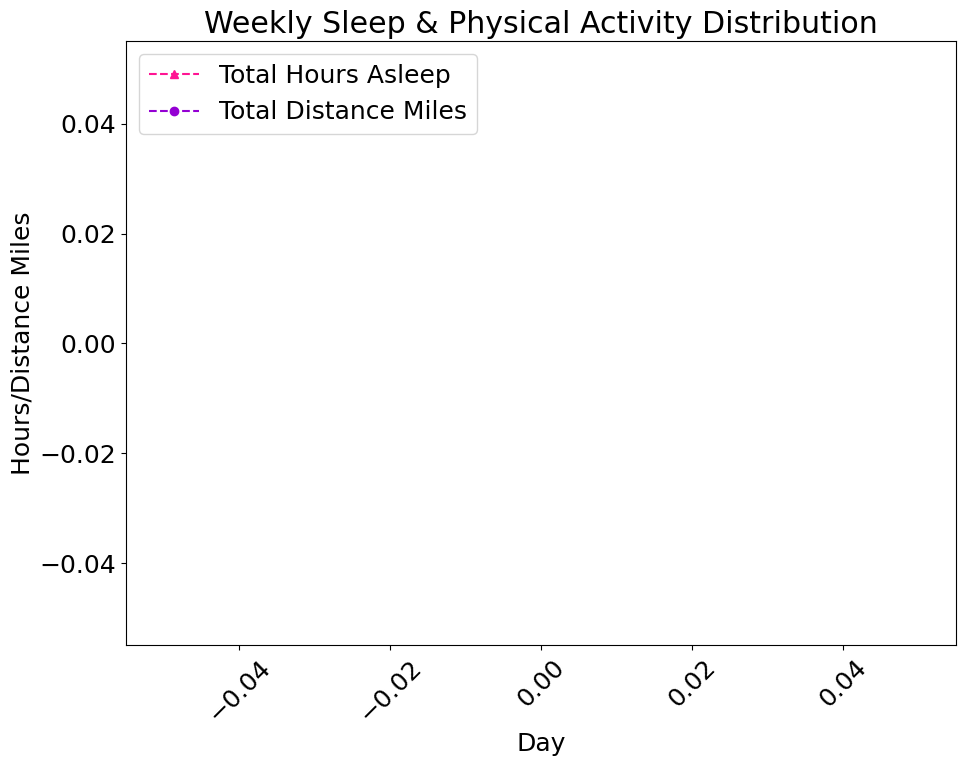

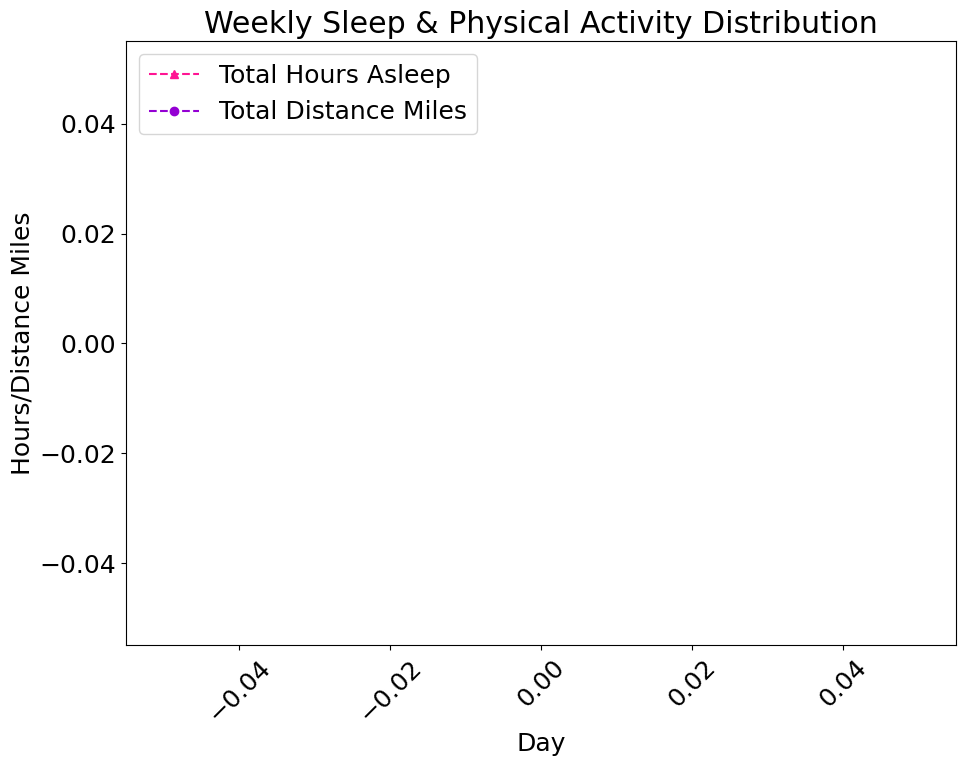

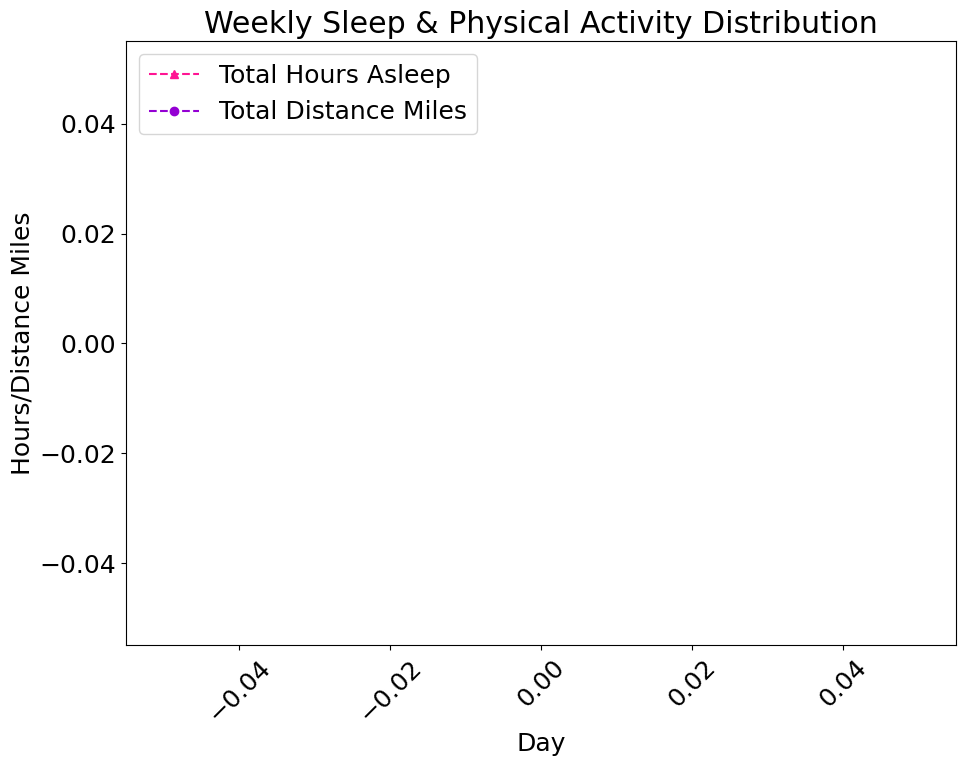

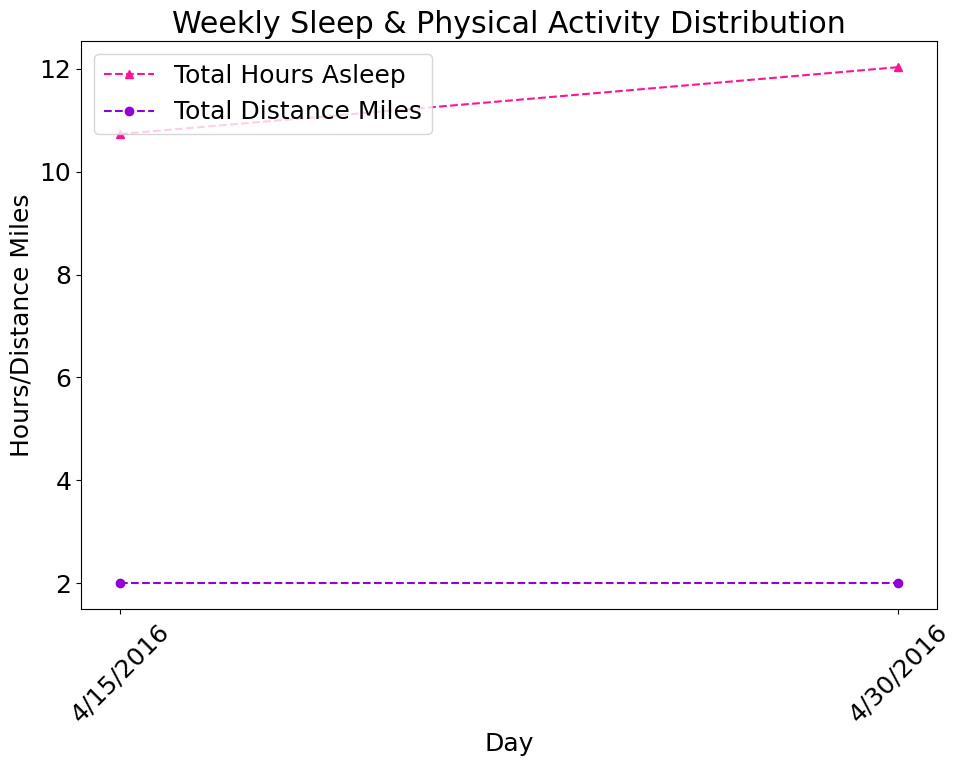

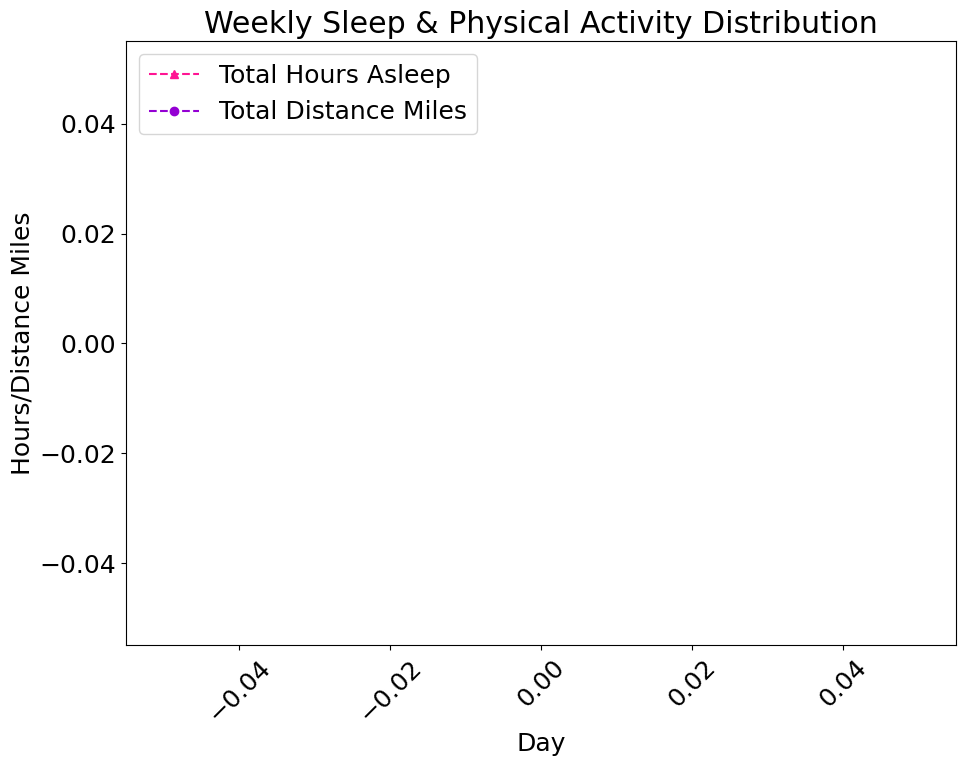

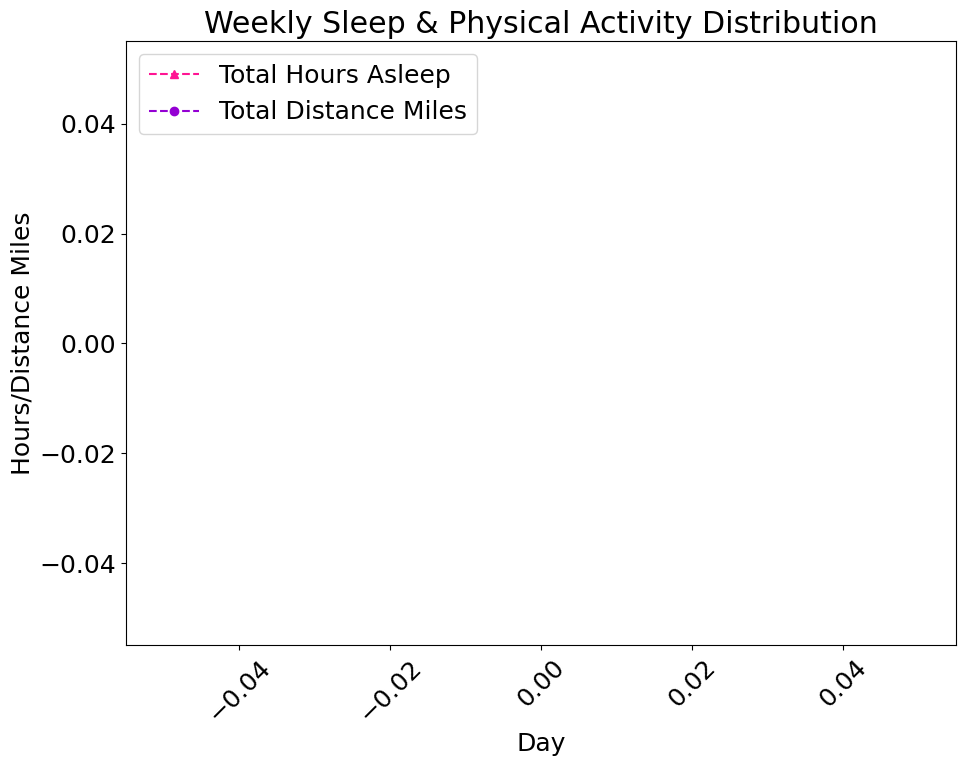

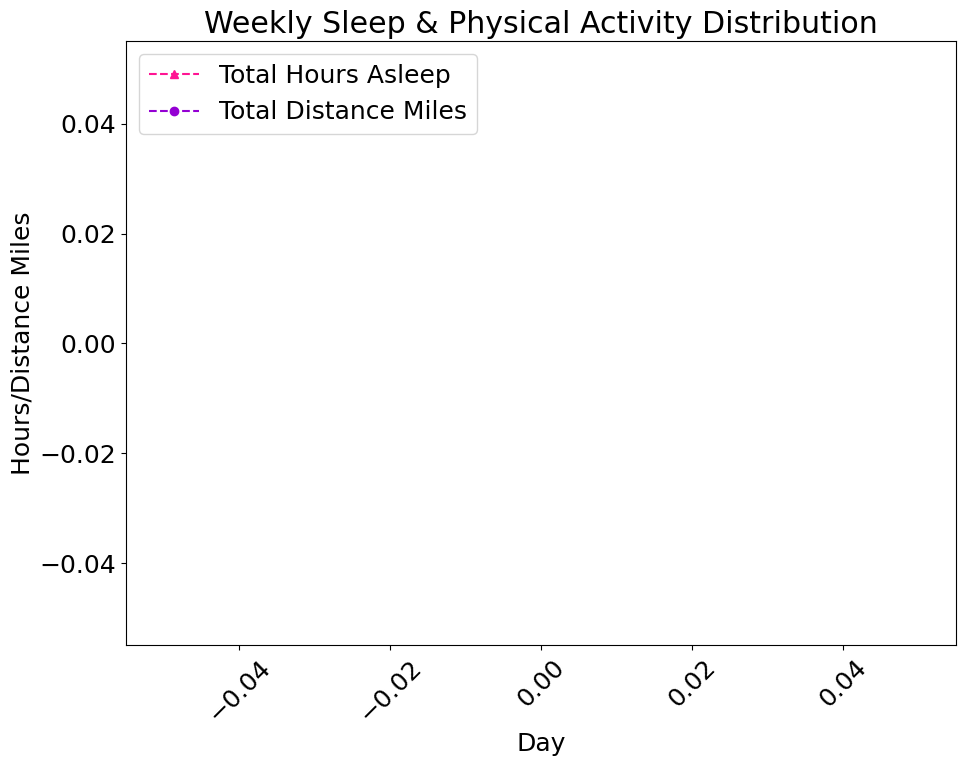

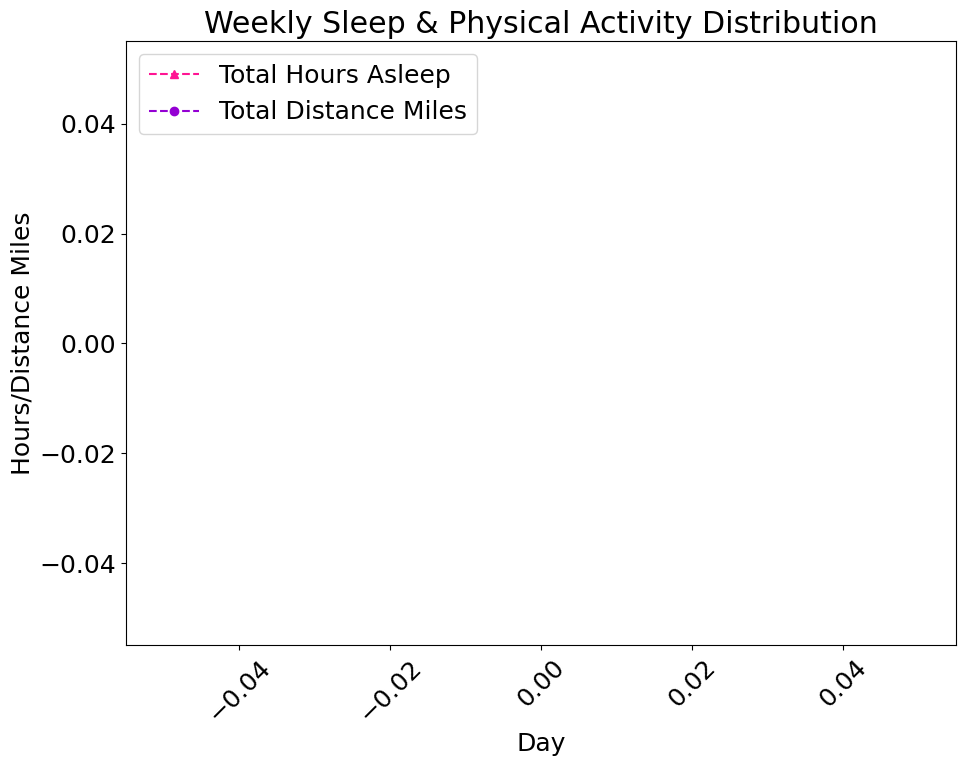

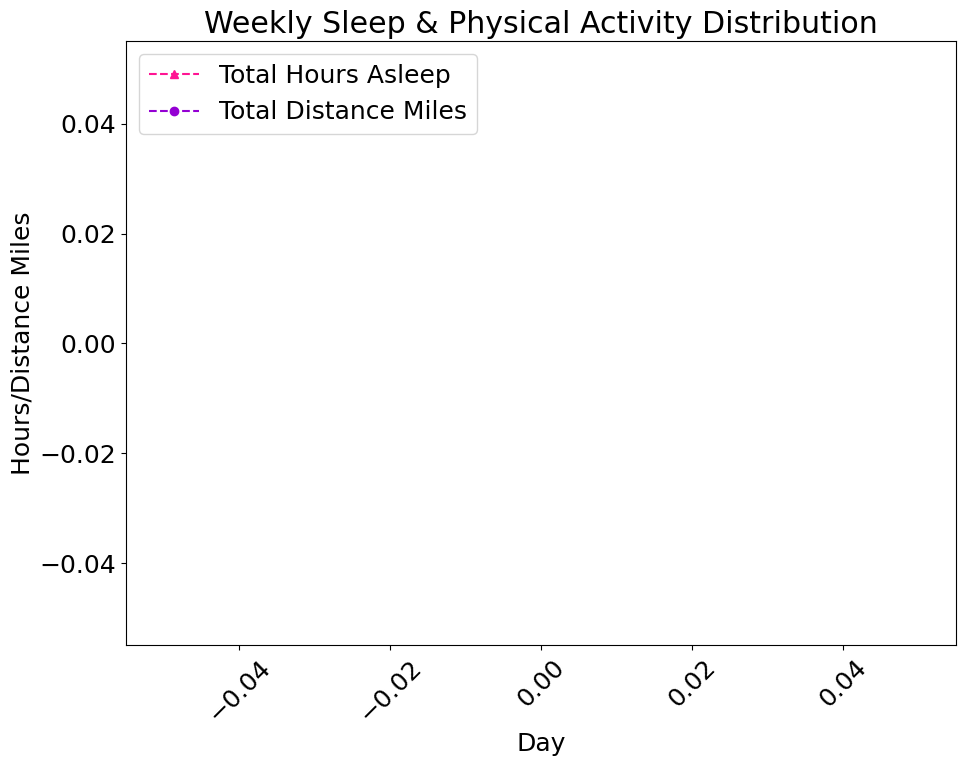

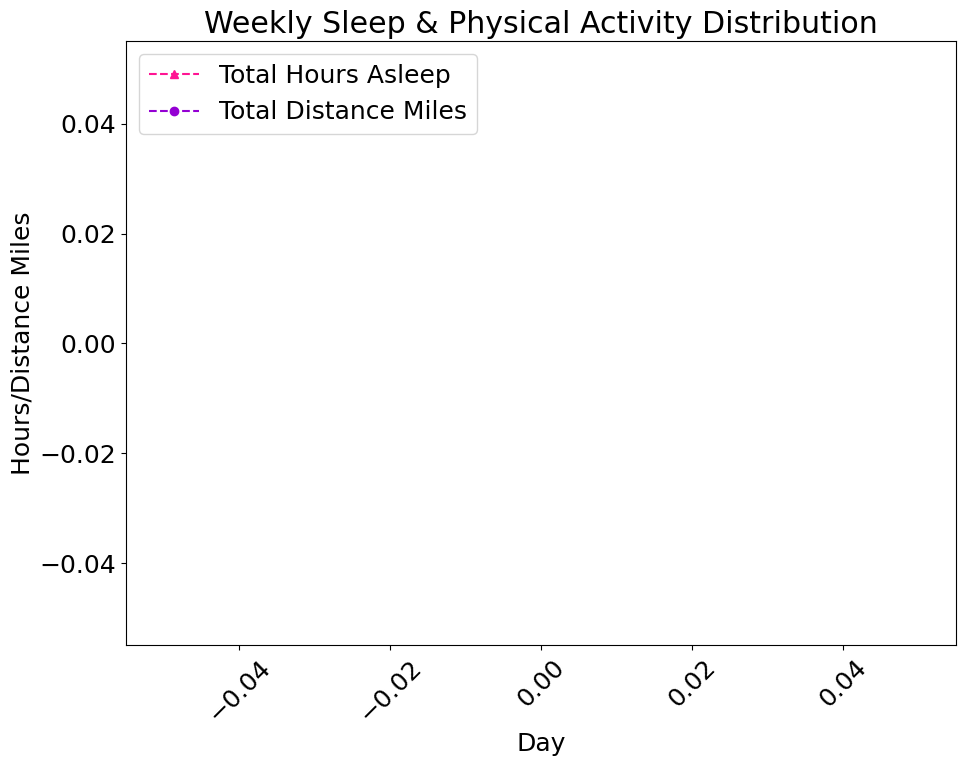

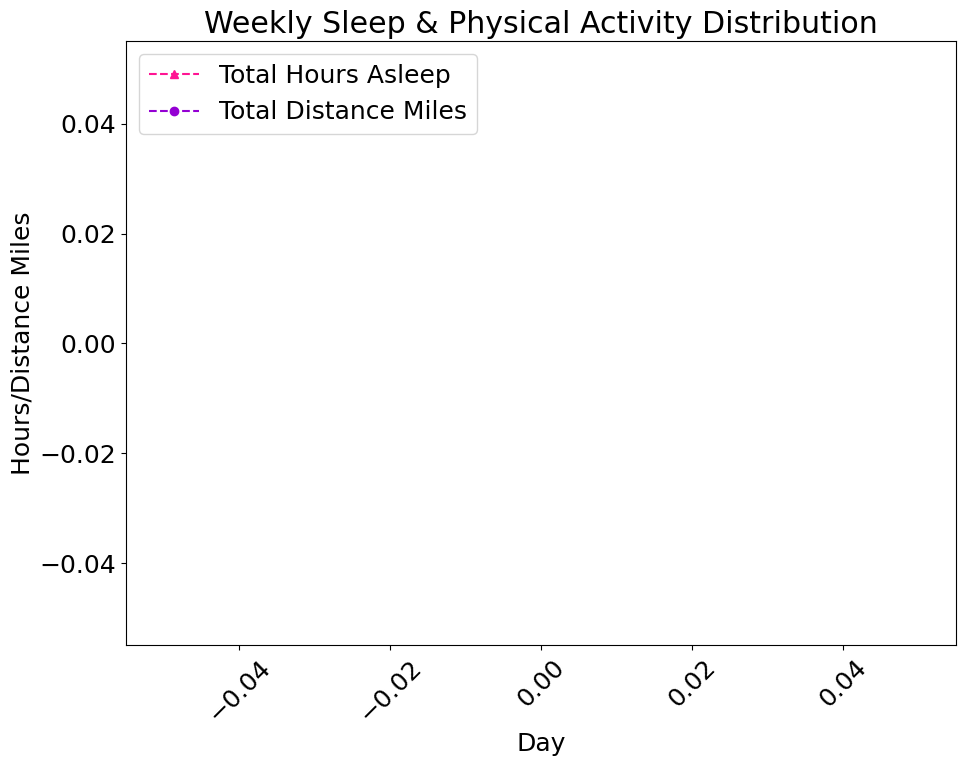

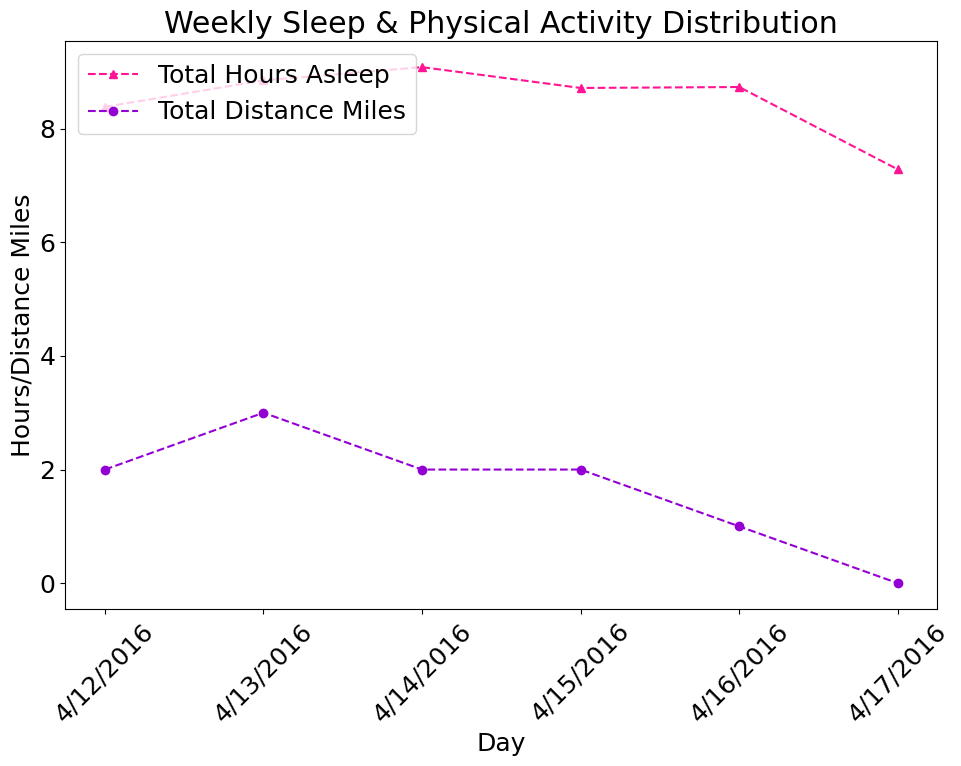

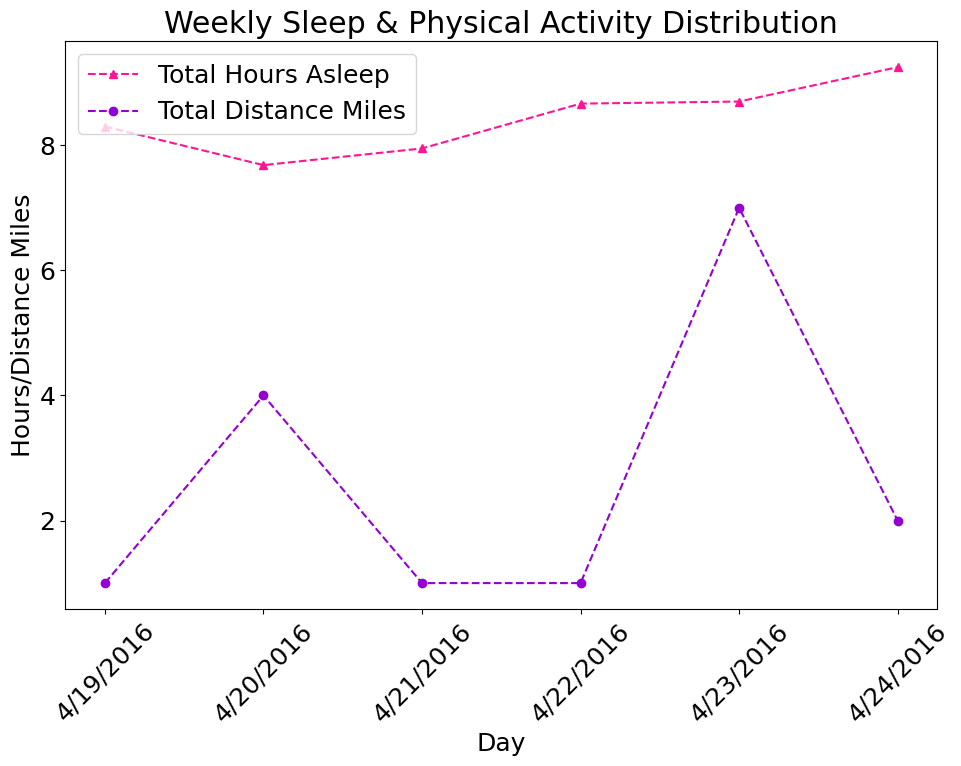

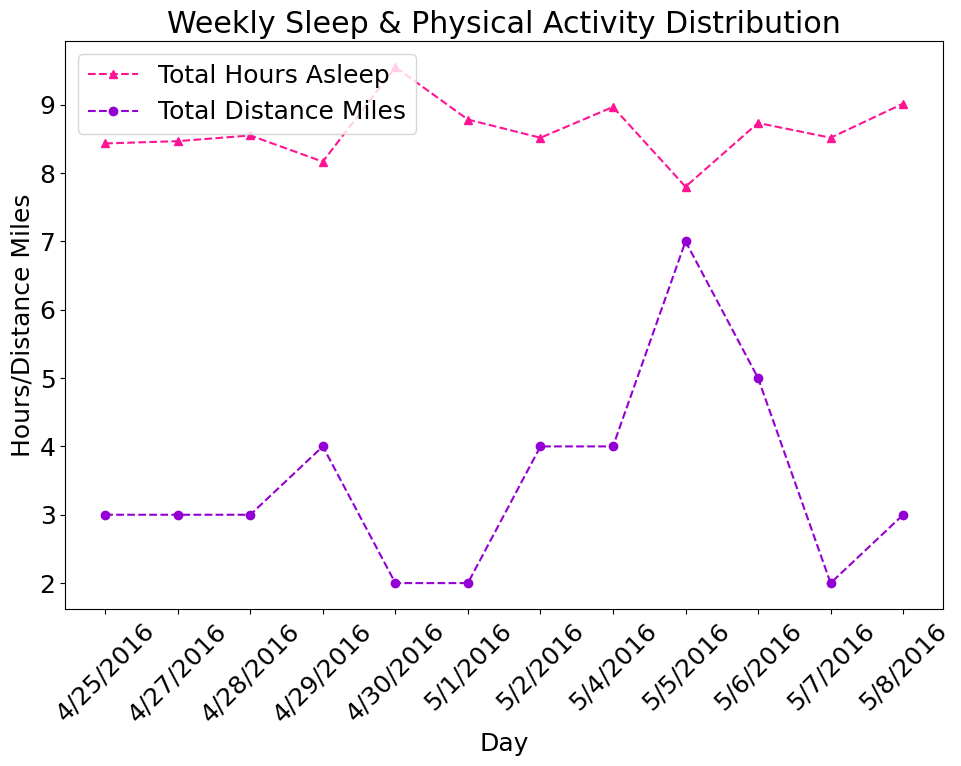

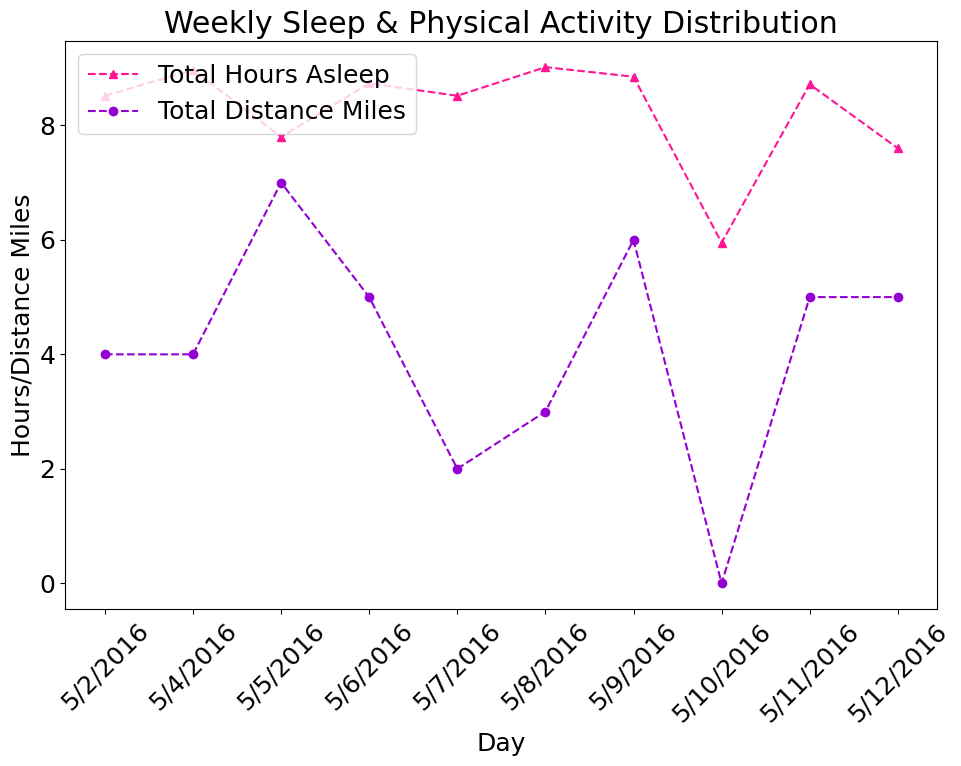

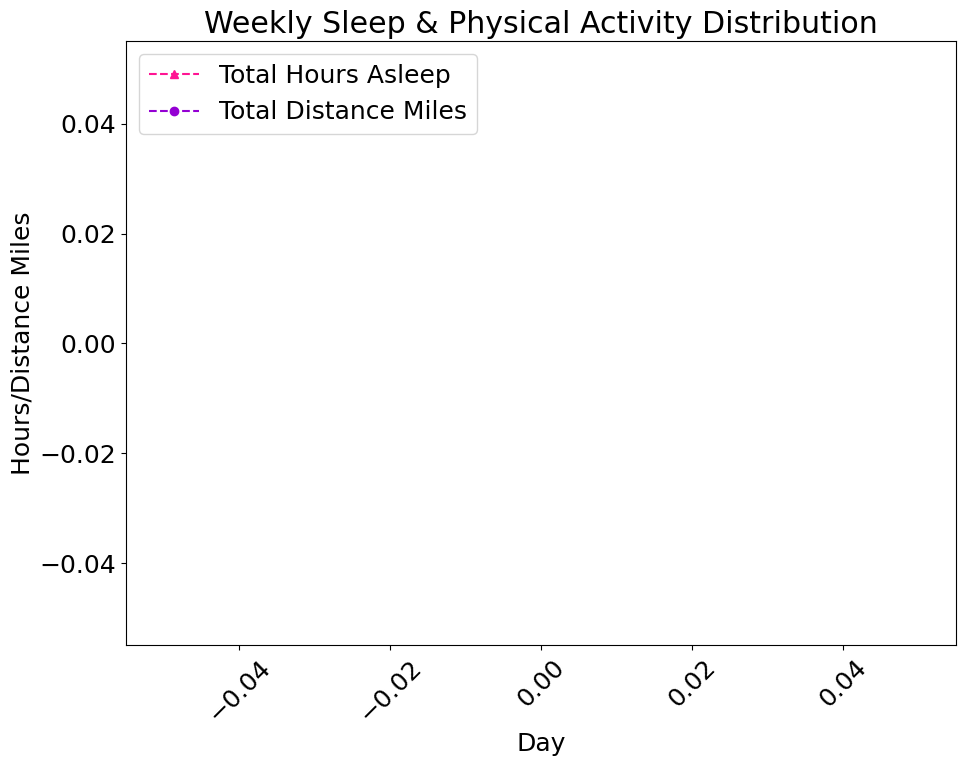

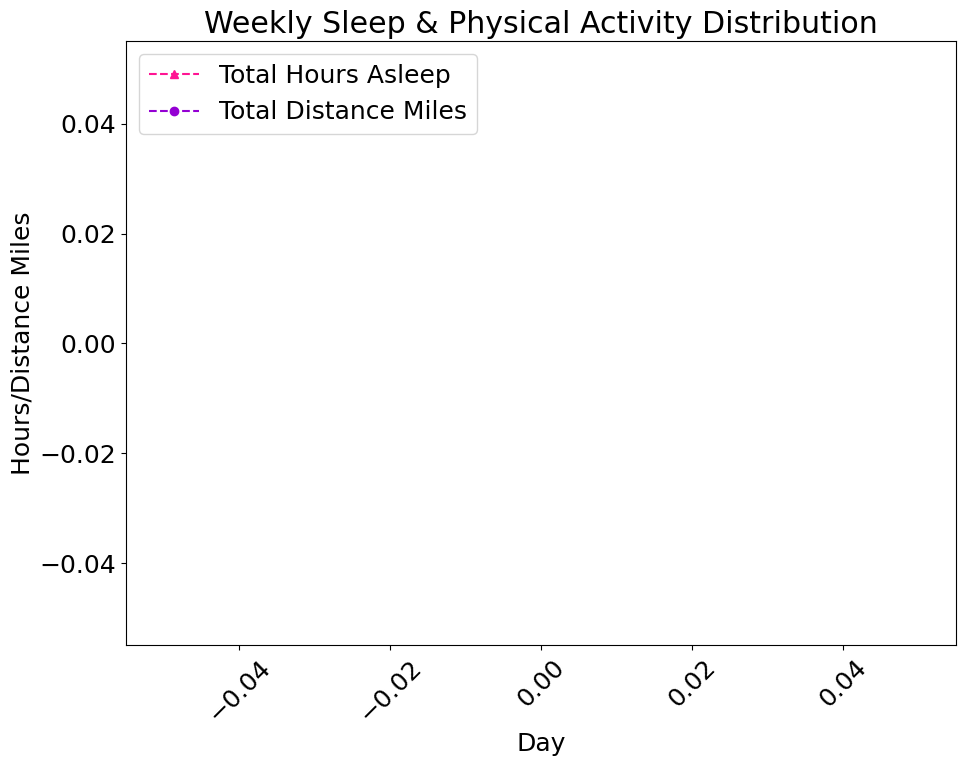

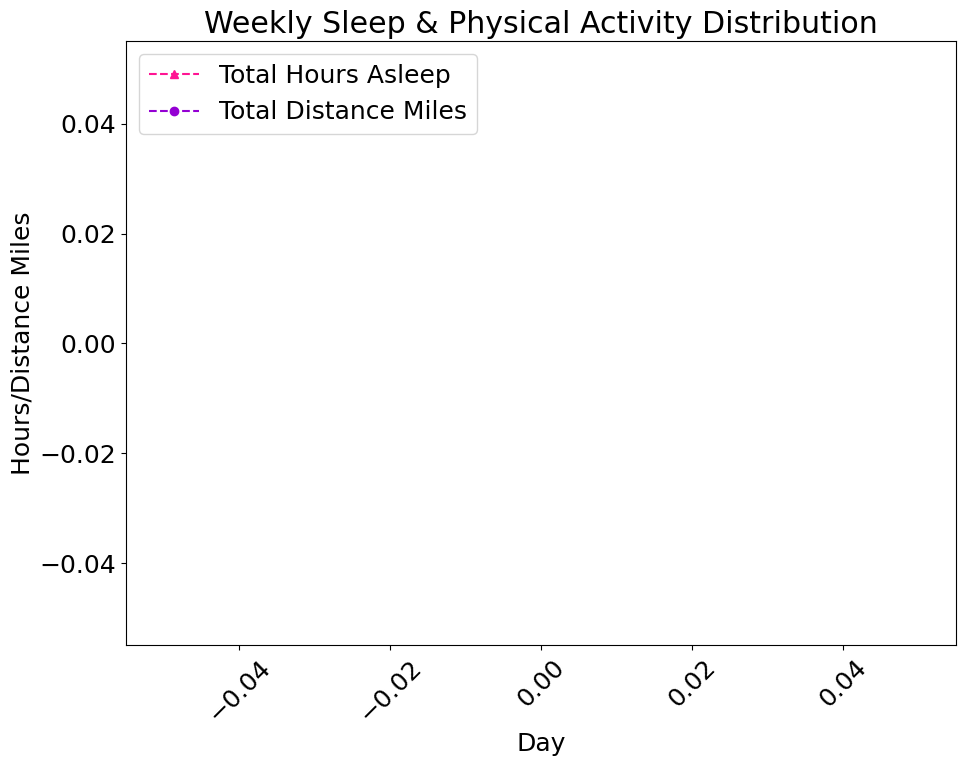

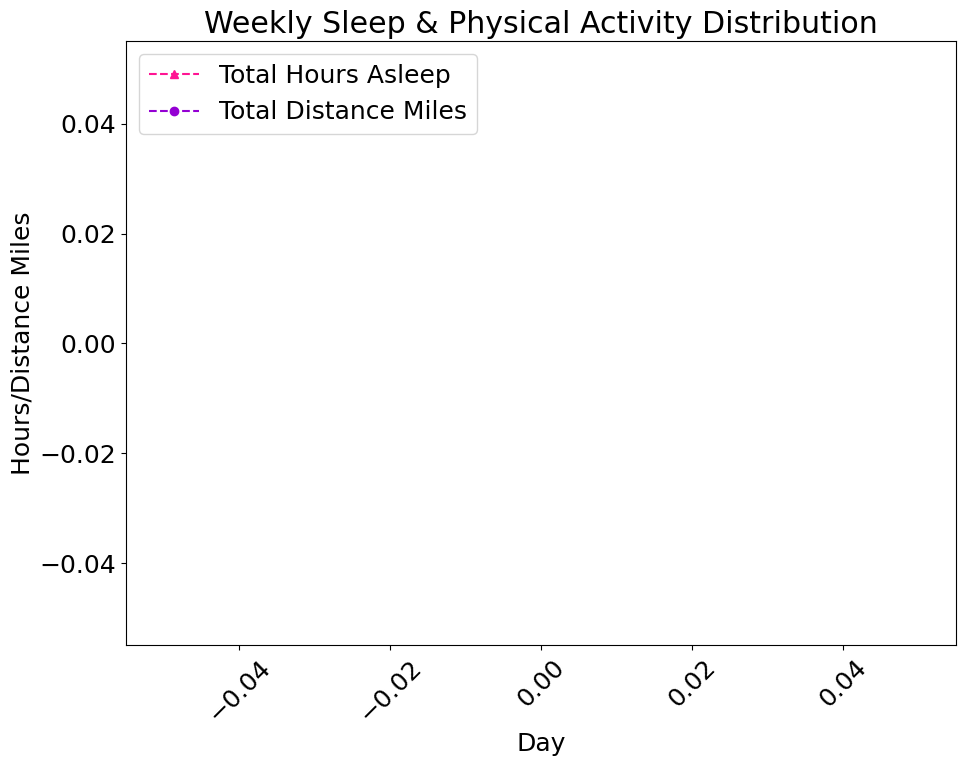

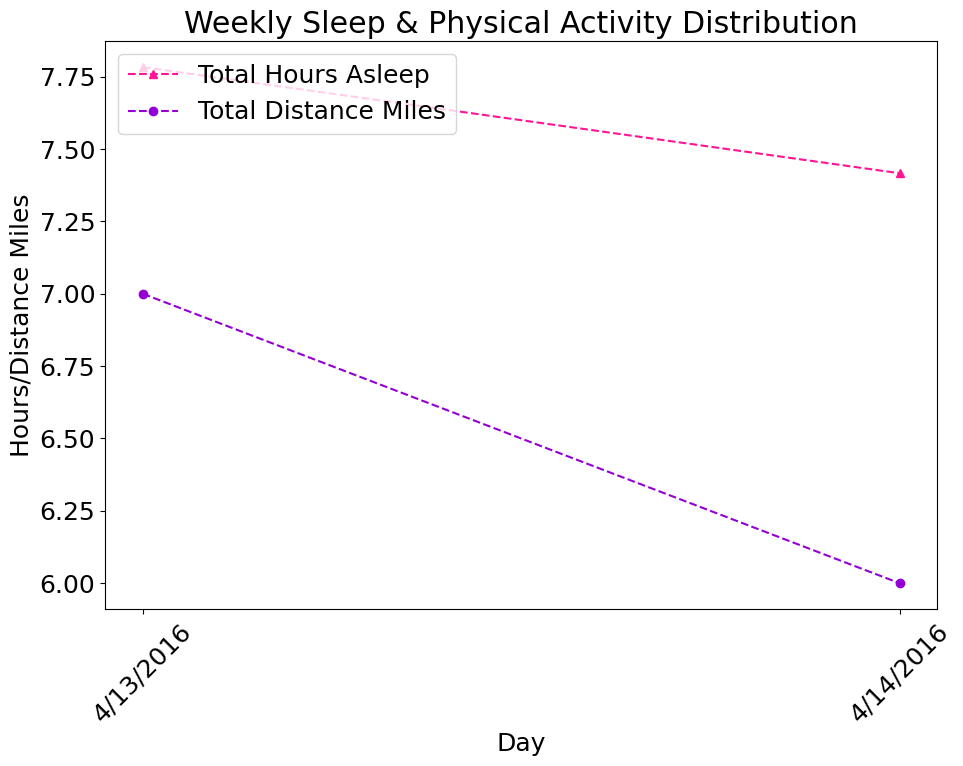

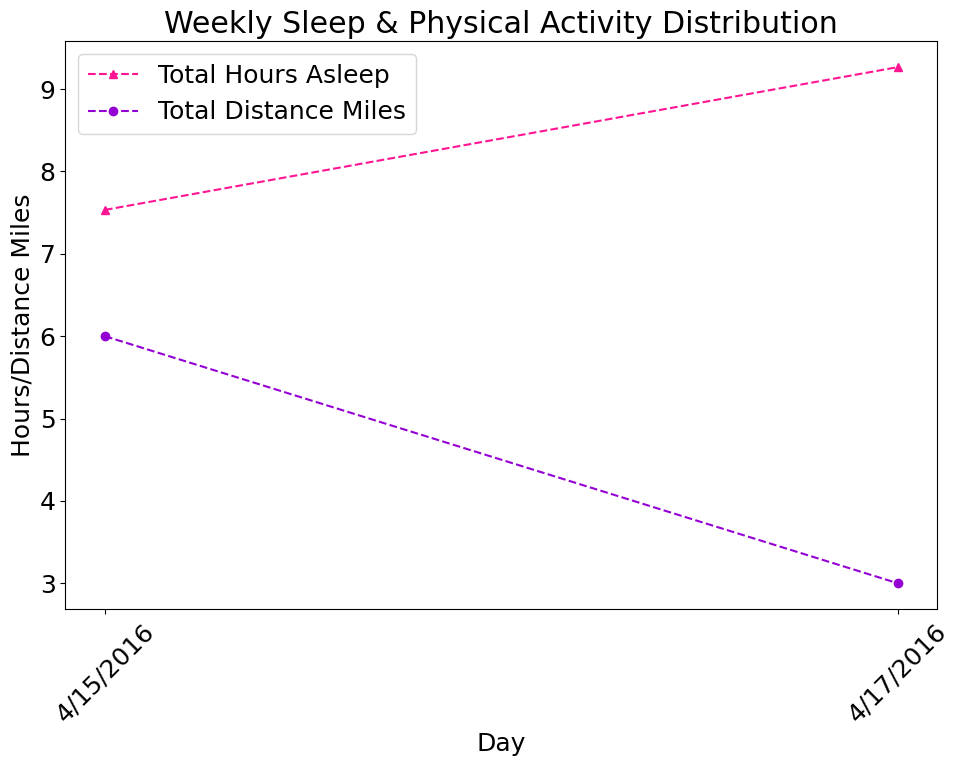

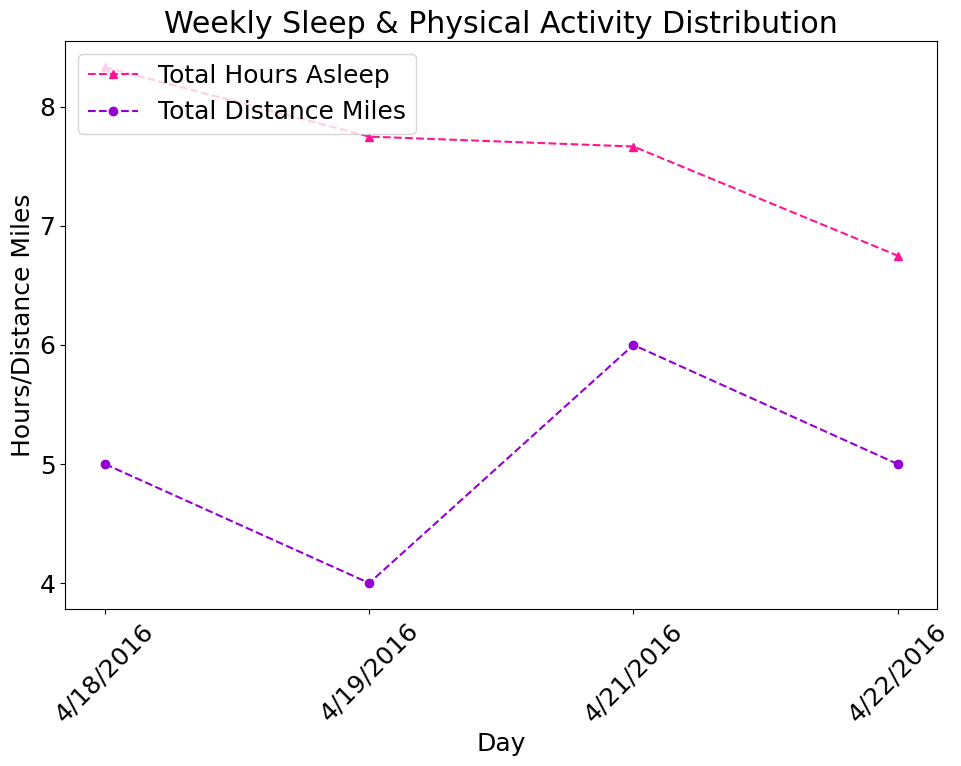

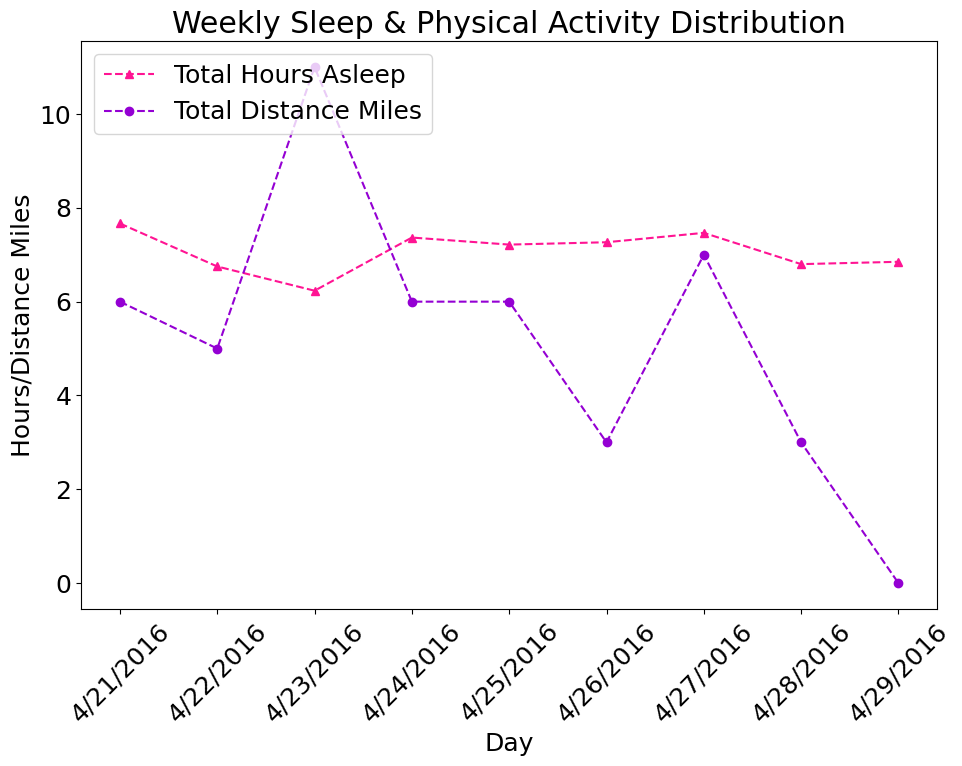

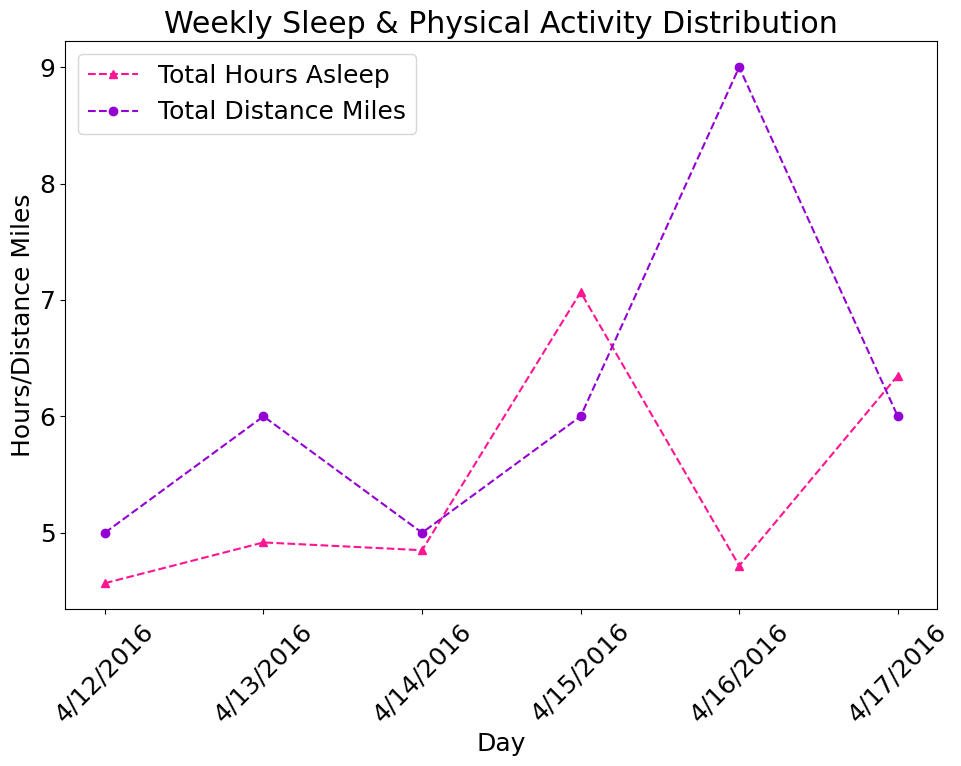

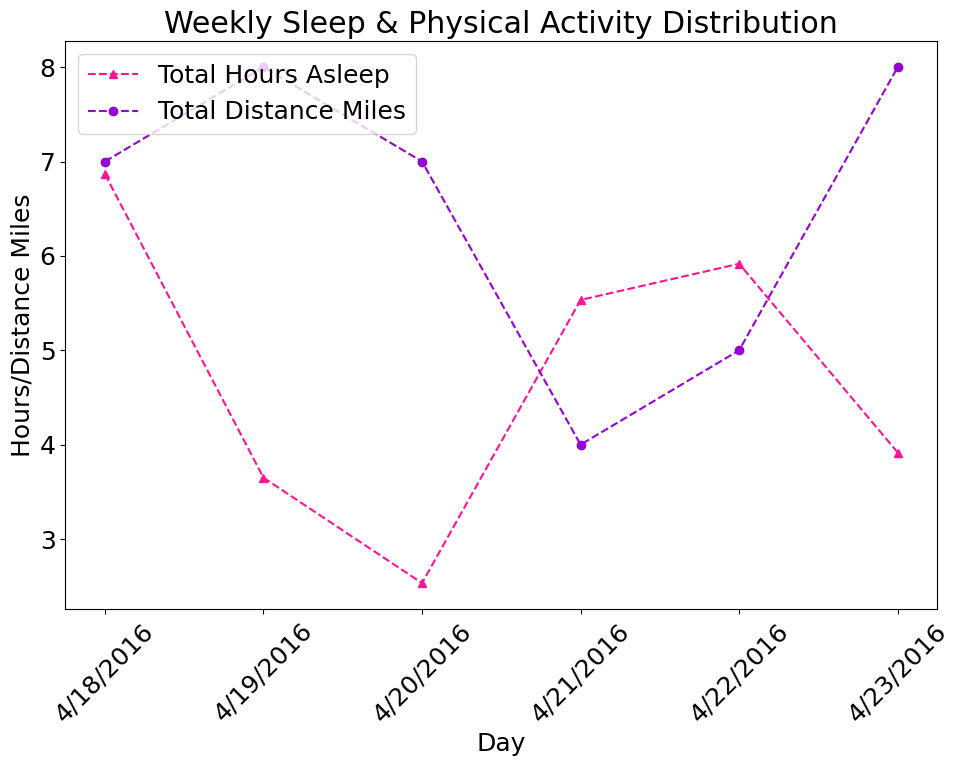

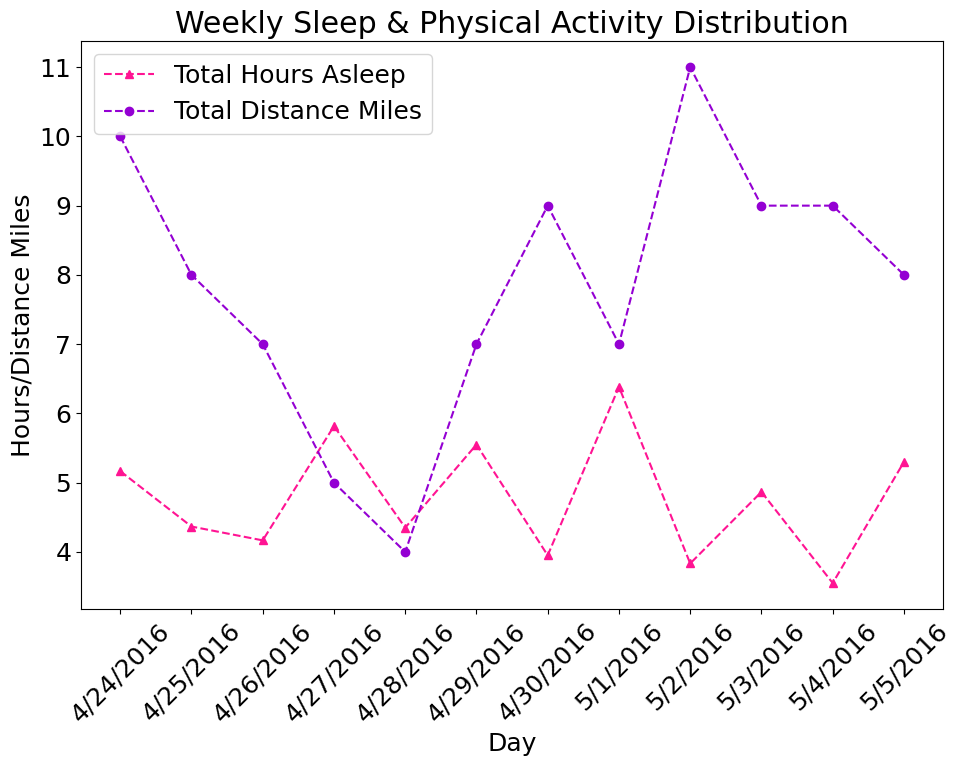

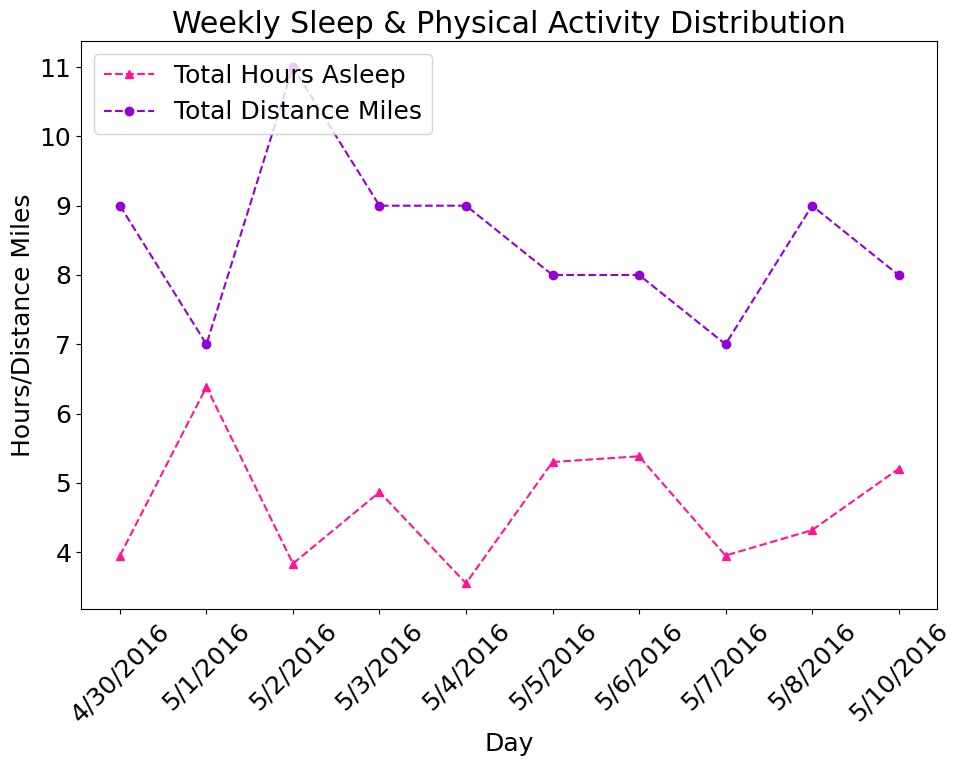

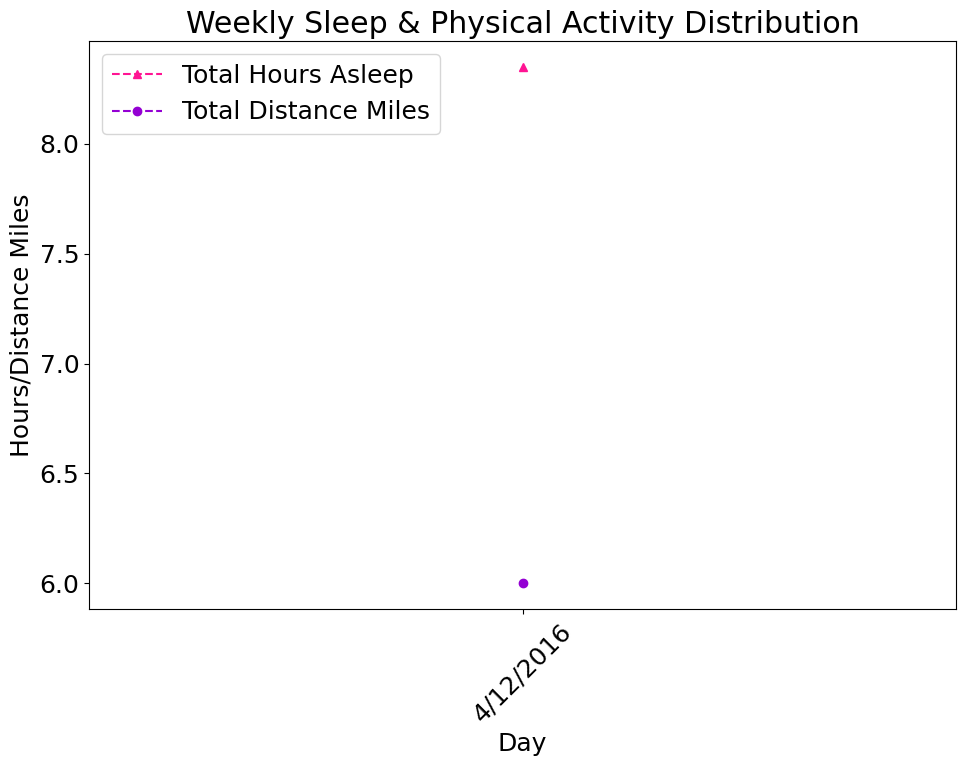

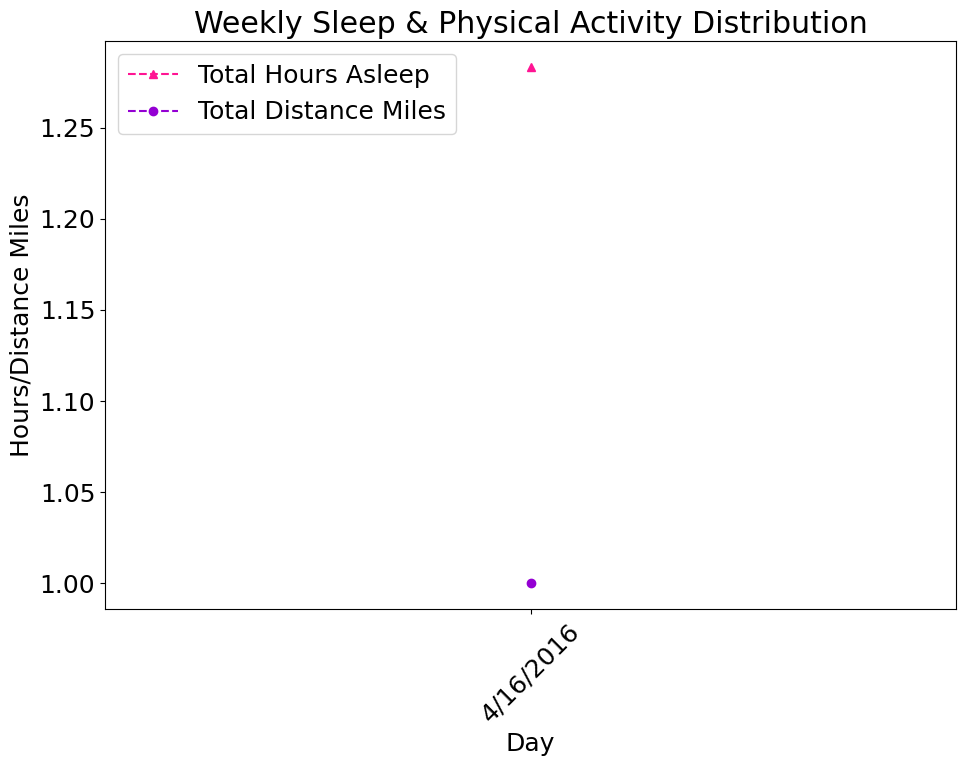

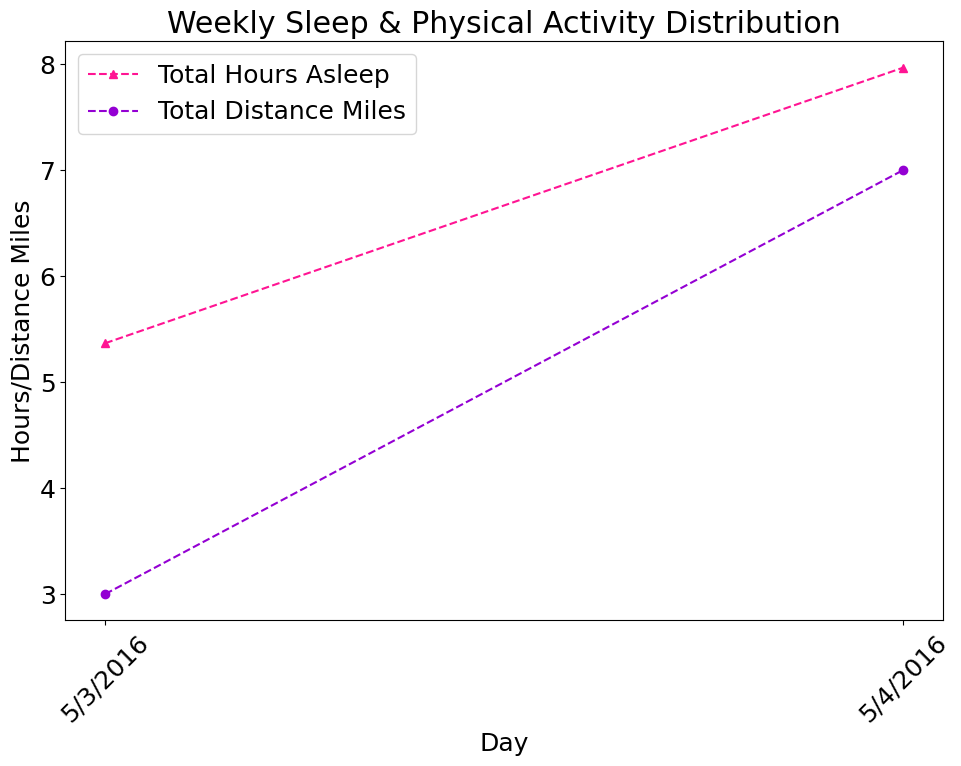

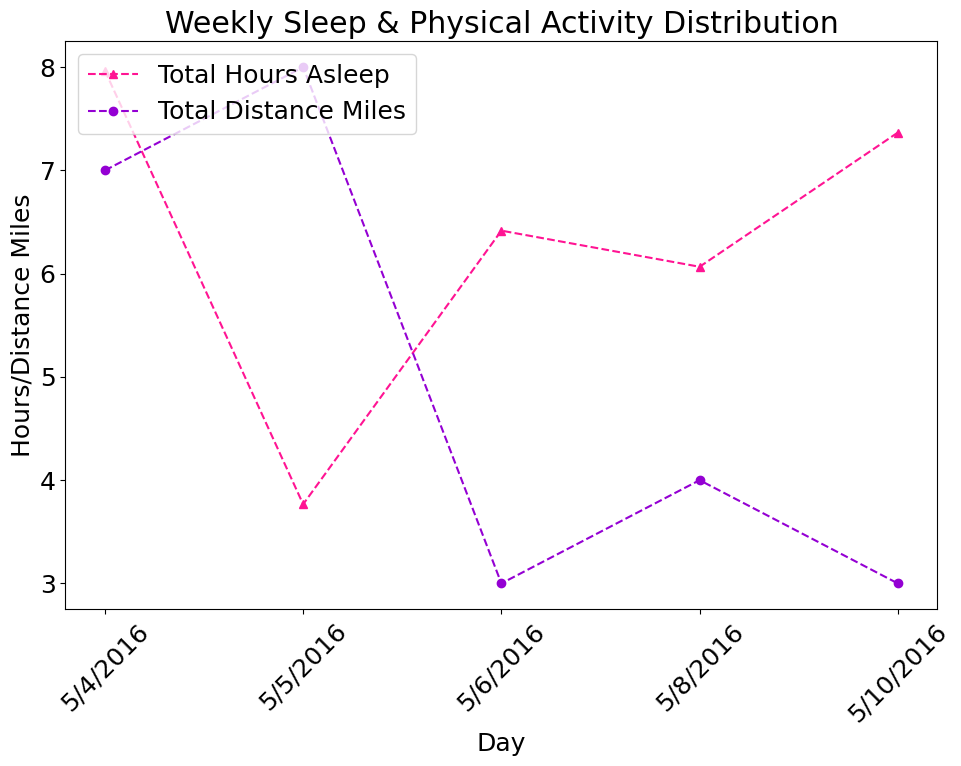

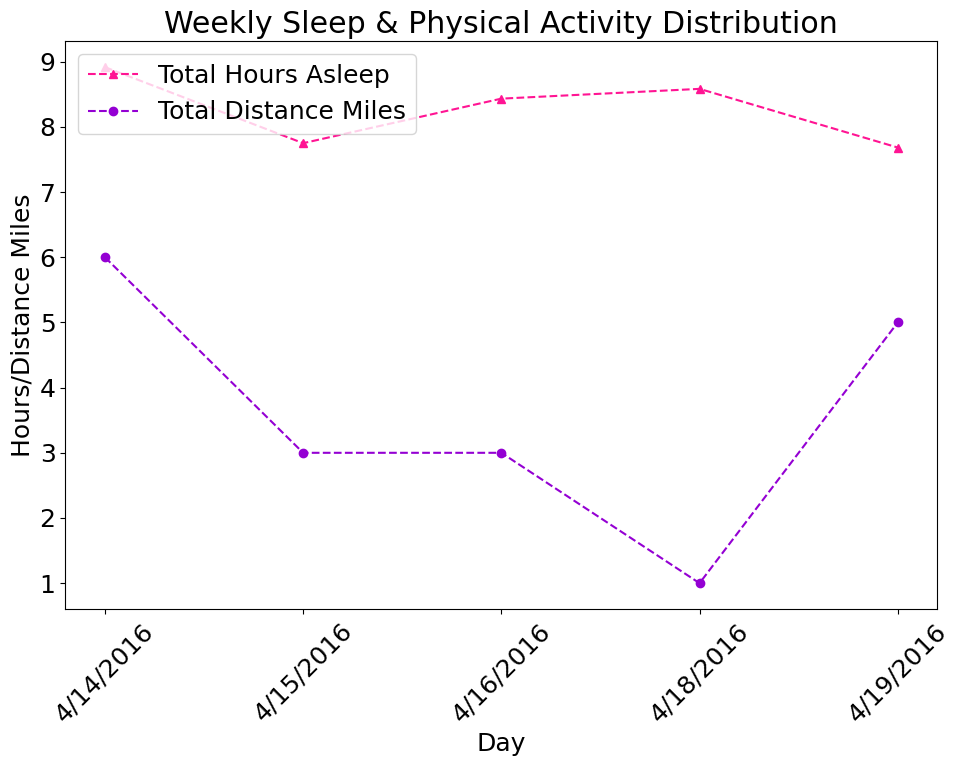

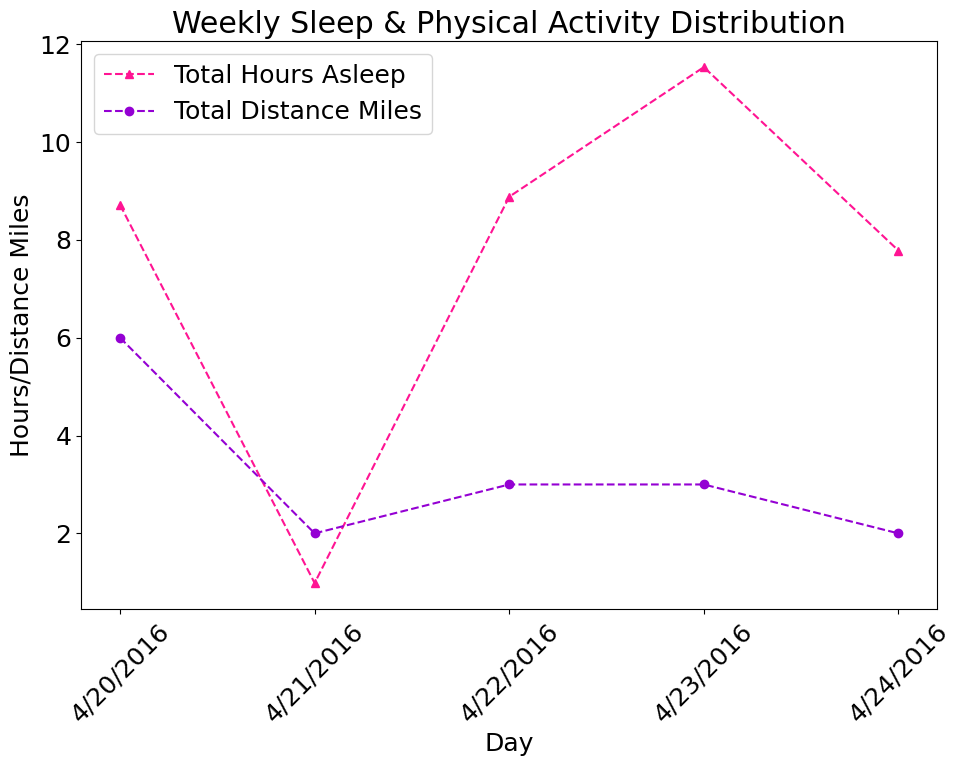

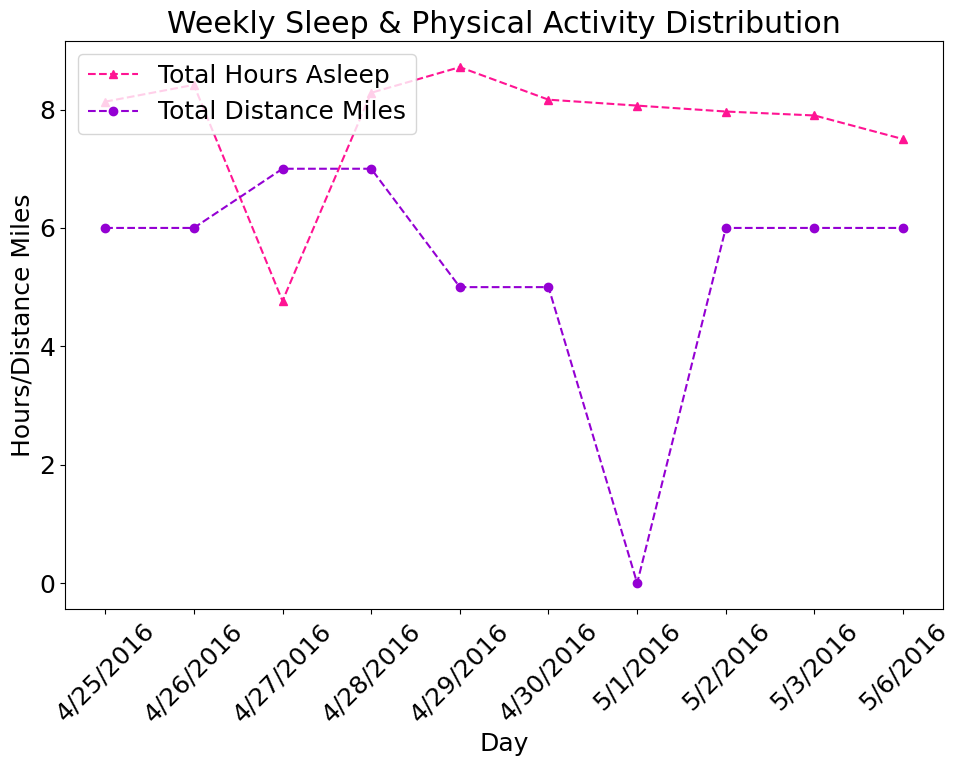

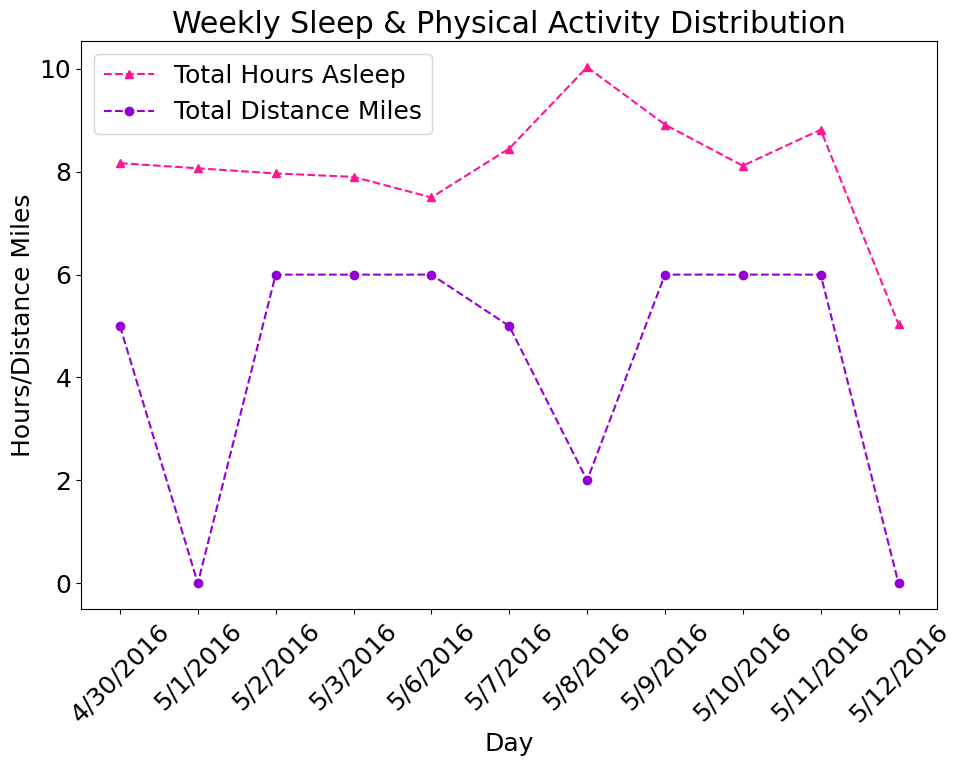

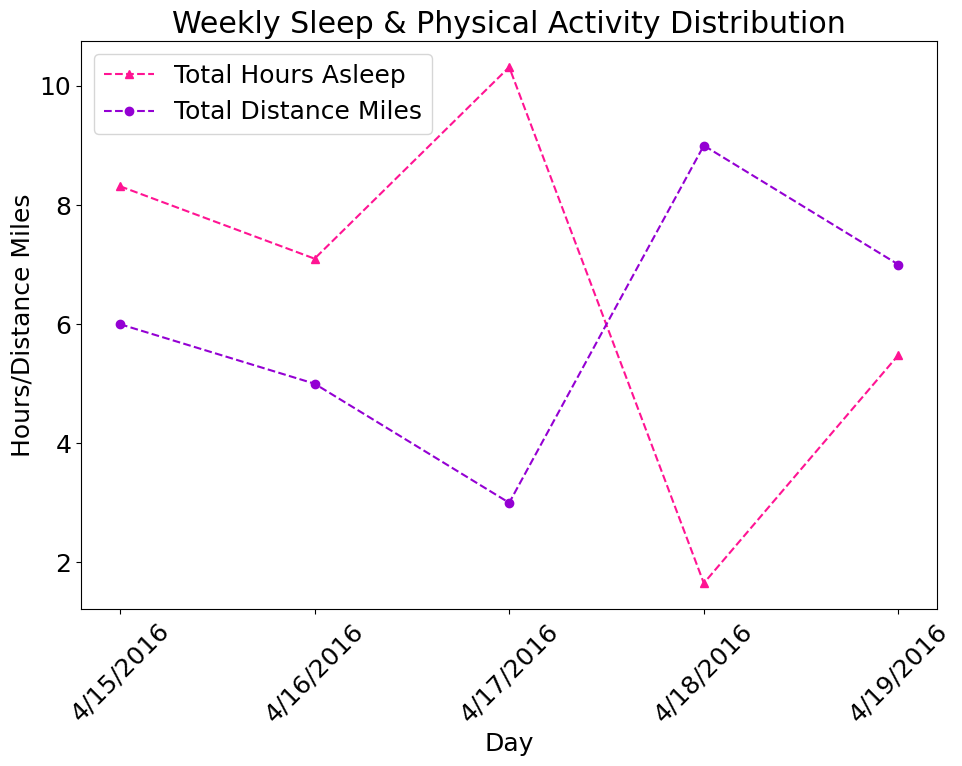

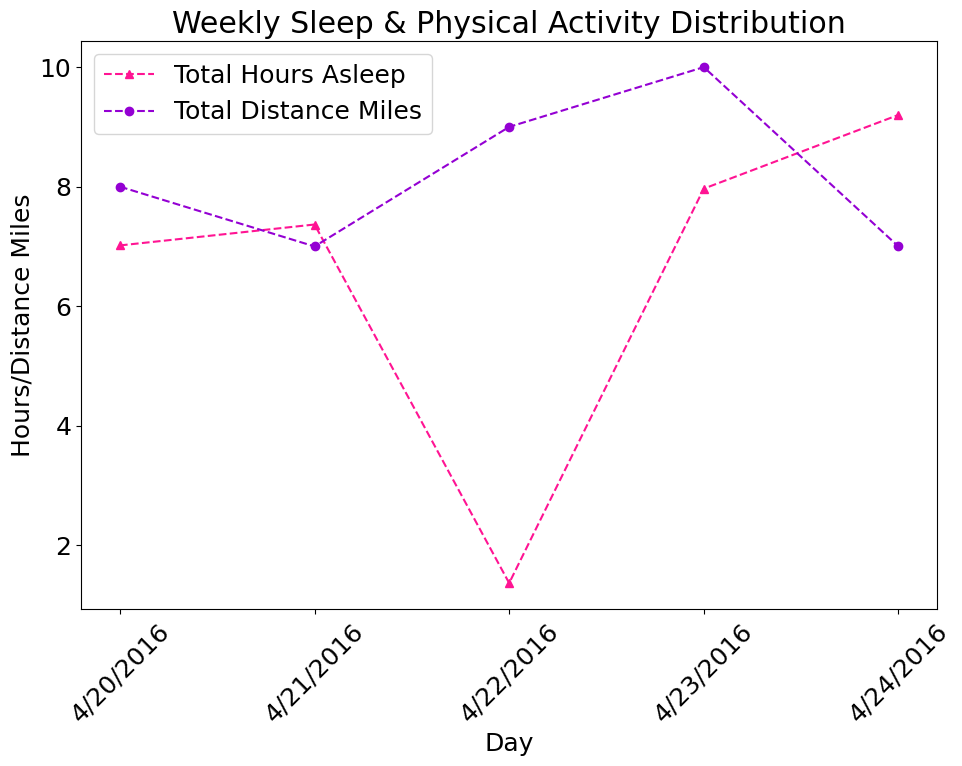

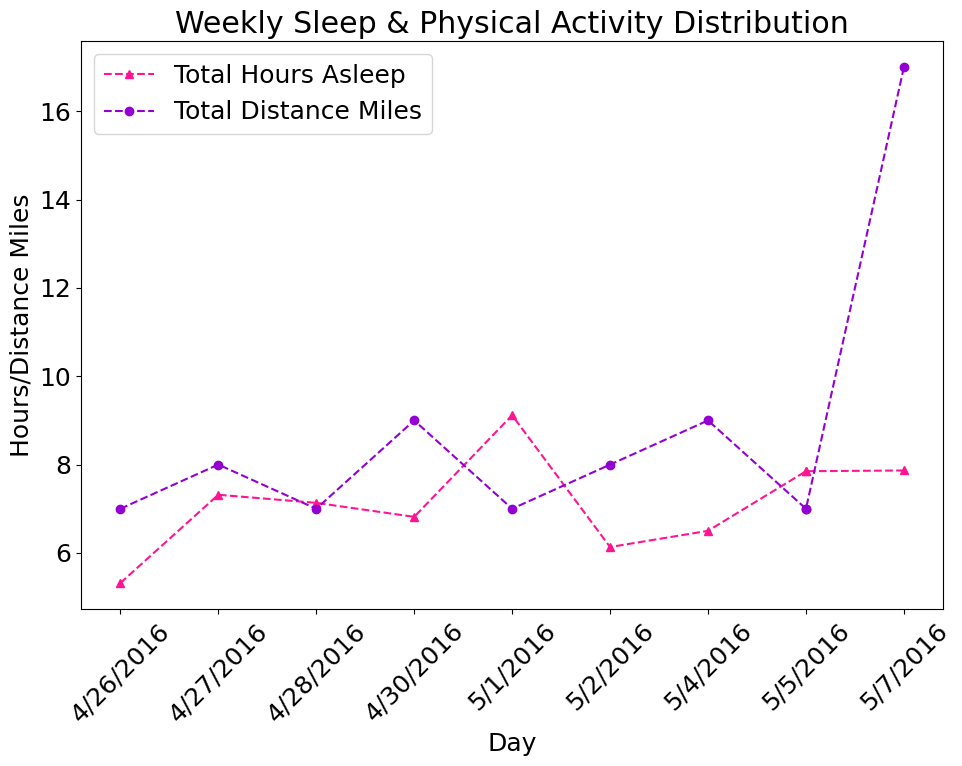

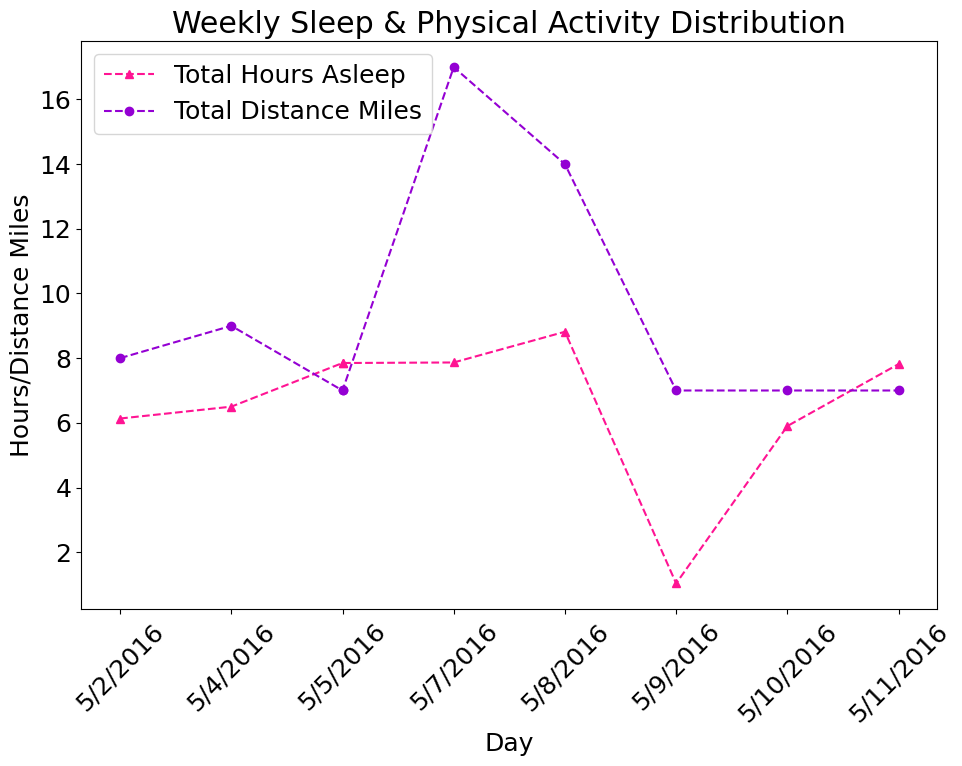

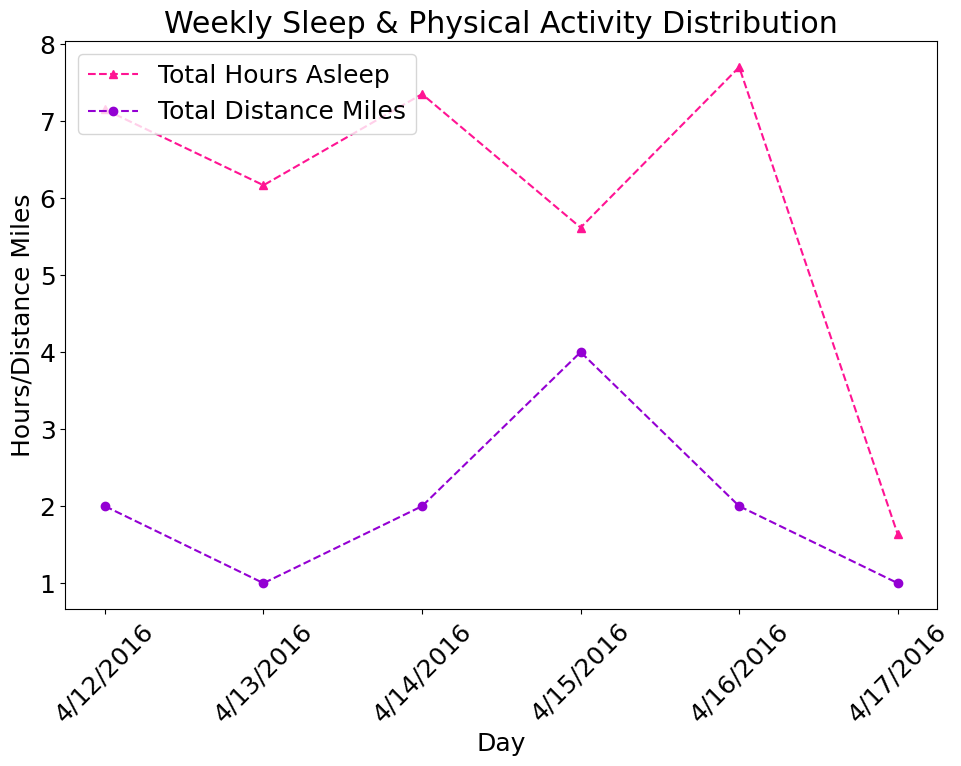

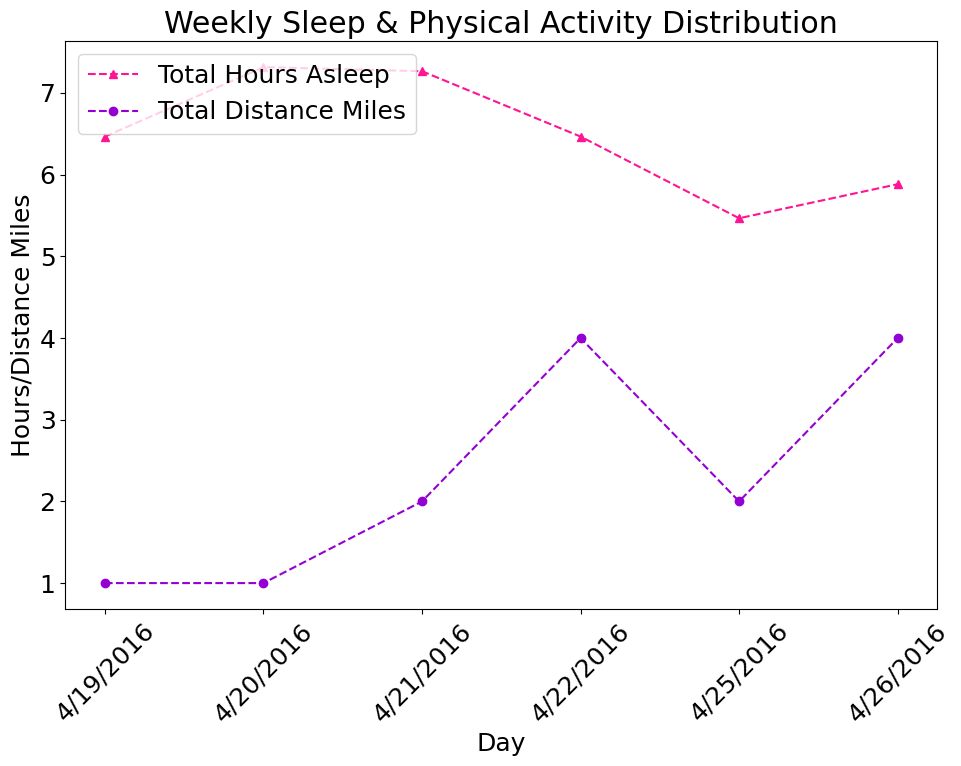

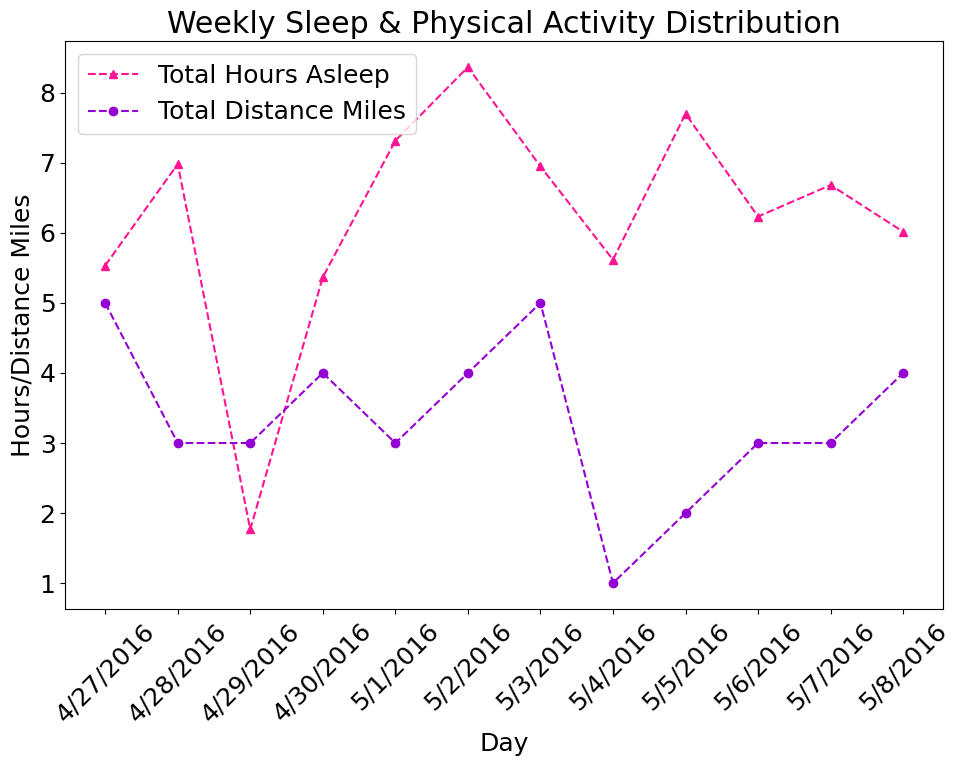

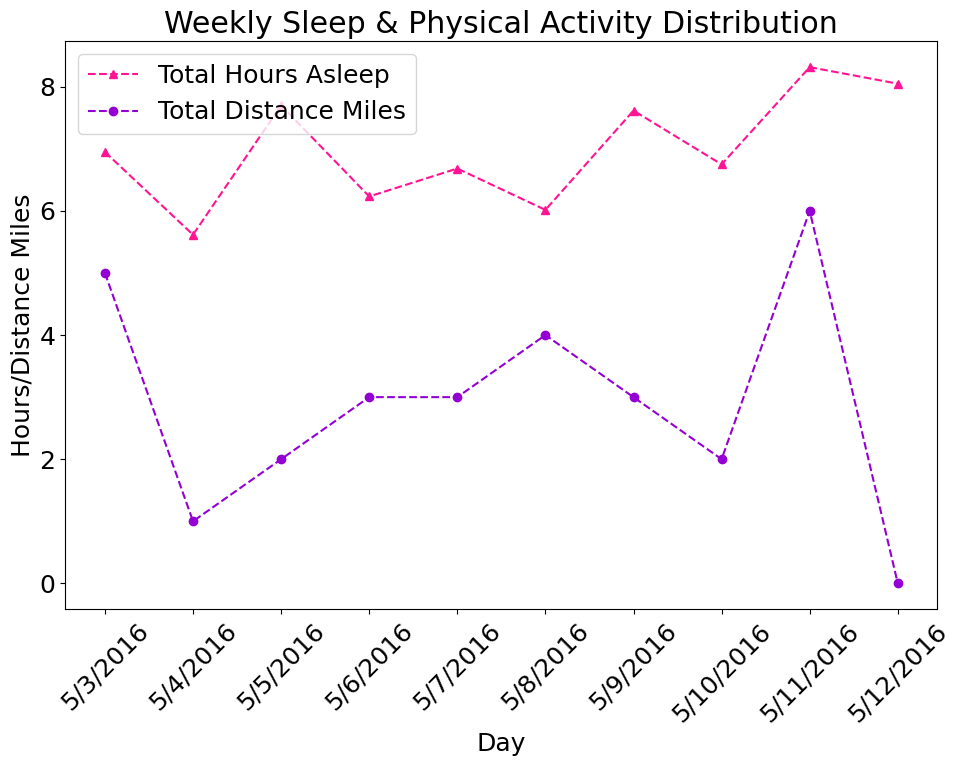

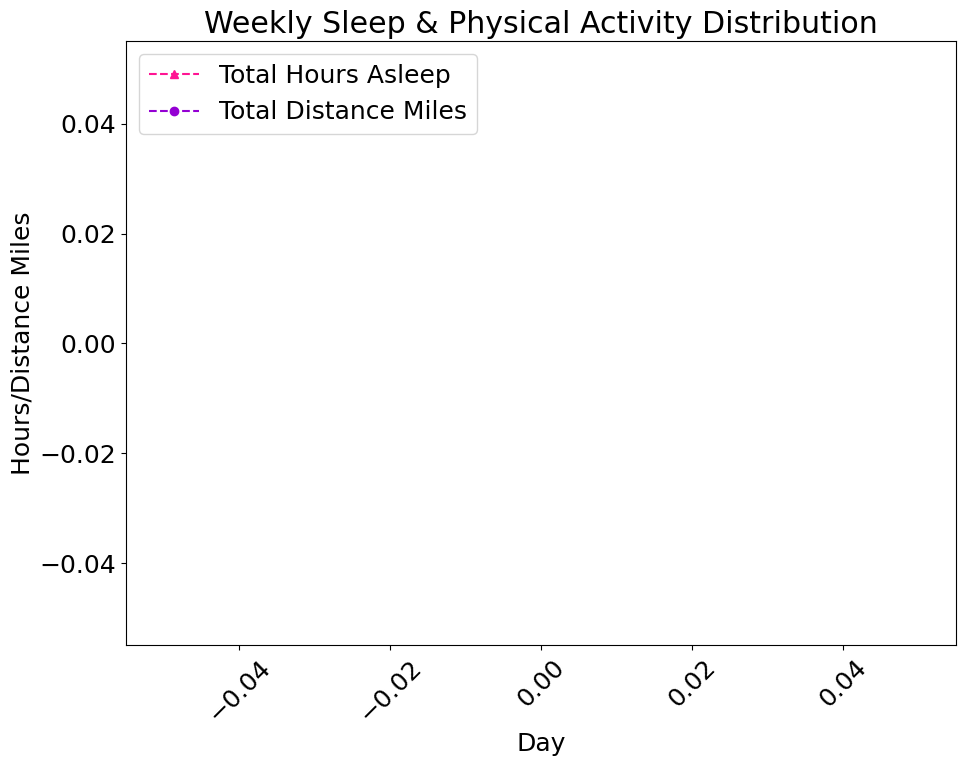

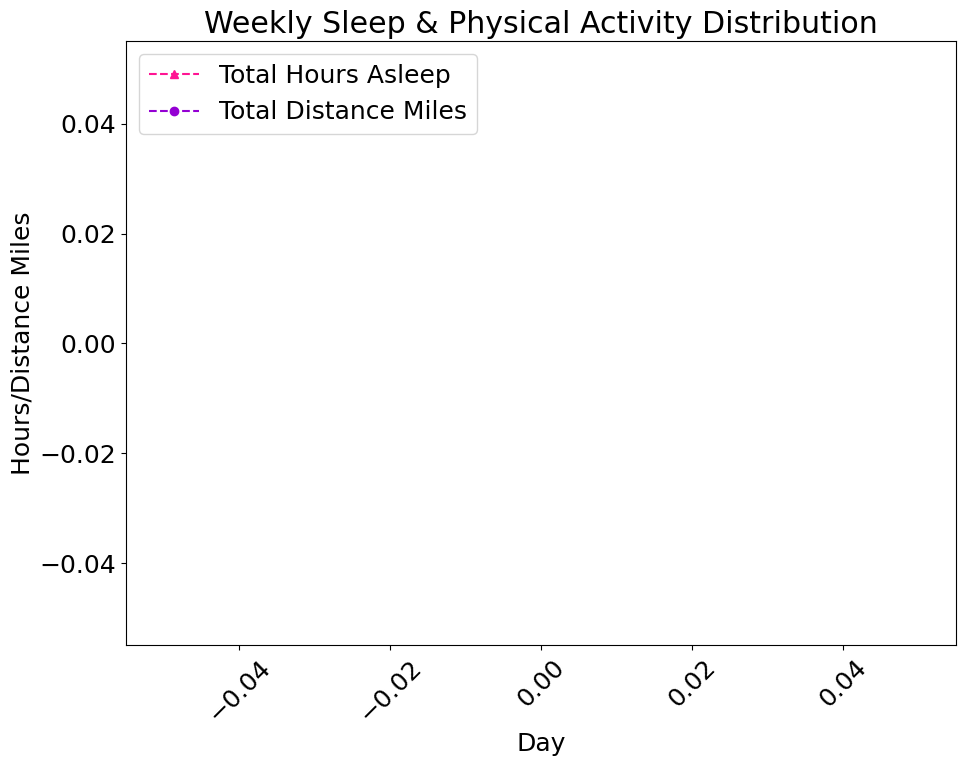

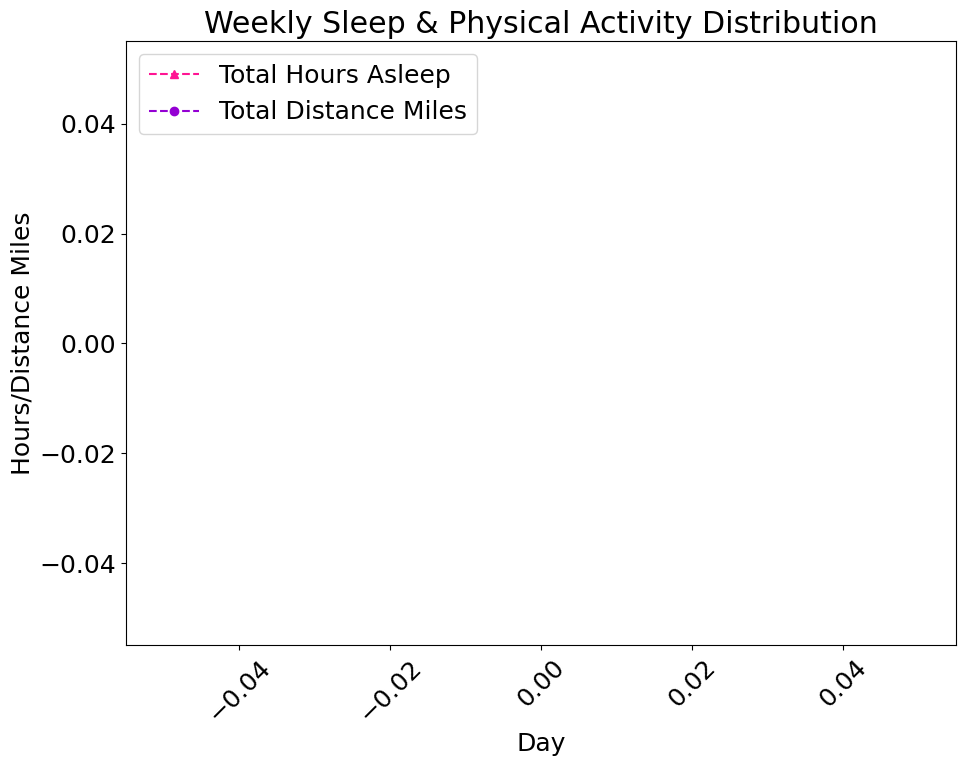

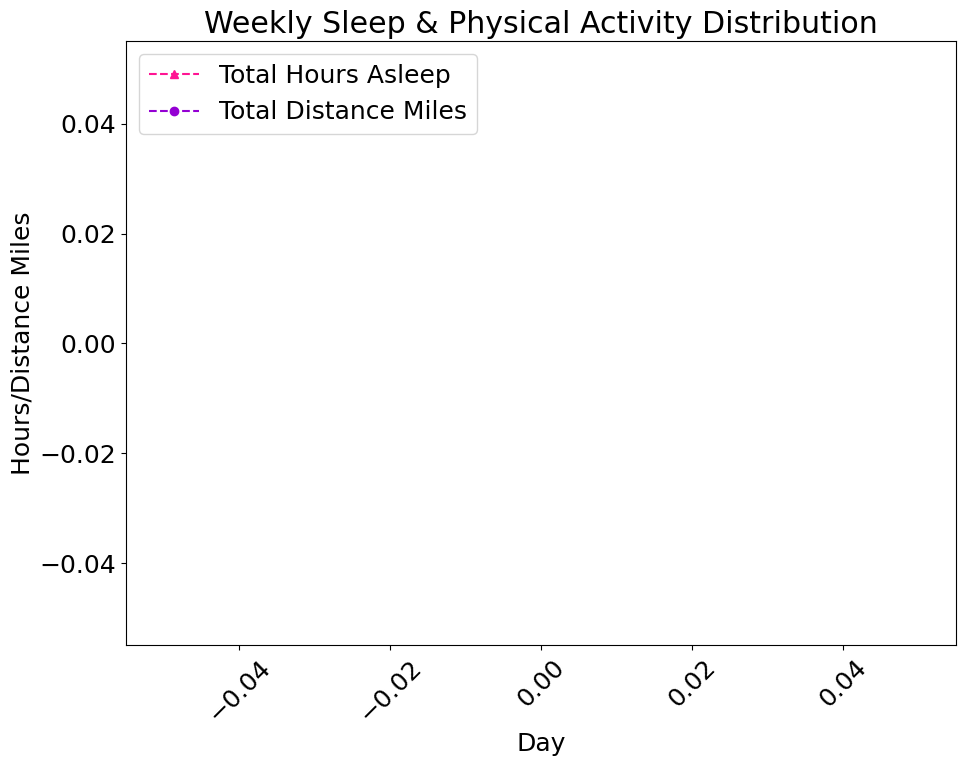

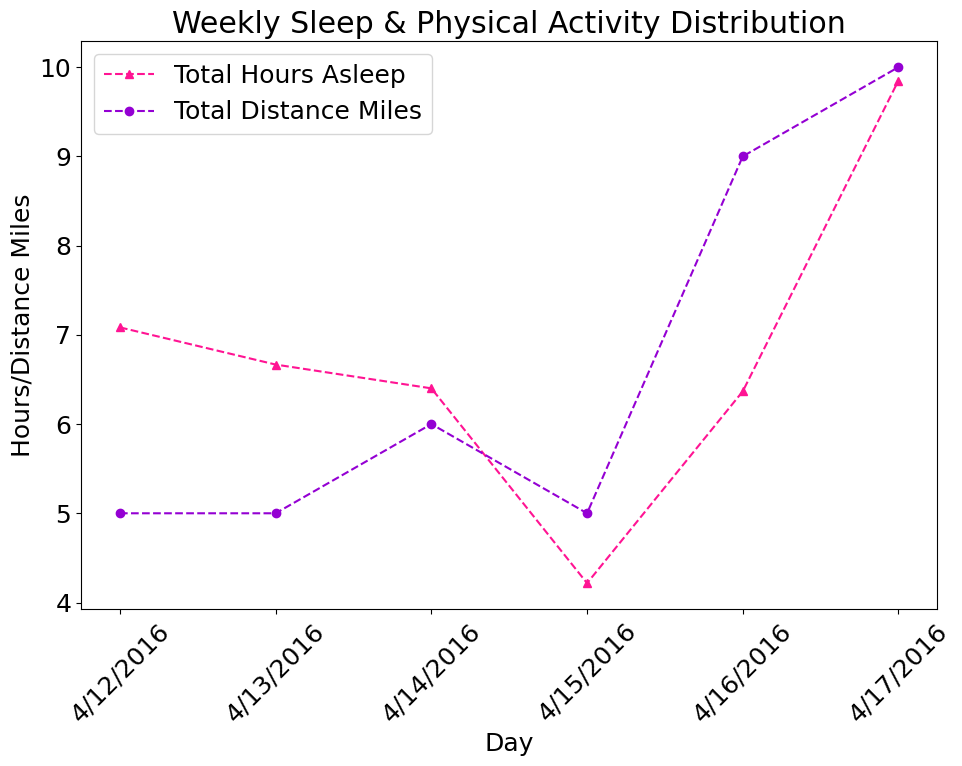

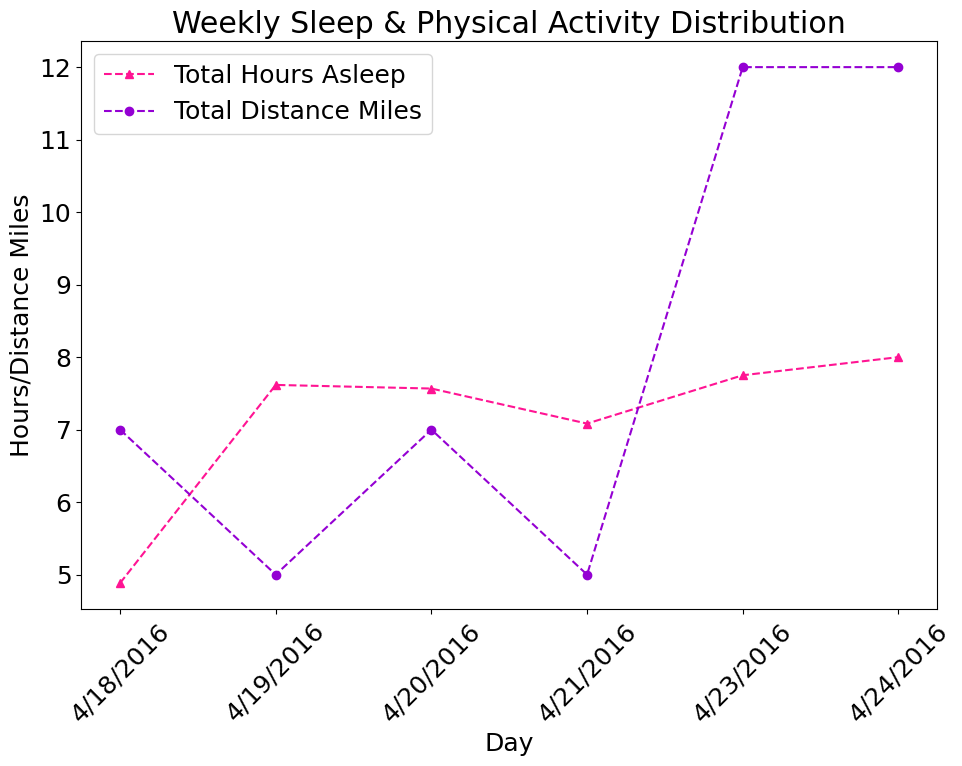

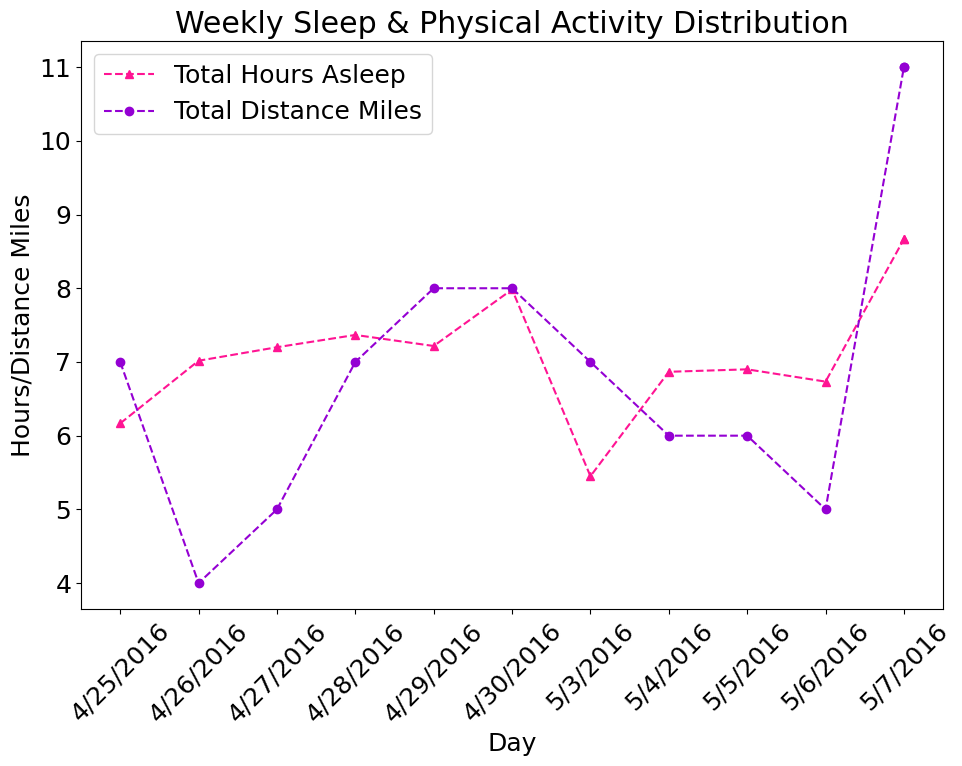

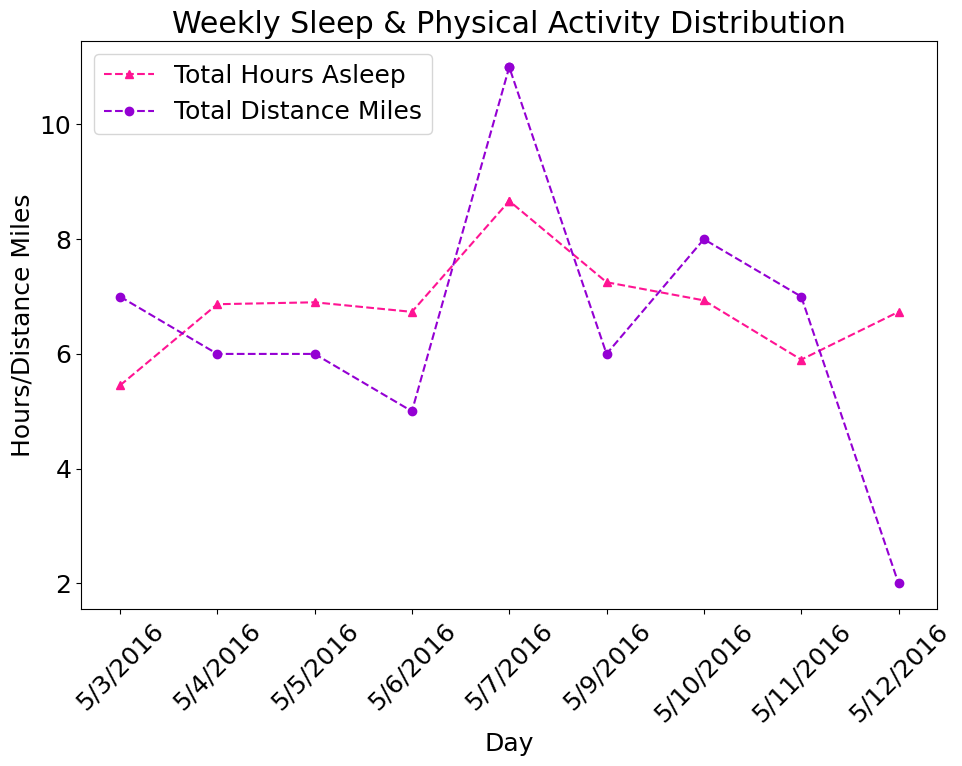

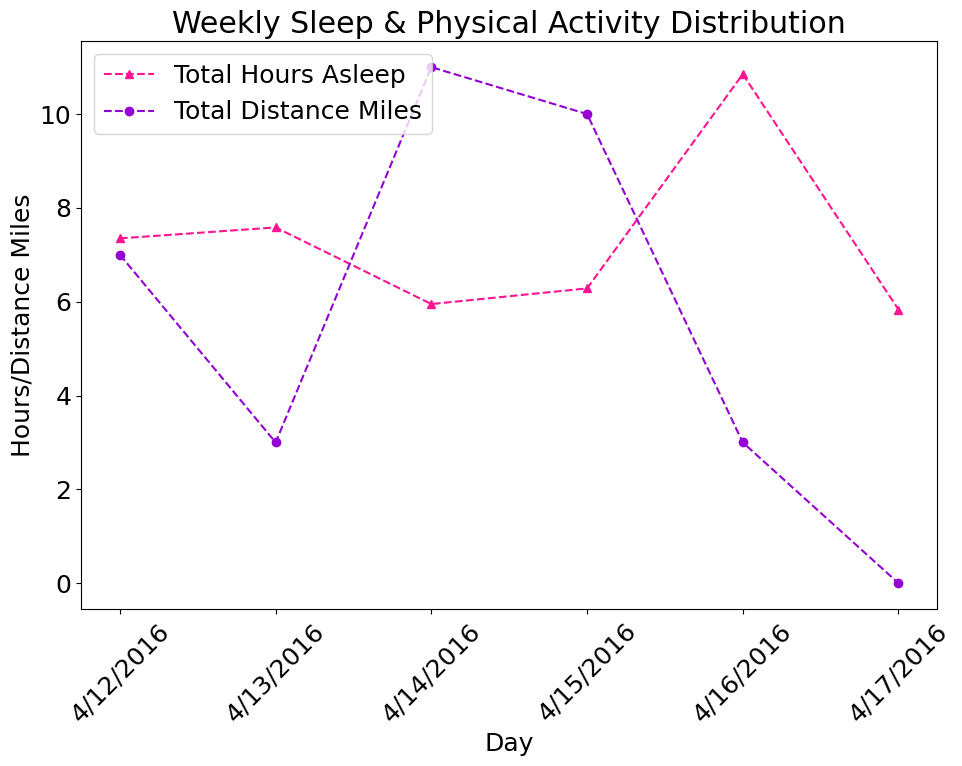

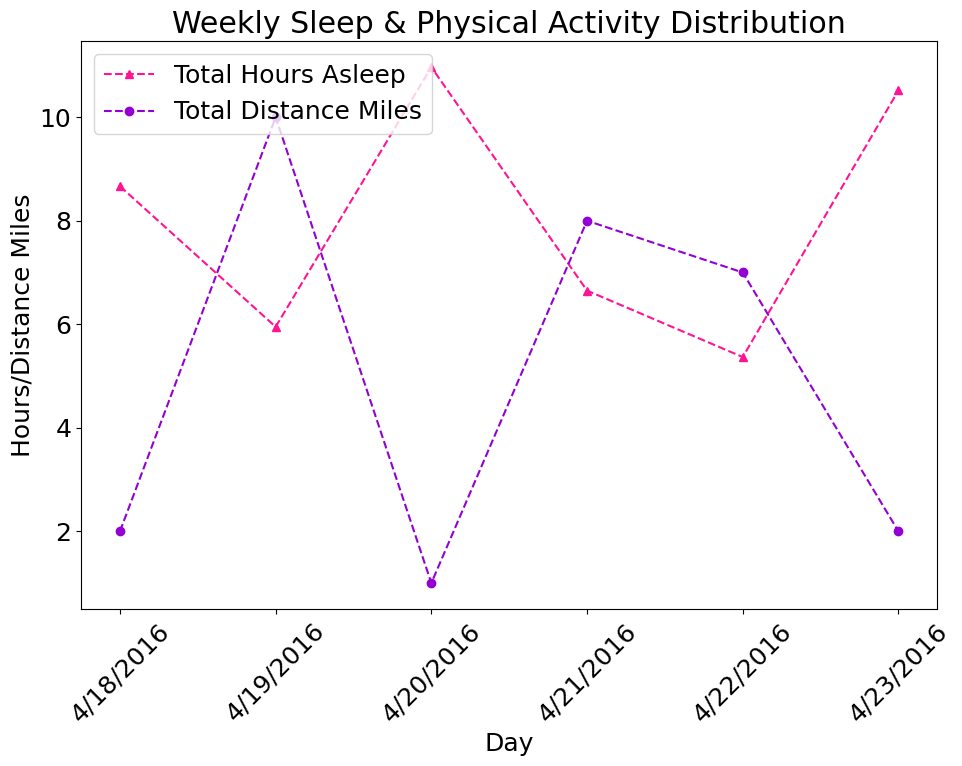

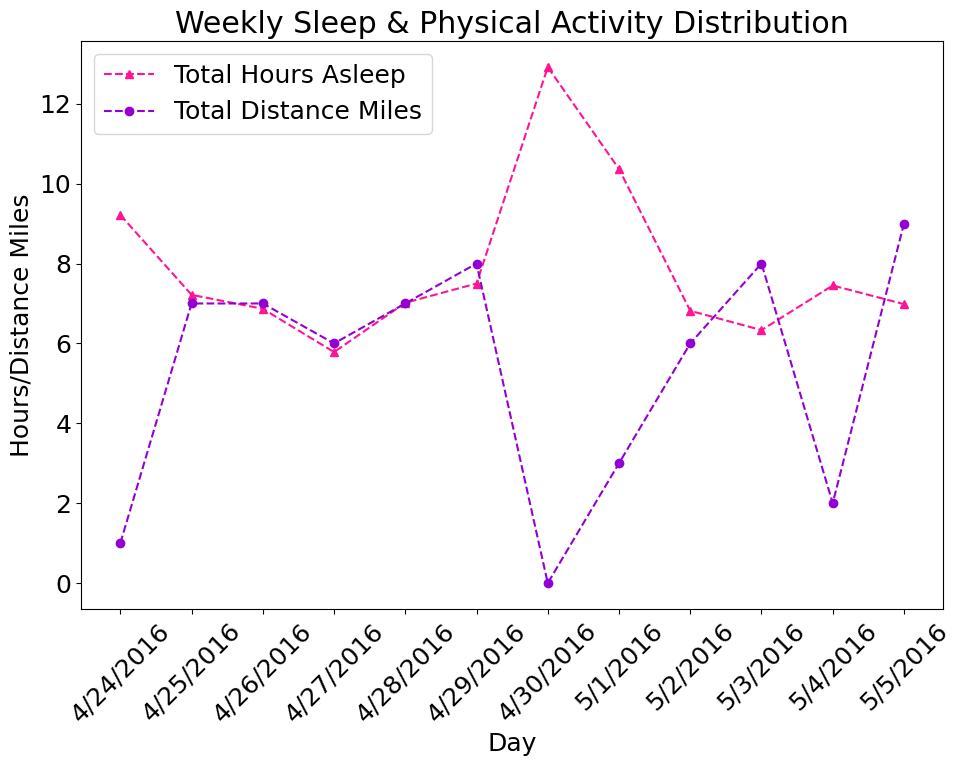

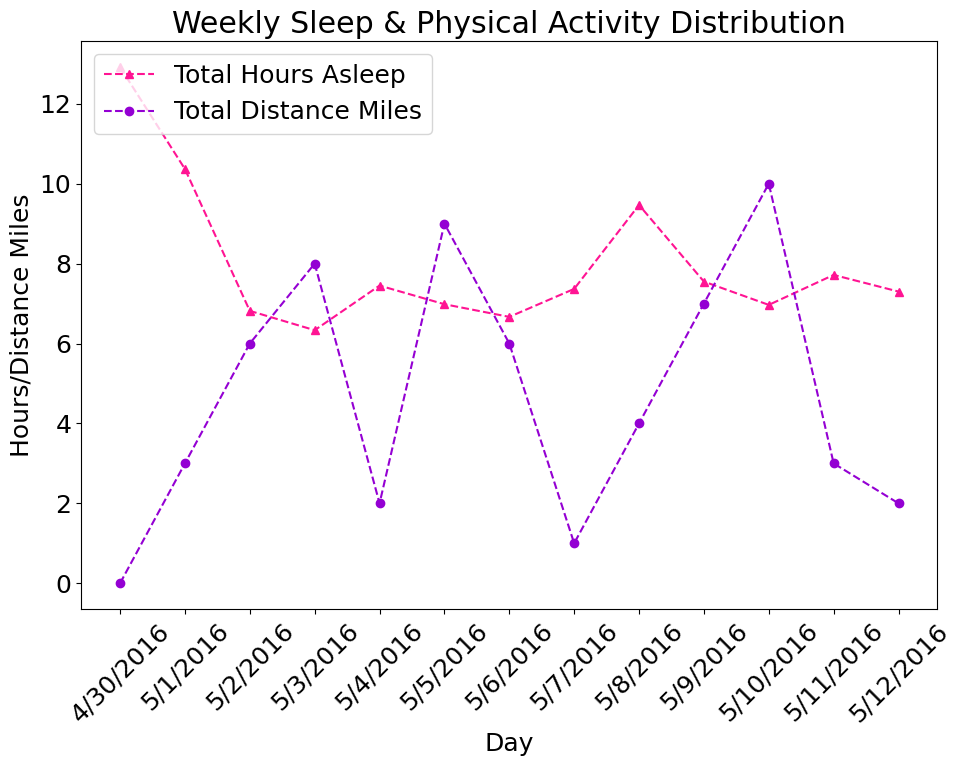

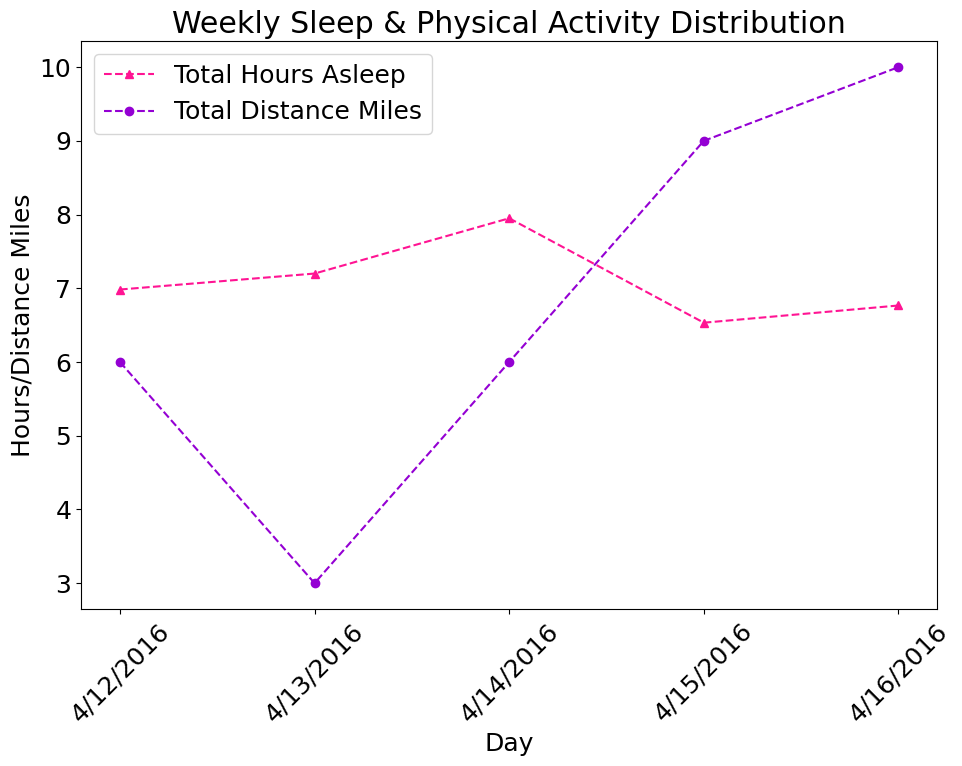

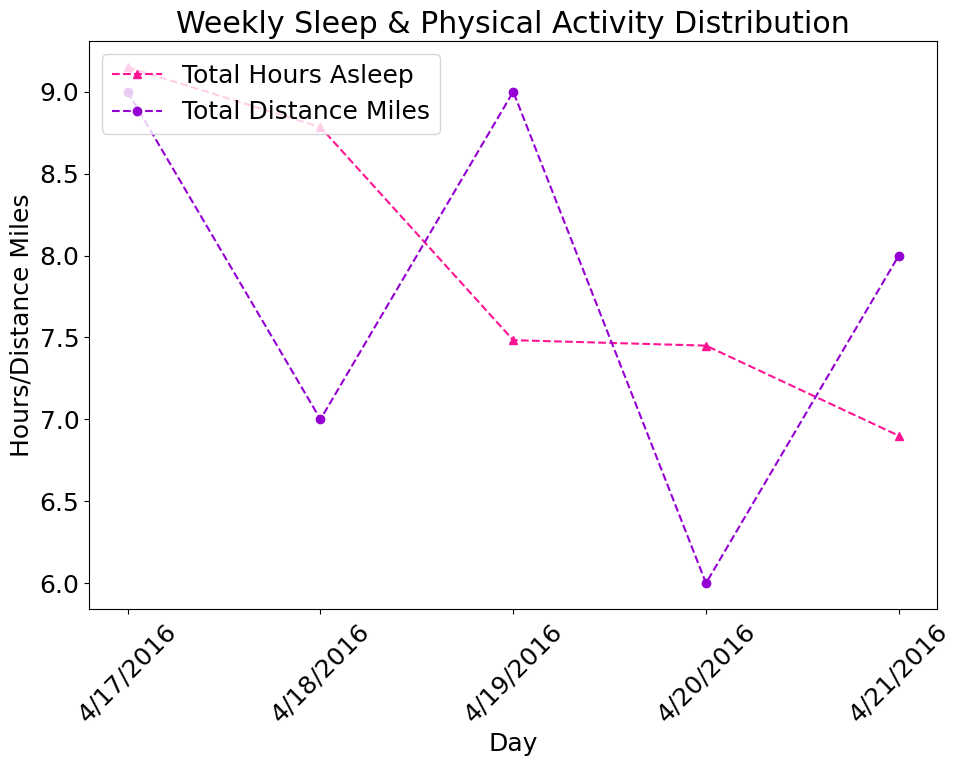

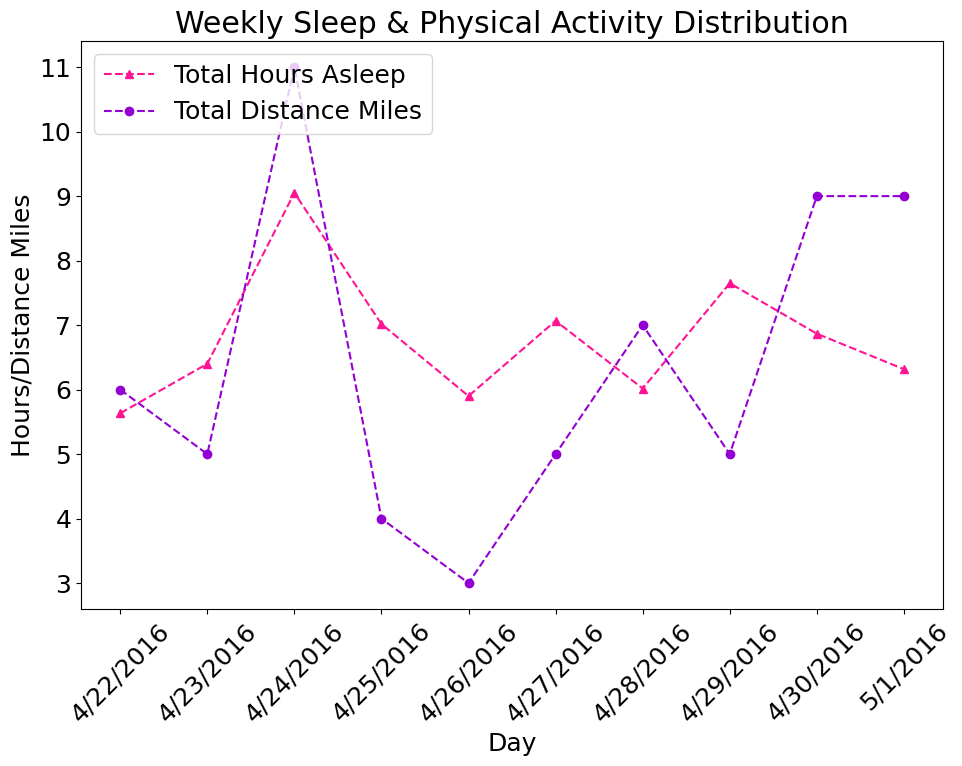

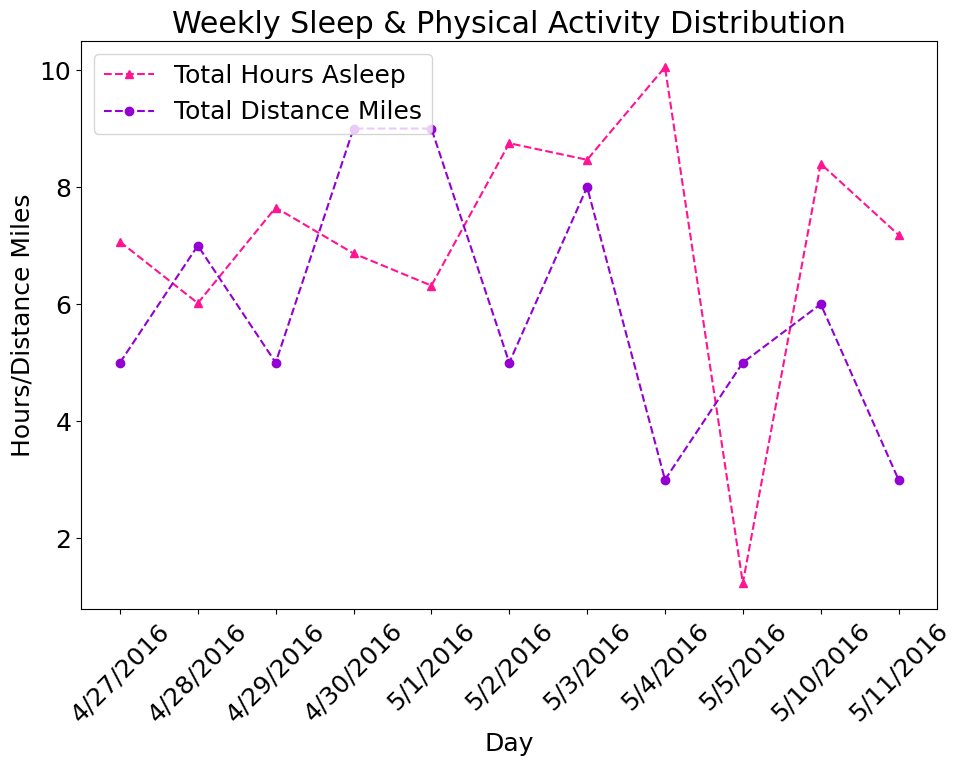

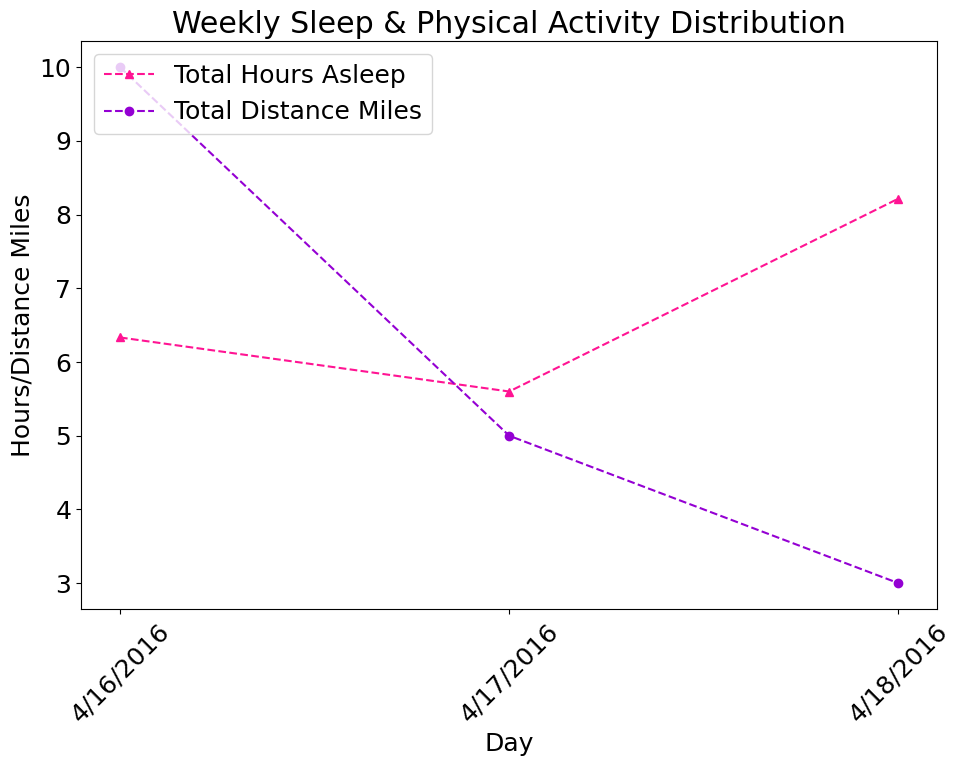

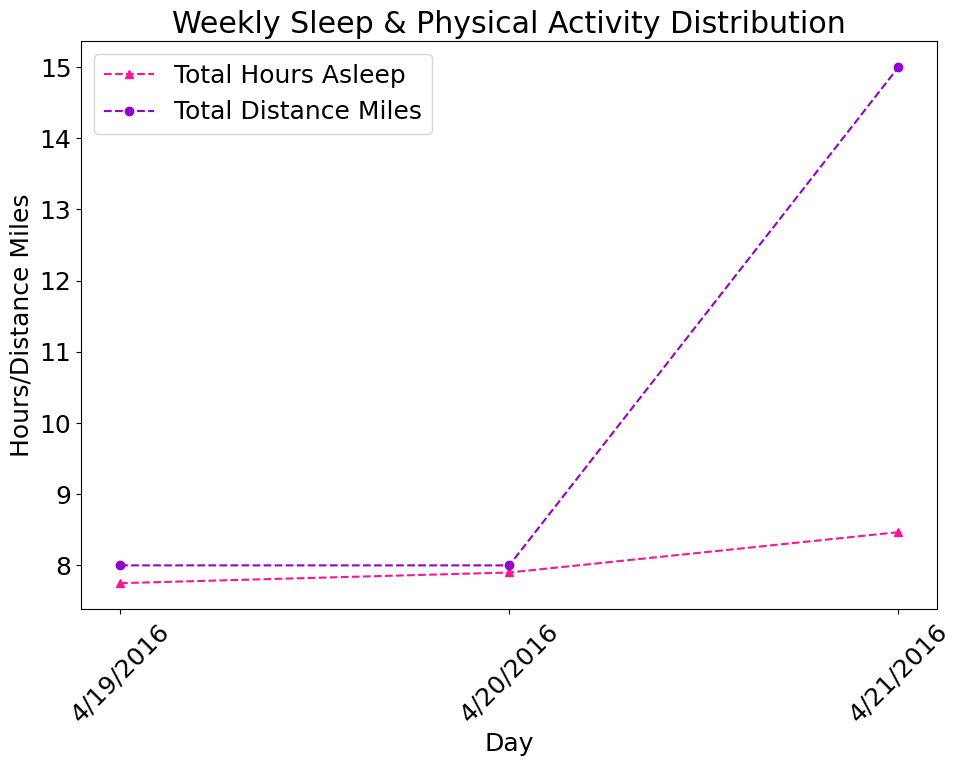

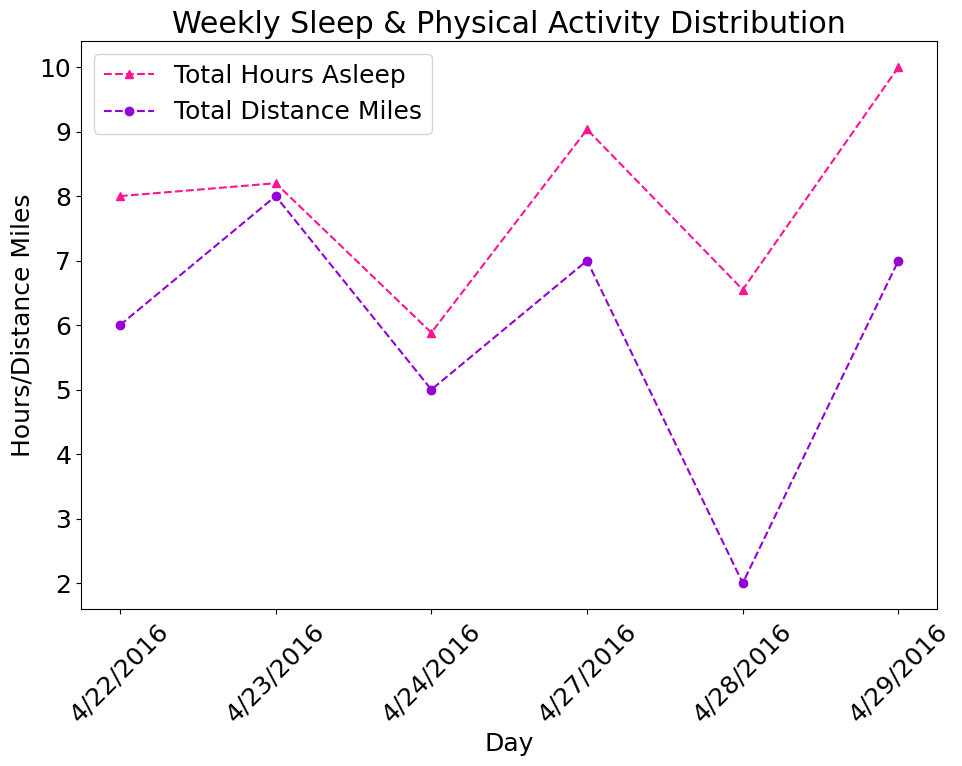

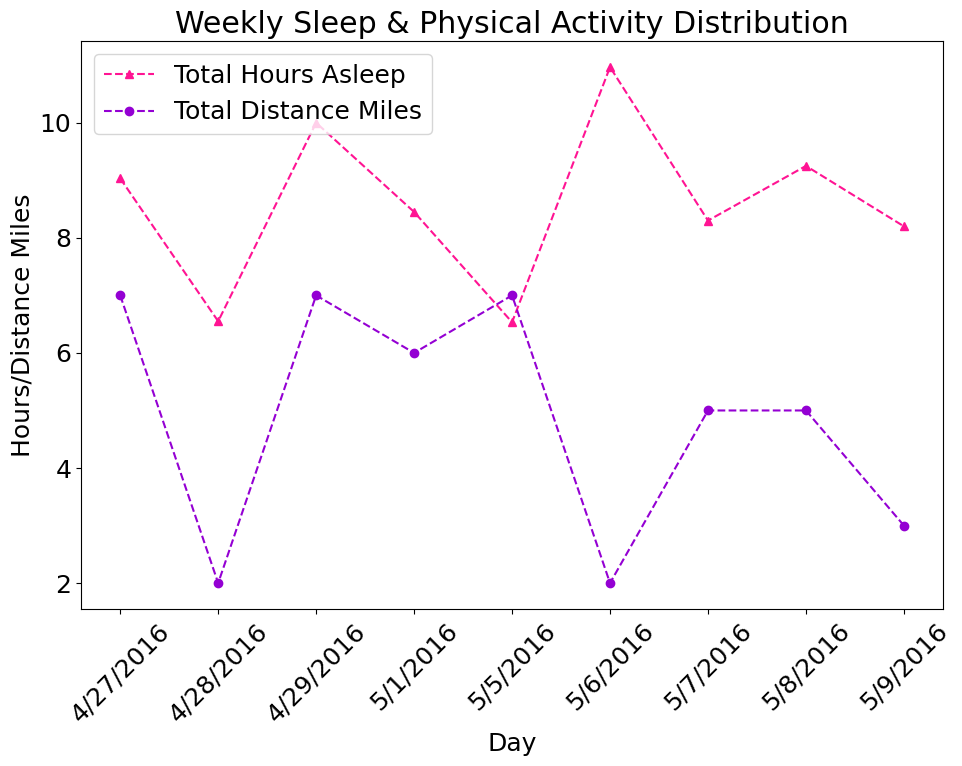

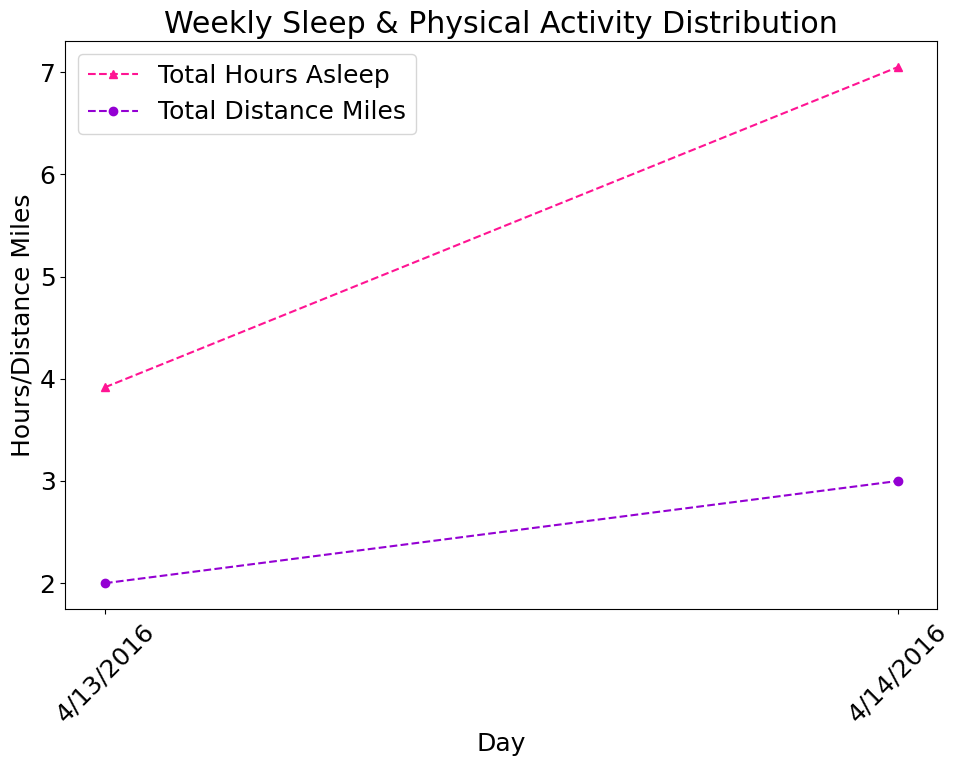

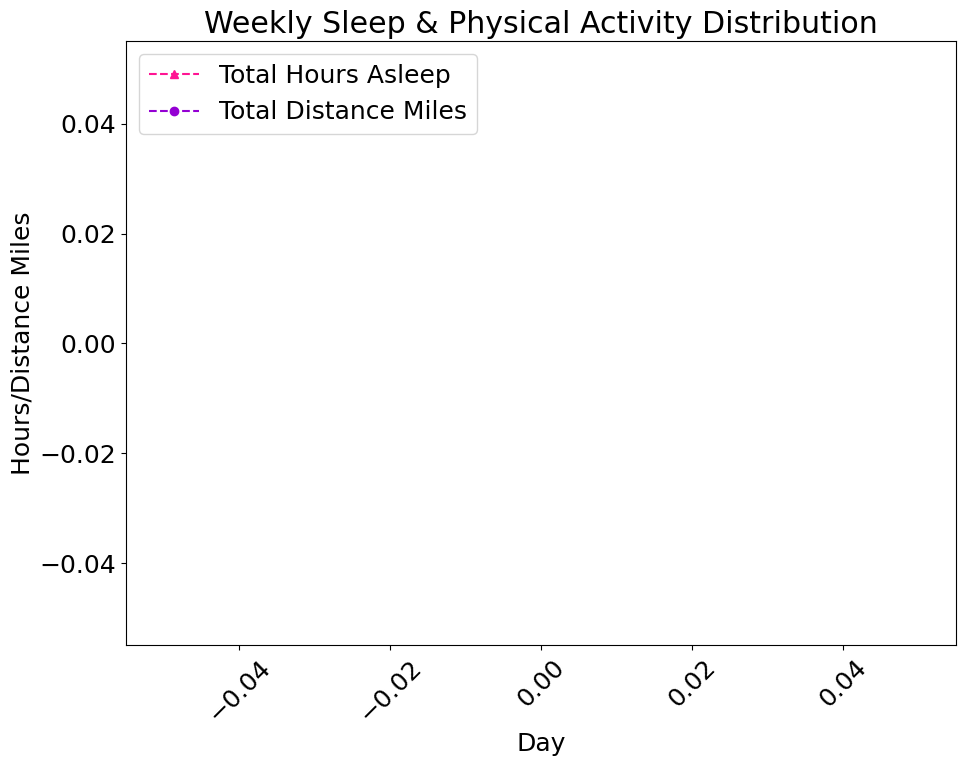

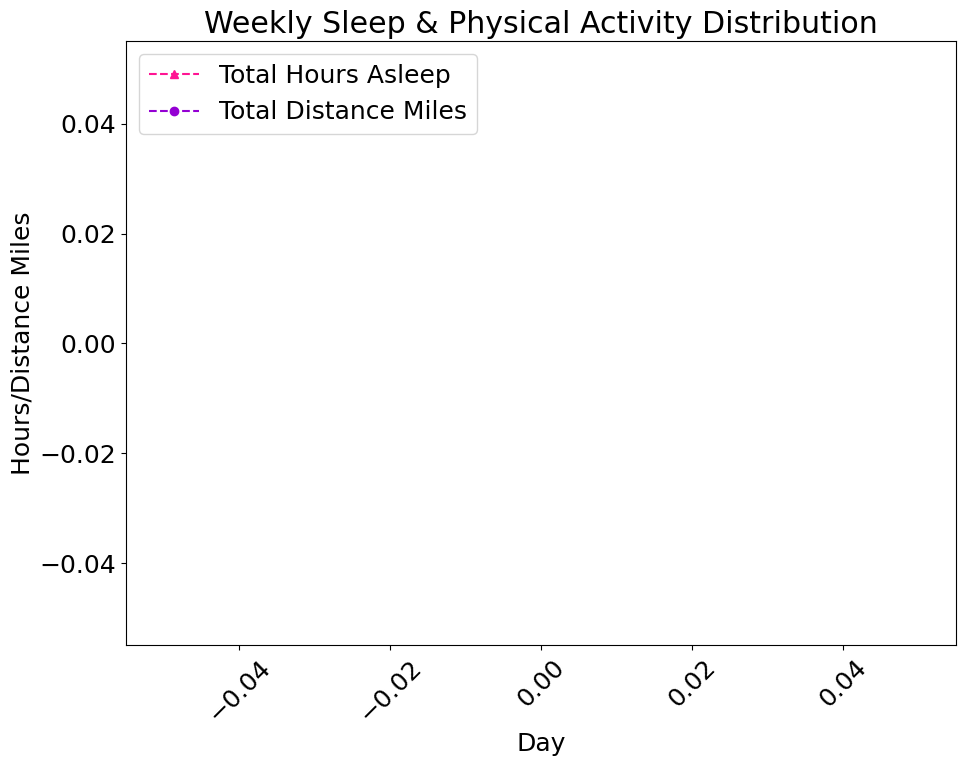

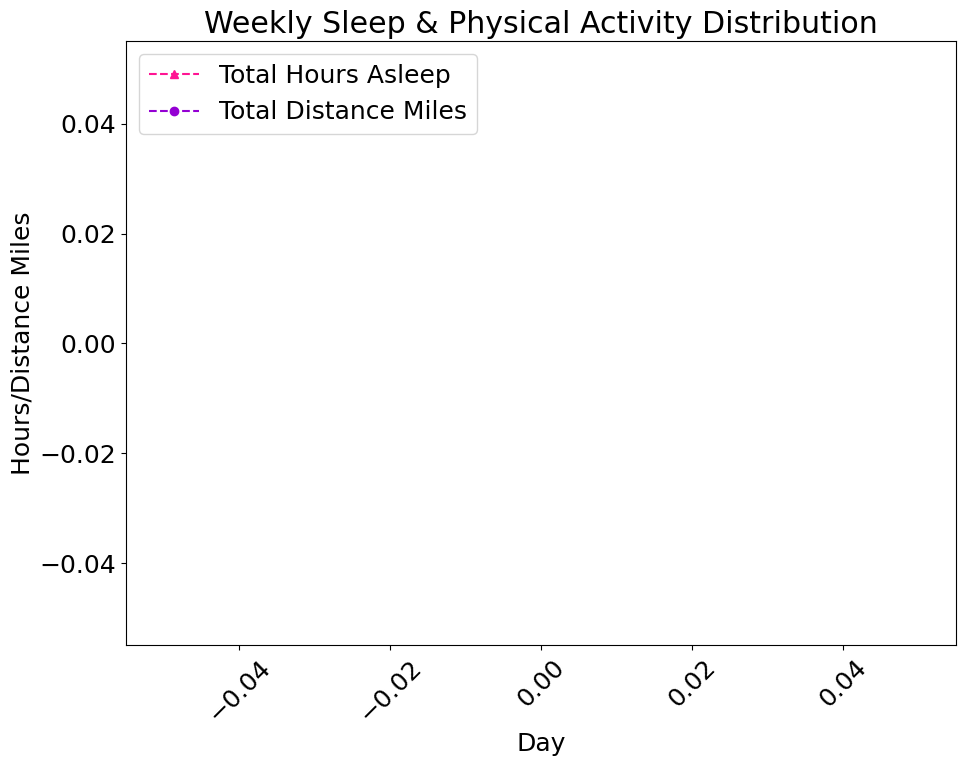

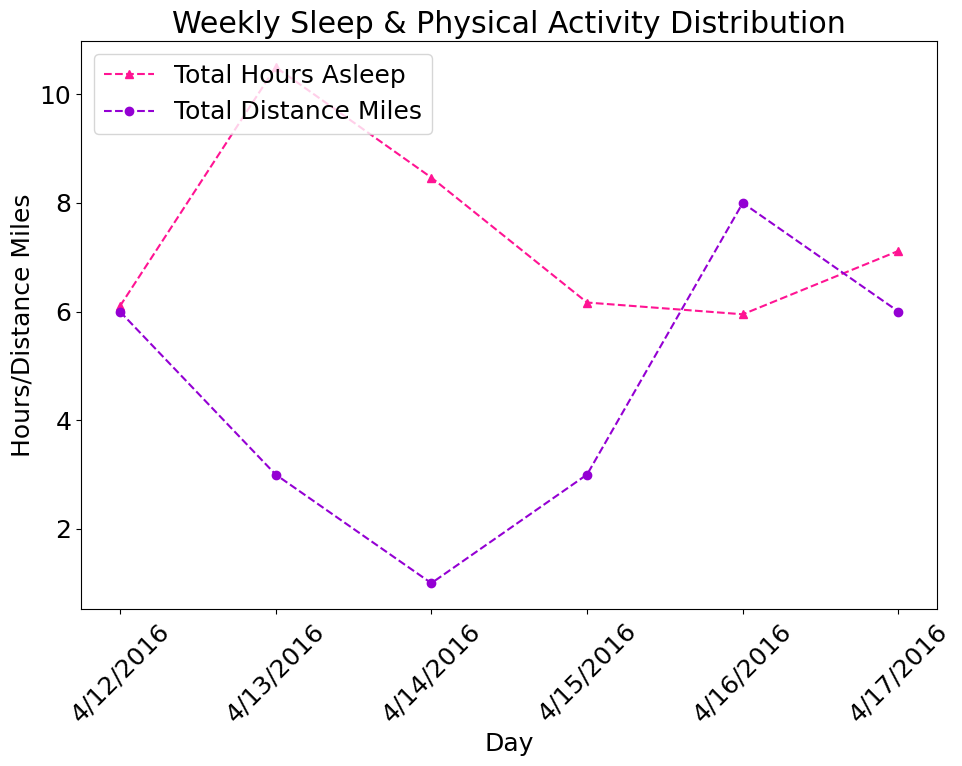

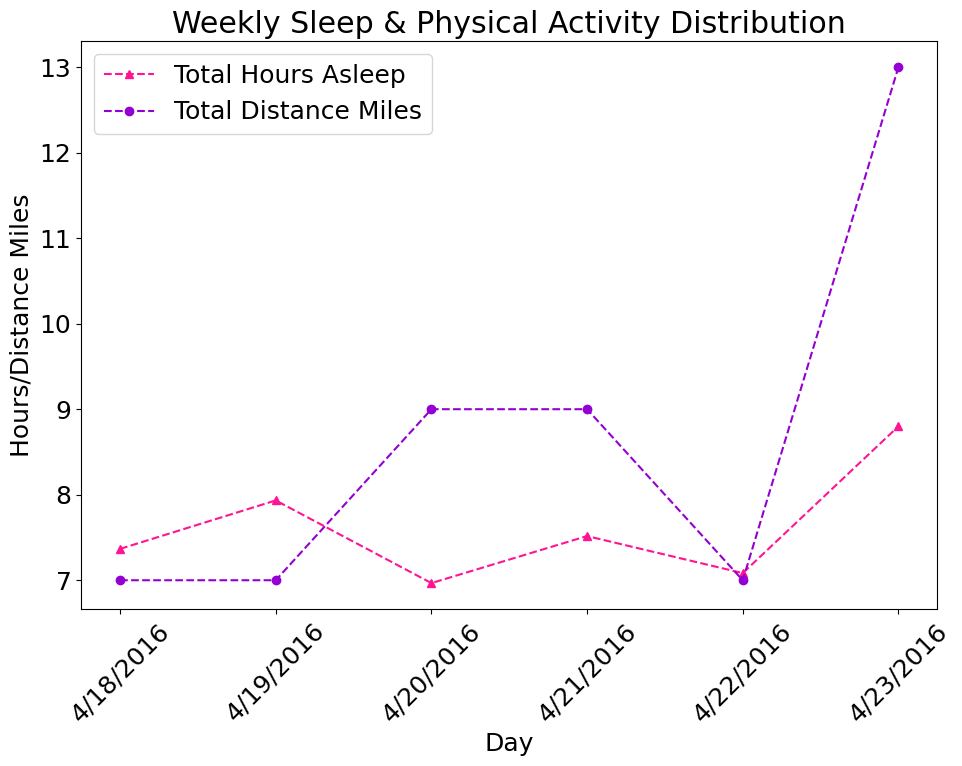

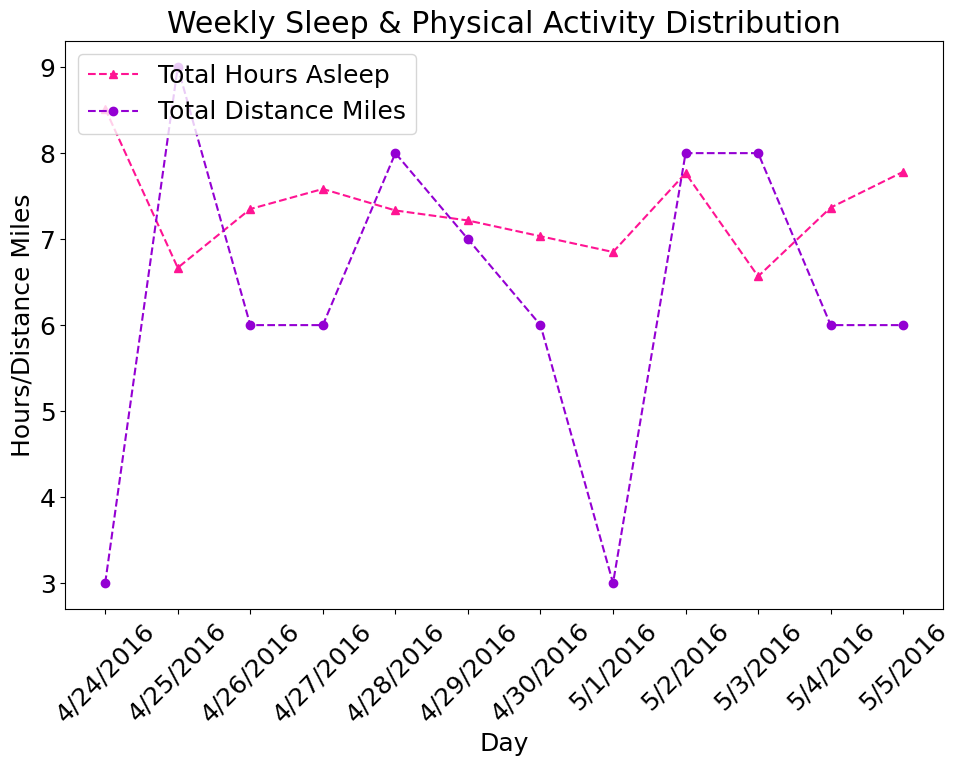

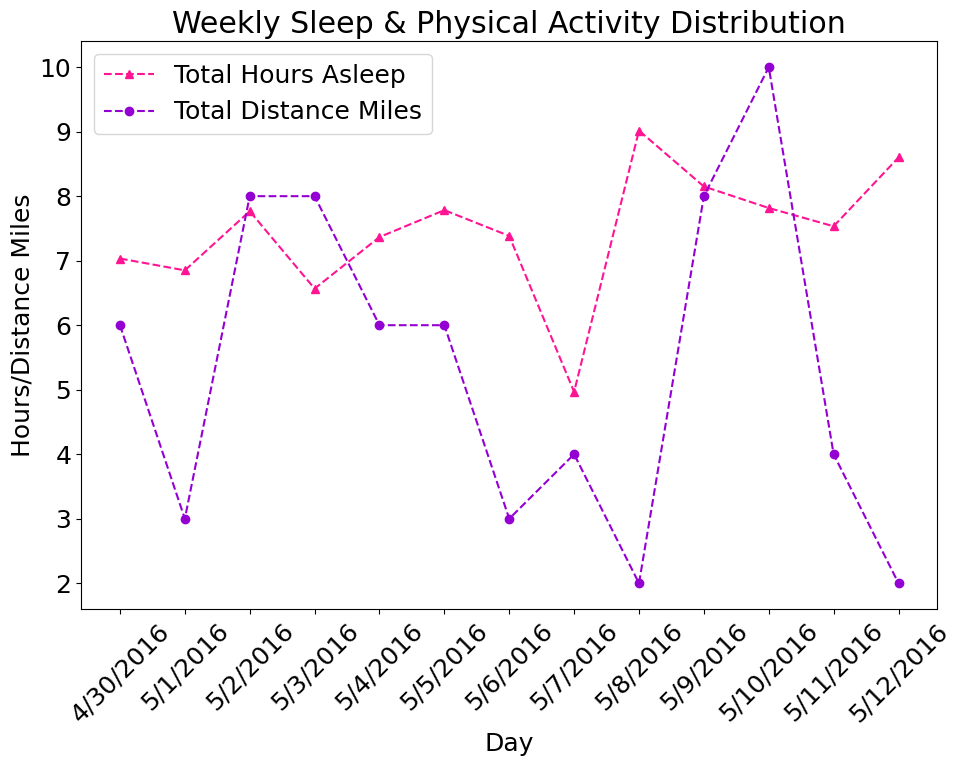

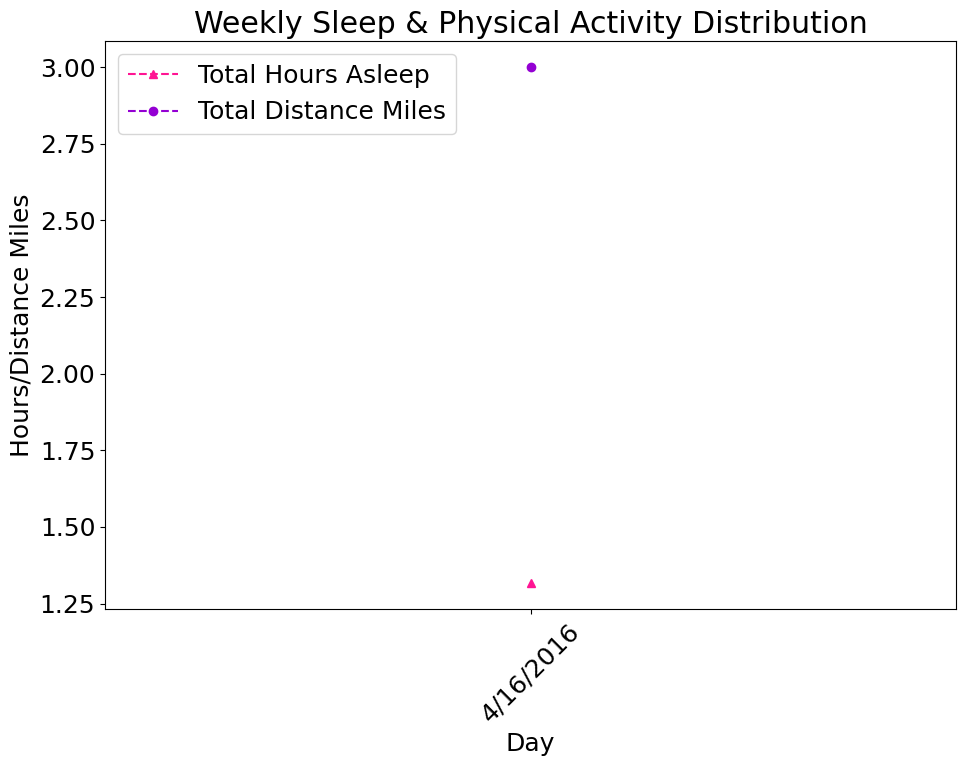

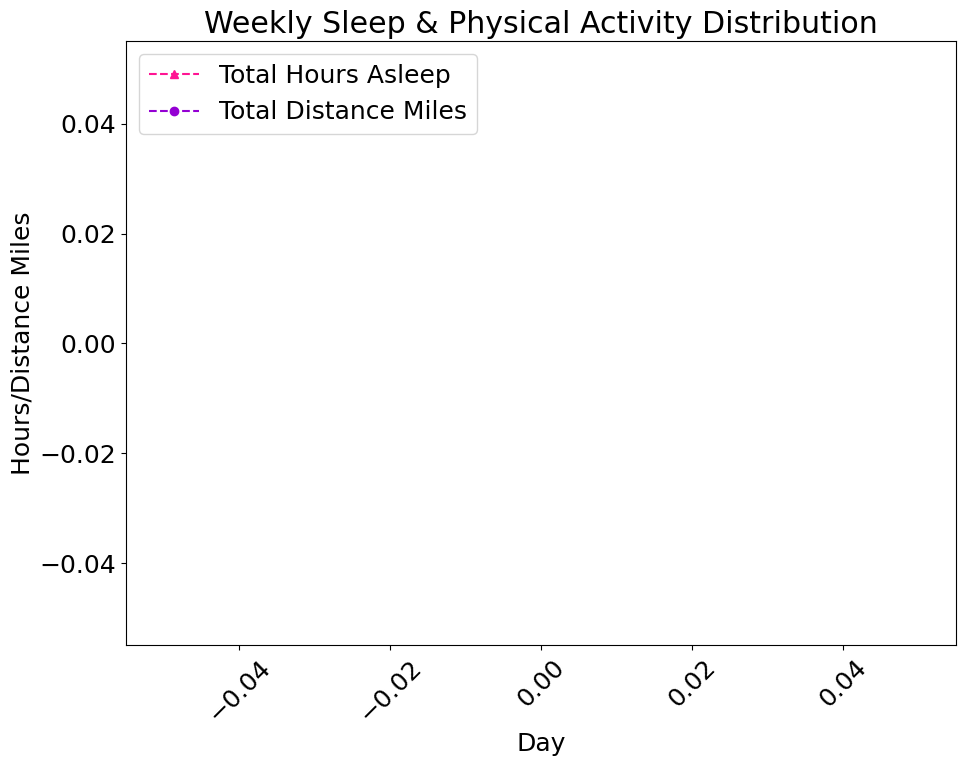

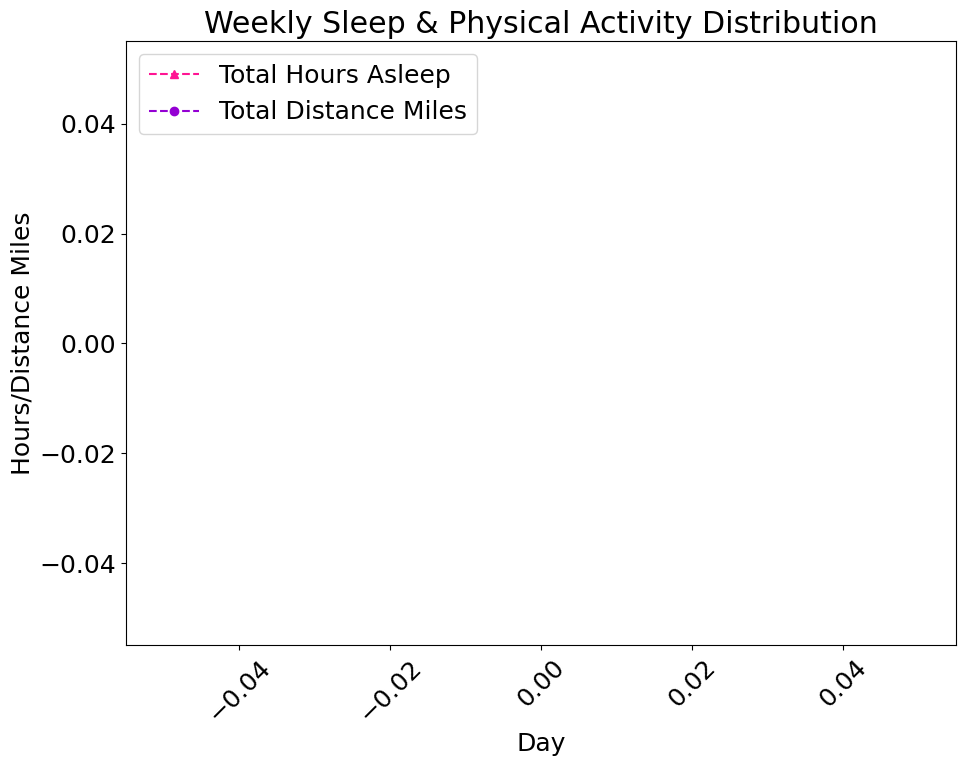

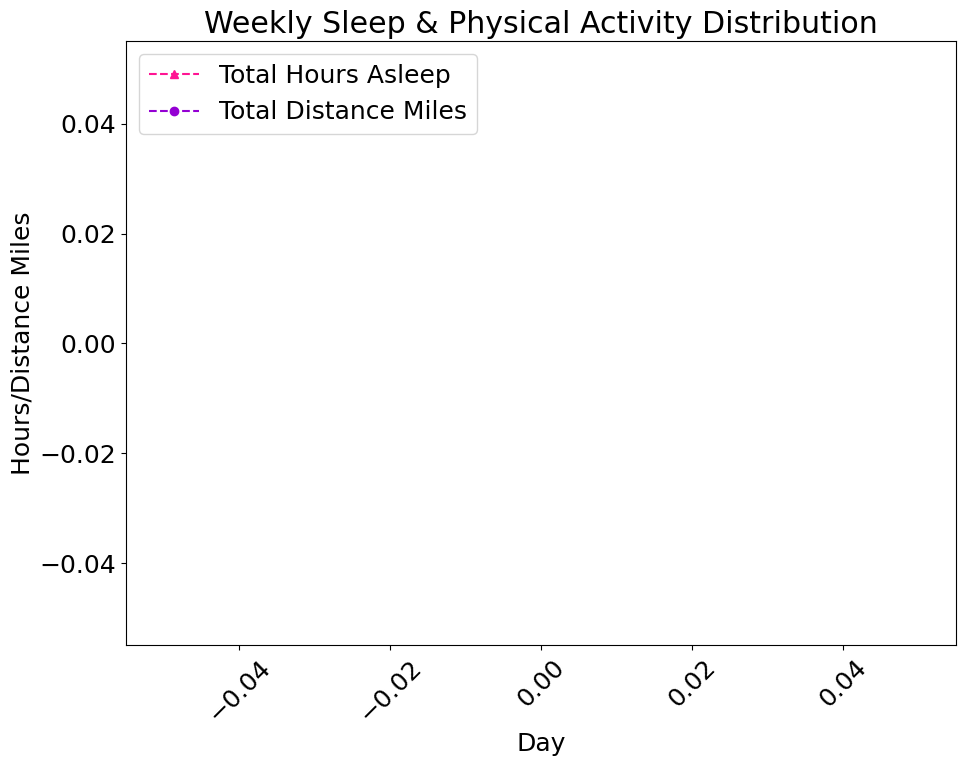

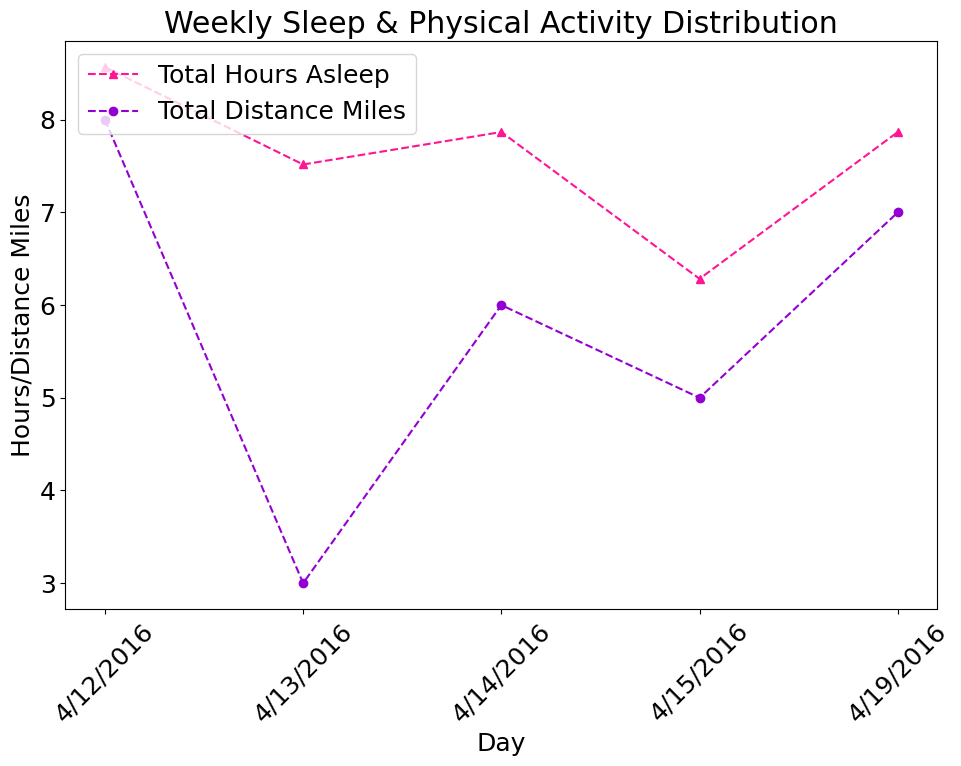

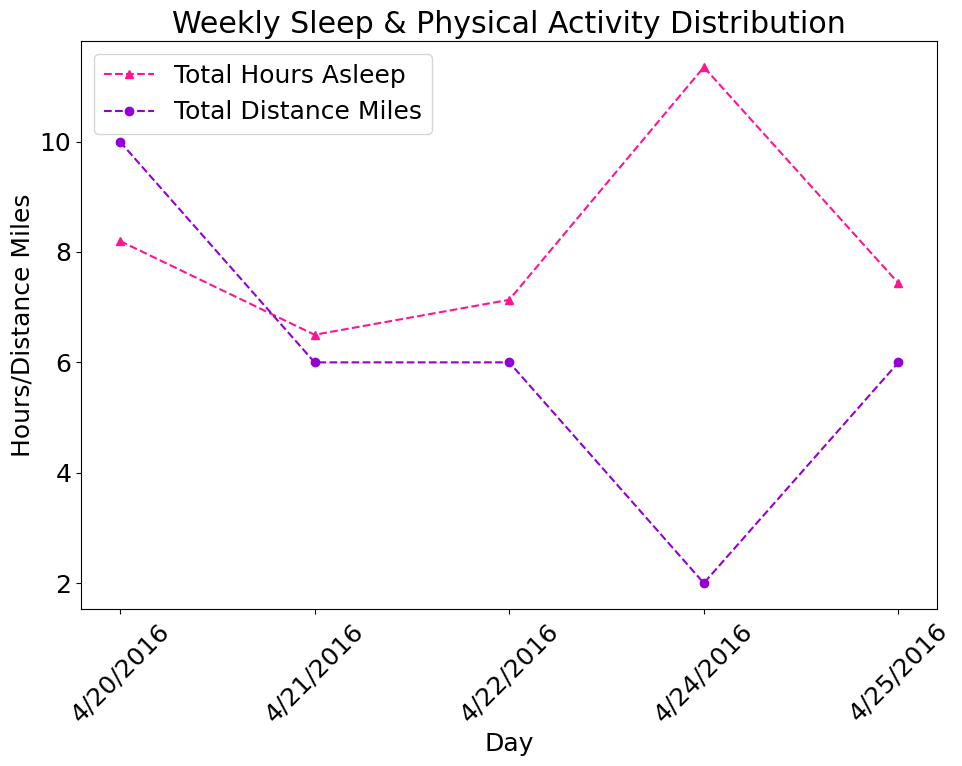

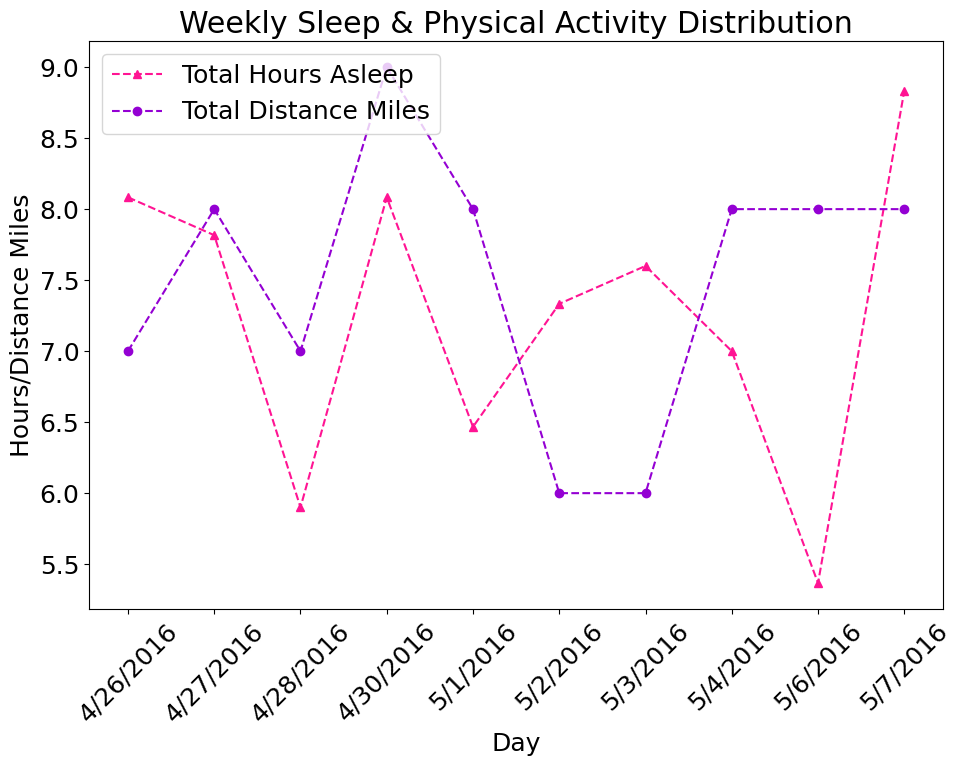

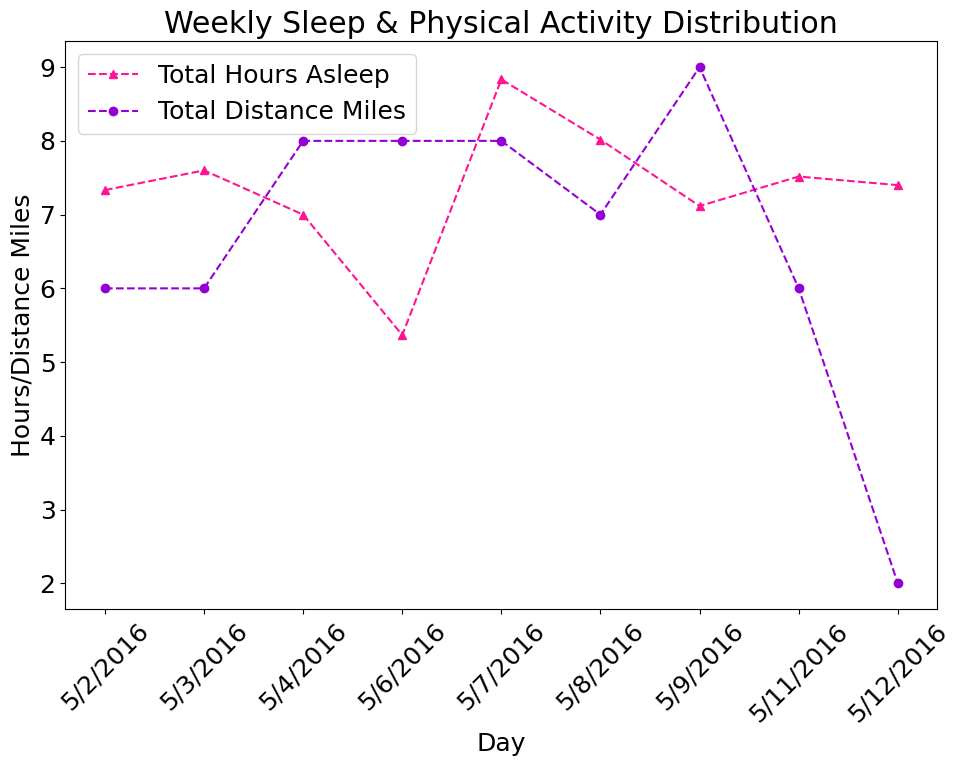

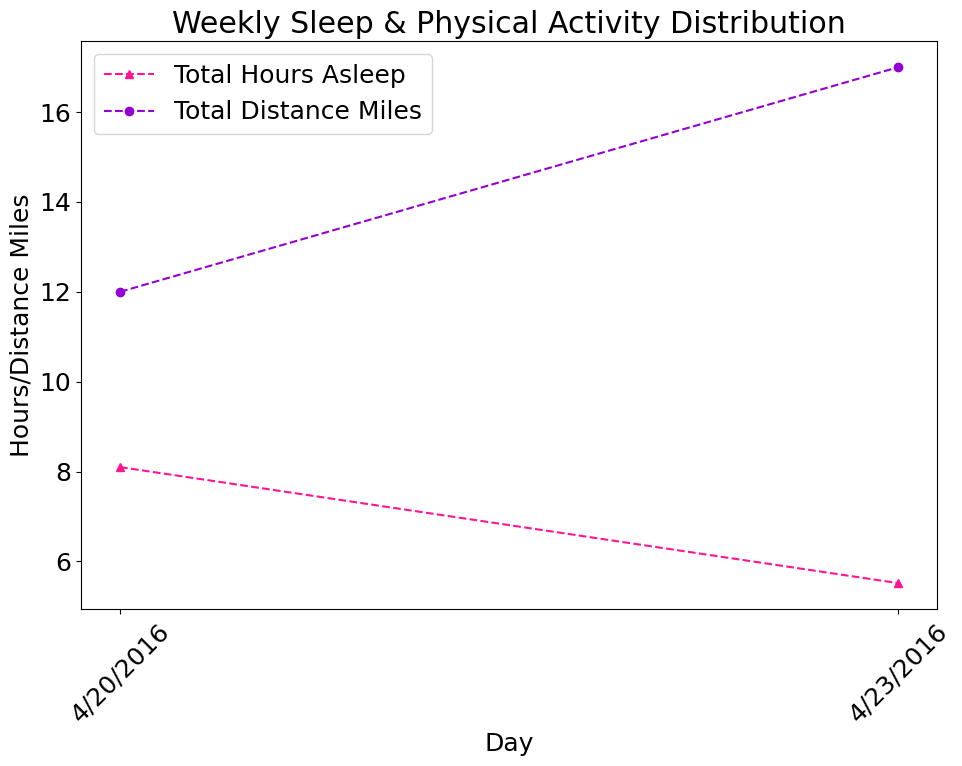

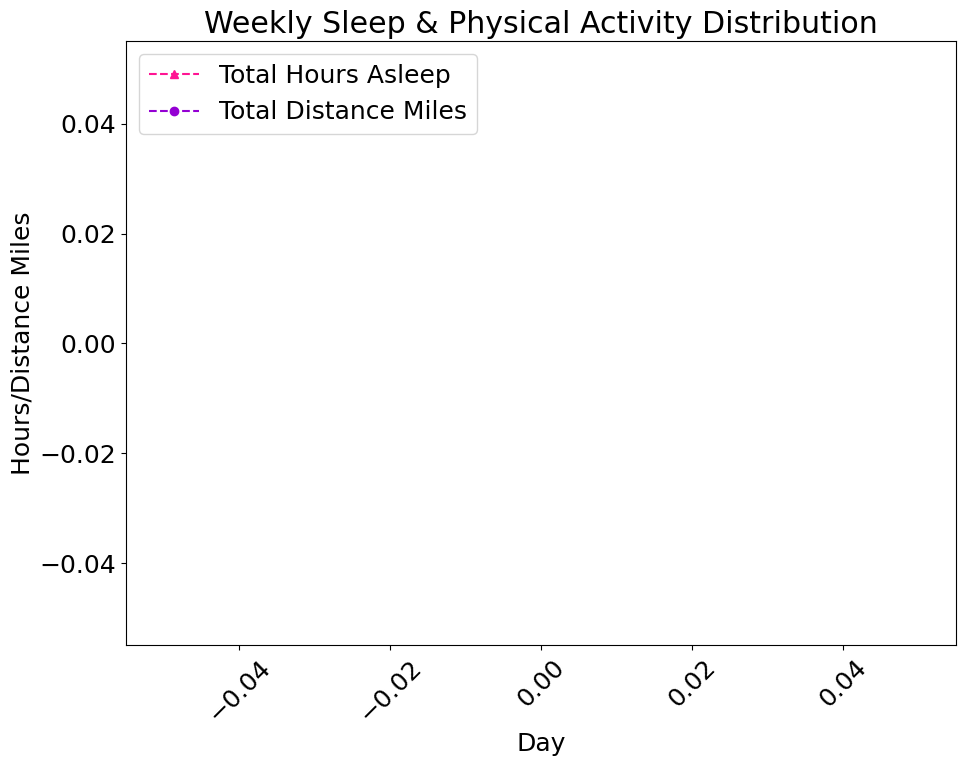

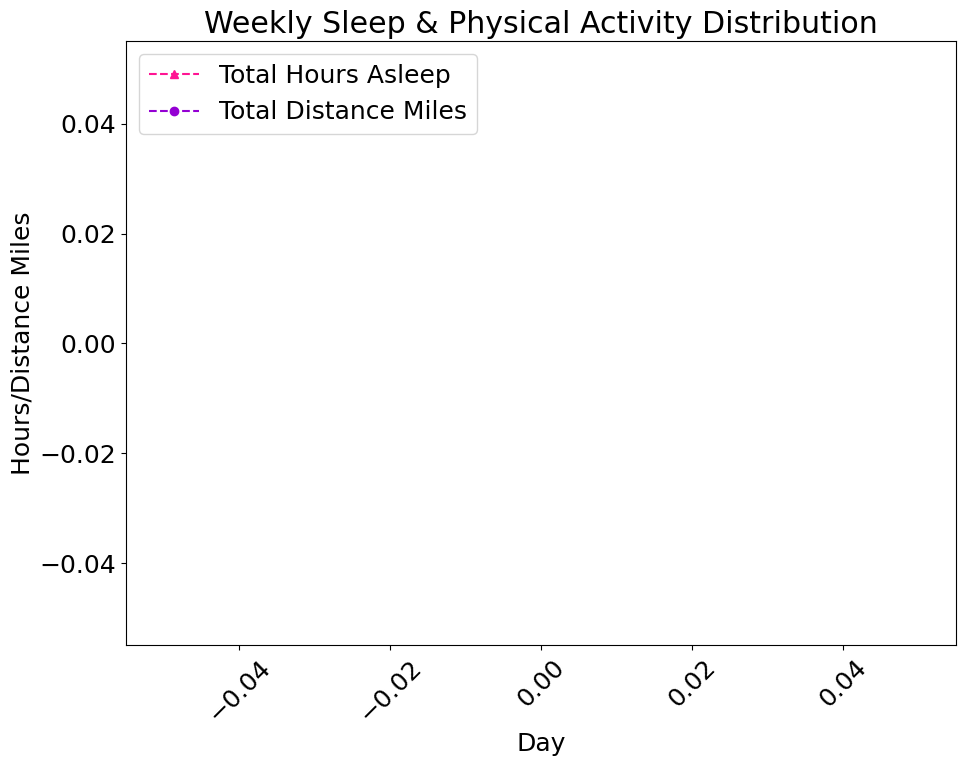

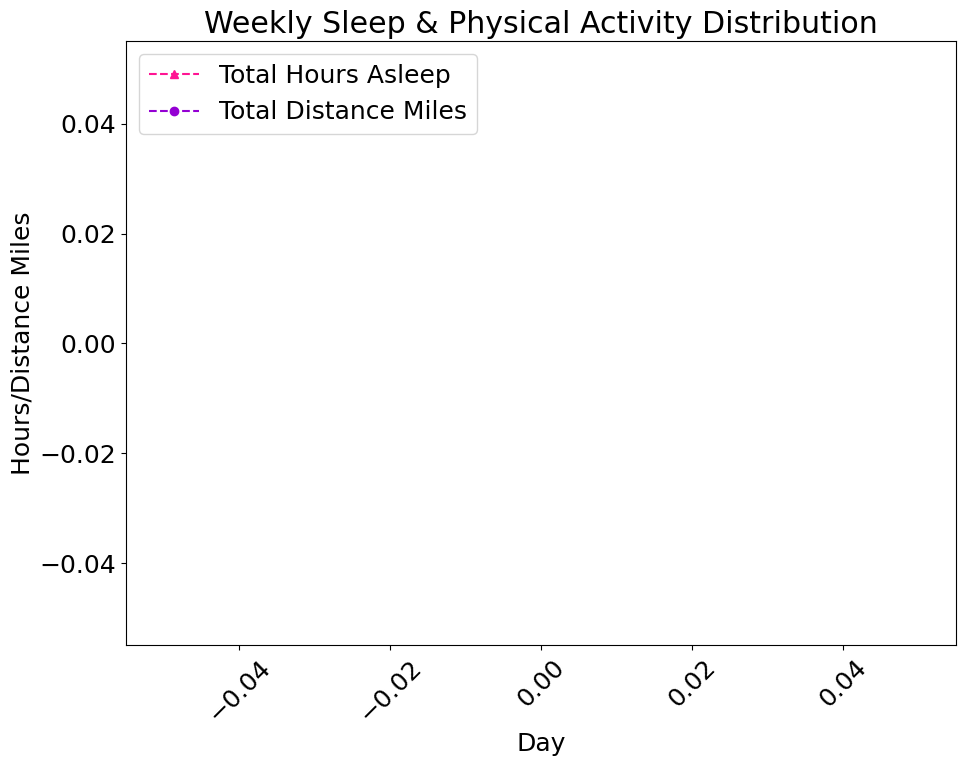

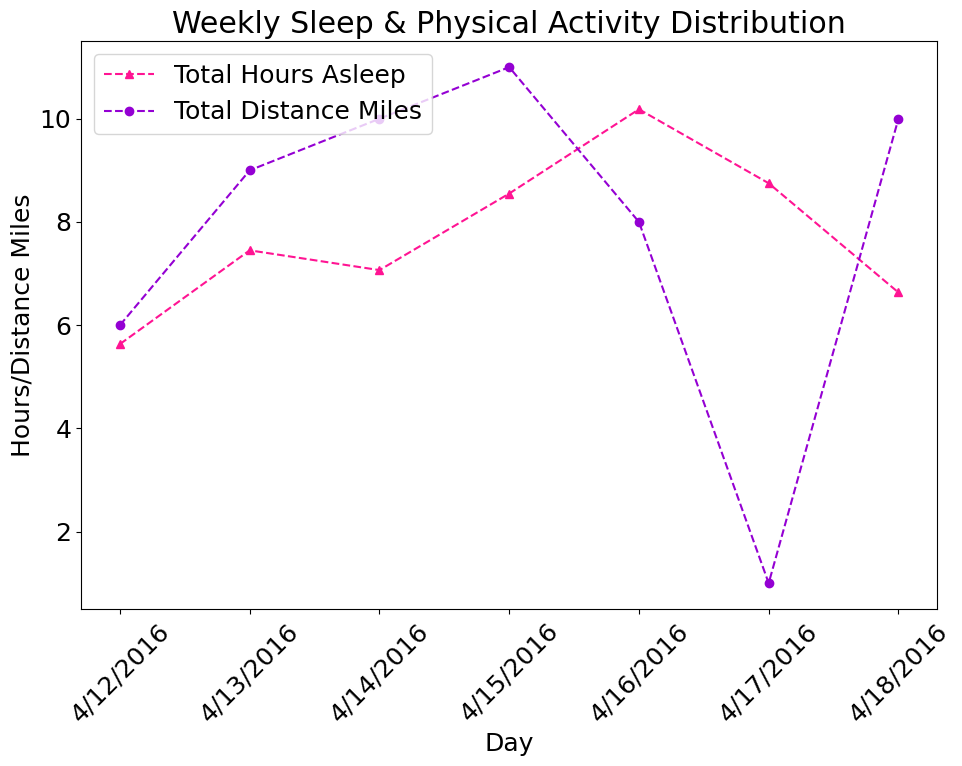

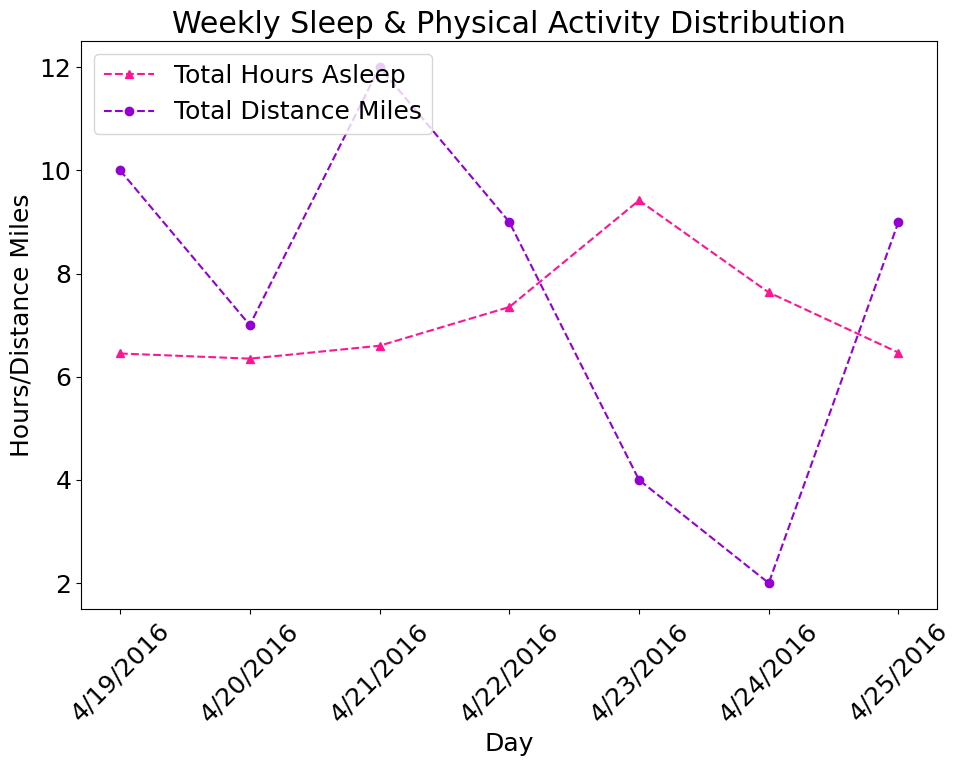

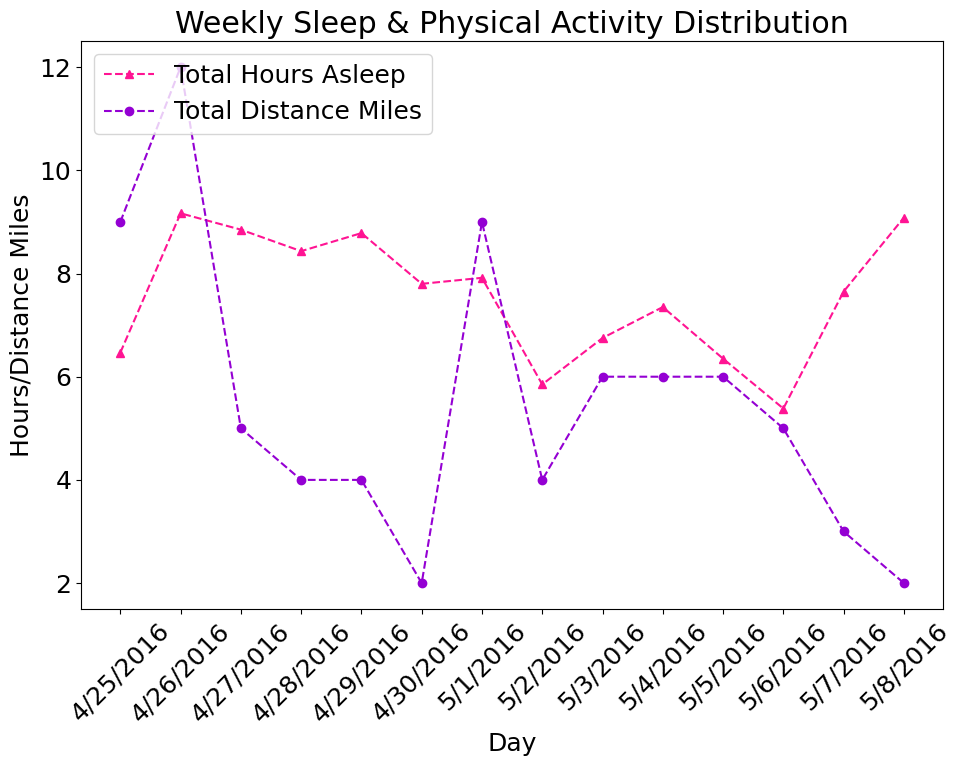

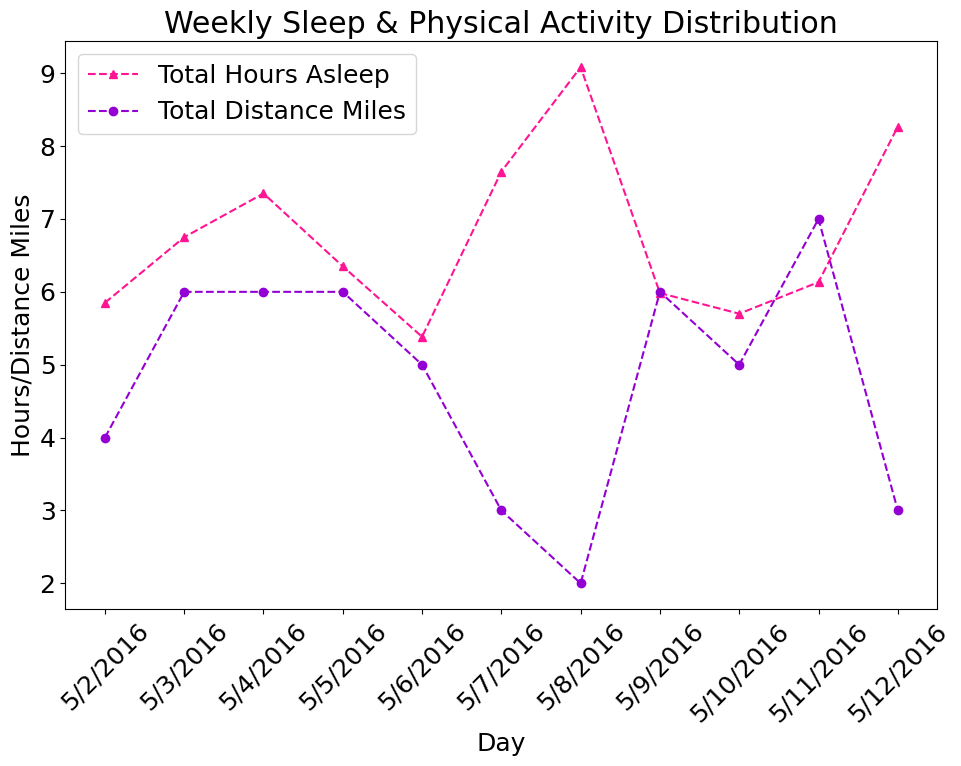

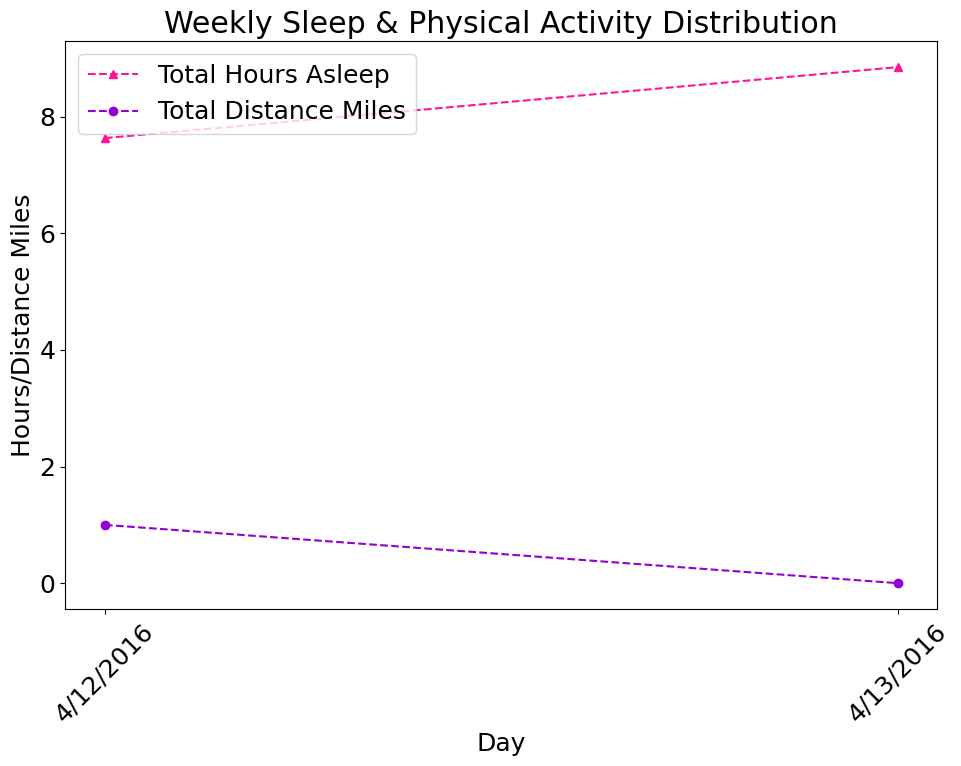

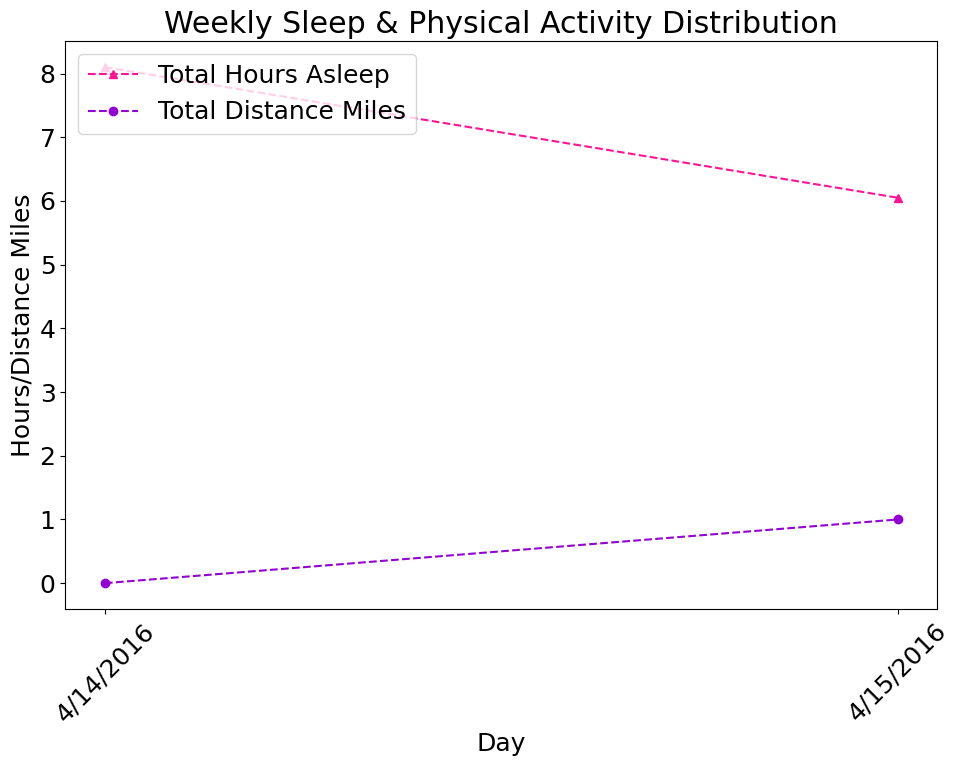

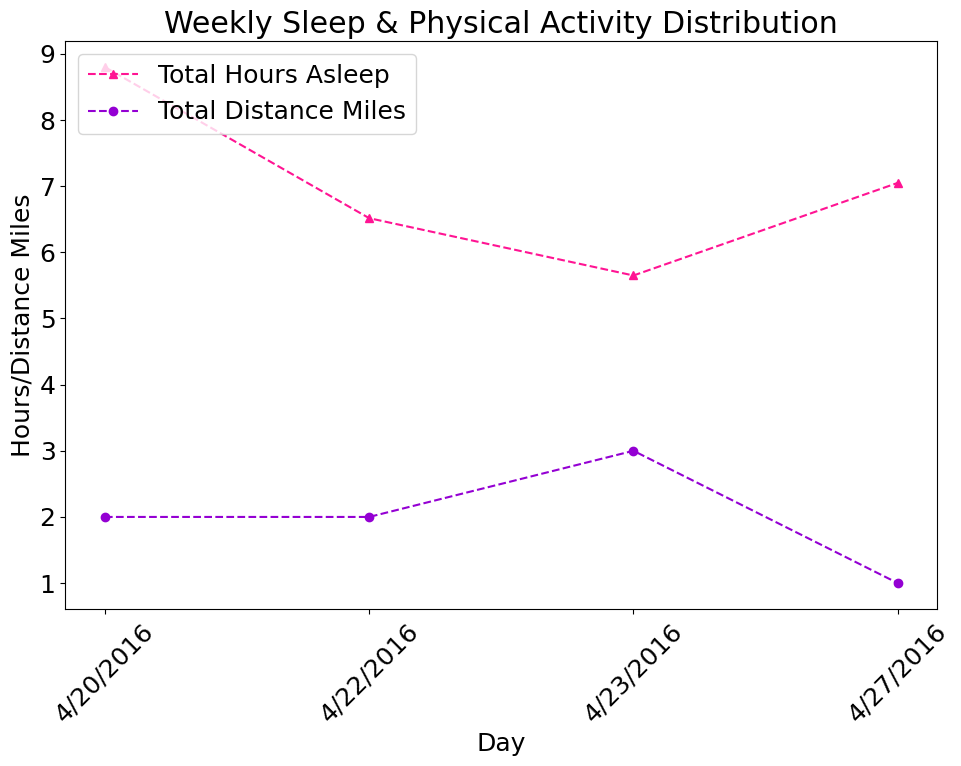

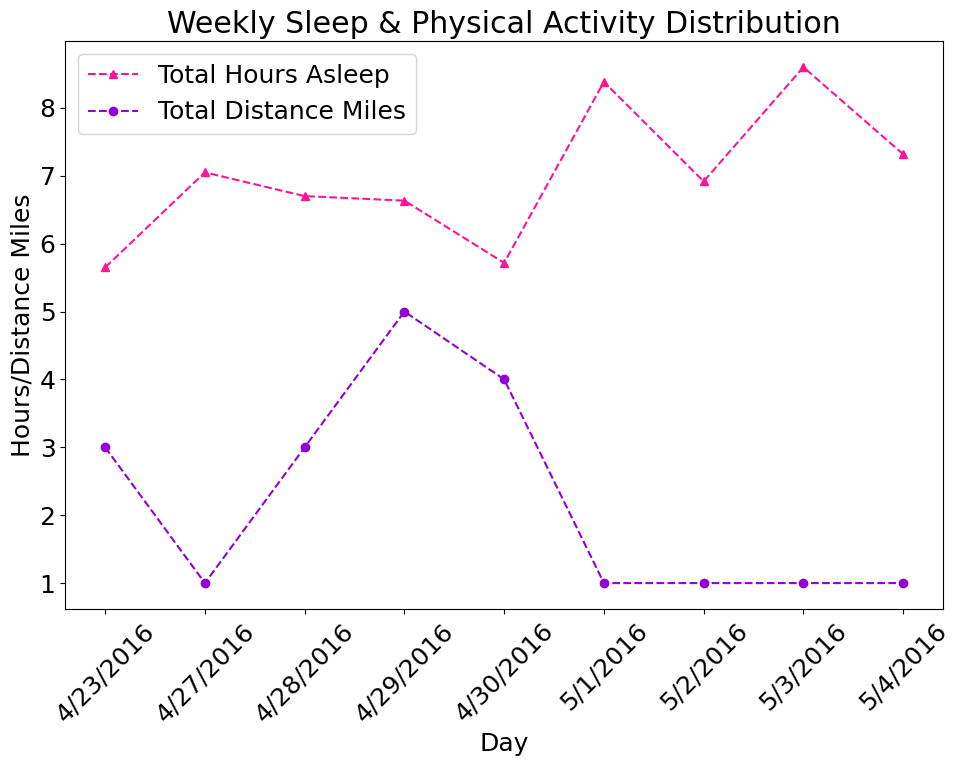

In [12]:
sleepThreshold()

## Blood Pressure Alerts: Diagnosing Hypertension and early preeclampsia using logged input
Predictive Model
1. create an isHypertensive column based on blood pressure measure
2. symptom analysis 

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

def BloodPressureVisualization():
    # Read data
    df = pd.read_csv('data_interim/logged_input.csv')
    '''
    BP Stage	Systolic (mmHg)		Diastolic (mmHg)
    Low (optional)	<100	and	<60
    Normal	<120	and	<80
    Elevated	120 - 129	and	<80
    Stage 1 - All	130 - 139	and	80 - 89
    Stage 1 - ISH (ISH - S1)	130 - 139	and	<80
    Stage 1 - IDH (IDH - S1)	<130	and	80 - 89
    Stage 2 - All	>140	and	>90
    Stage 2 - ISH (ISH - S2)	>140	and	<90
    Stage 2 - IDH (IDH - S2)	<140	and	>90
    Crisis (optional)	>180	or	>120
    '''
    # define stages column 
    stages = []
    freq_stages = {}

    df = df[df['id'] == df['id'].unique()[0]]
    print('DF=',df)
    for index, row in df.iterrows():
        if row['systolic_bp'] < 100 and row['diastolic_bp'] < 60:
            stages.append('Low')
            freq_stages['Low'] = freq_stages.get('Low', 0) + 1
        elif row['systolic_bp'] < 120 and row['diastolic_bp'] < 80:
            stages.append('Normal')
            freq_stages['Normal'] = freq_stages.get('Normal', 0) + 1
        elif row['systolic_bp'] <= 129 and row['diastolic_bp'] < 80:
            stages.append('Elevated')
            freq_stages['Elevated'] = freq_stages.get('Elevated', 0) + 1
        elif row['systolic_bp'] <= 139 and row['diastolic_bp'] <= 89:
            stages.append('Stage 1 - All')
            freq_stages['Stage 1 - All'] = freq_stages.get('Stage 1 - All', 0) + 1
        elif row['systolic_bp'] <= 139 and row['diastolic_bp'] < 80:
            stages.append('Stage 1 - ISH (ISH - S1)')
            freq_stages['Stage 1 - ISH (ISH - S1)'] = freq_stages.get('Stage 1 - ISH (ISH - S1)', 0) + 1
        elif row['systolic_bp'] < 130 and row['diastolic_bp'] <= 89:
            stages.append('Stage 1 - IDH (IDH - S1)')
            freq_stages['Stage 1 - IDH (IDH - S1)'] = freq_stages.get('Stage 1 - IDH (IDH - S1)', 0) + 1
        elif row['systolic_bp'] > 140 and row['diastolic_bp'] > 90:
            stages.append('Stage 2 - All')
            freq_stages['Stage 2 - All'] = freq_stages.get('Stage 2 - All', 0) + 1
        elif row['systolic_bp'] > 140 and row['diastolic_bp'] < 90:   
            stages.append('Stage 2 - ISH (ISH - S2)') 
            freq_stages['Stage 2 - ISH (ISH - S2)'] = freq_stages.get('Stage 2 - ISH (ISH - S2)', 0) + 1
        elif row['systolic_bp'] < 140 and row['diastolic_bp'] > 90: 
            stages.append('Stage 2 - IDH (IDH - S2)')
            freq_stages['Stage 2 - IDH (IDH - S2)'] = freq_stages.get('Stage 2 - IDH (IDH - S2)', 0) + 1
        elif row['systolic_bp'] > 180 and row['diastolic_bp'] > 120: 
            stages.append('Crisis')
            freq_stages['Crisis'] = freq_stages.get('Crisis', 0) + 1
          
        else:
            # set ABNORMAL (invalid blood pressure)
            stages.append('ABNORMAL')
            freq_stages['ABNORMAL'] = freq_stages.get('ABNORMAL', 0) + 1
            
    plt.figure(figsize=(15, 6))
    sns.barplot(x=freq_stages.keys(), y=freq_stages.values())   
    plt.show()
    

   

DF=            id  weight_kg  weight_pounds        bmi   timestamp        fat  \
0   150390366  82.430283     181.727451  23.681953  2016-04-12  27.944216   
1   150390366  80.430283     181.727451  21.681953  2016-04-13  25.944216   
2   150390366  83.430283     181.727451  24.681953  2016-04-14  28.944216   
3   150390366  84.430283     181.727451  25.681953  2016-04-15  29.944216   
4   150390366  84.430283     181.727451  25.681953  2016-04-16  29.944216   
5   150390366  84.430283     181.727451  25.681953  2016-04-17  29.944216   
6   150390366  84.430283     181.727451  25.681953  2016-04-18  29.944216   
7   150390366  80.430283     181.727451  21.681953  2016-04-19  25.944216   
8   150390366  80.430283     181.727451  21.681953  2016-04-20  25.944216   
9   150390366  80.430283     181.727451  21.681953  2016-04-21  25.944216   
10  150390366  83.430283     181.727451  24.681953  2016-04-22  28.944216   
11  150390366  82.430283     181.727451  23.681953  2016-04-23  27.94421

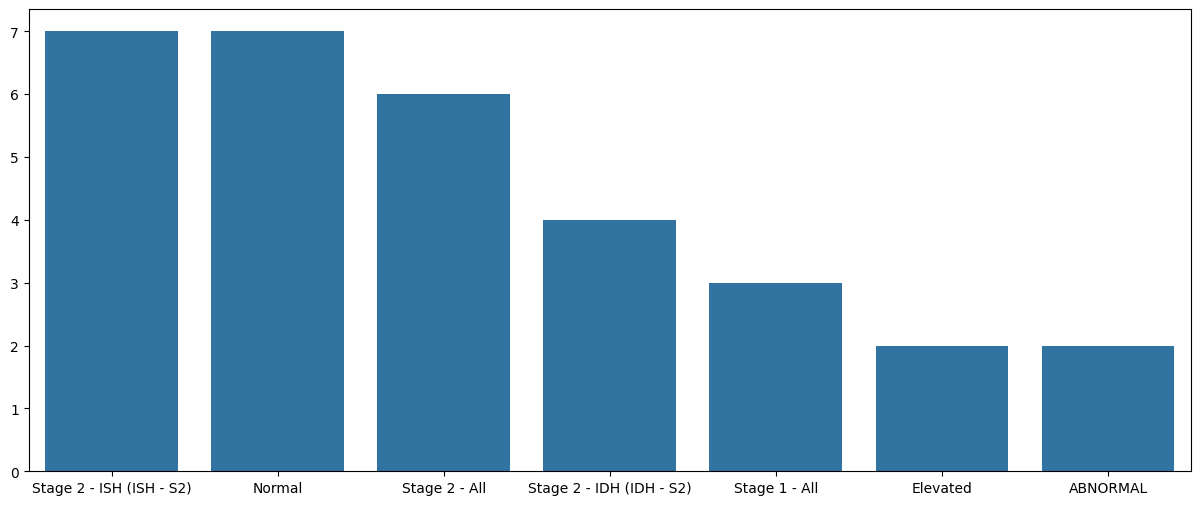

In [8]:
BloodPressureVisualization()